# NBaIoT SOM HYPEROPT CLASSIFY

## Device 4

- Training on device 4 (using both Mirai and Gafgyt).
- Testing on device 4 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 4

In [8]:
train_index

4

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((175240, 115), (175240,)),
 ((312723, 115), (312723,)),
 ((610714, 115), (610714,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((122668, 115), (52572, 115), (122668,), (52572,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((218906, 115), (93817, 115), (218906,), (93817,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((427499, 115), (183215, 115), (427499,), (183215,))

## Set ratio

In [16]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [17]:
ratio_1 = int(1.0*benign_size)

In [18]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [19]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [20]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [21]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [22]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [23]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get train data of benign and Mirai by ratio

In [24]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [25]:
print(data_mirai_1.shape, target_mirai_1.shape)

(10000, 115) (10000,)


In [26]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [27]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [28]:
benign_test_size = data_benign_test.shape[0]

In [29]:
benign_test_size

52572

### Gafgyt

In [30]:
data_gafgyt_test.shape

(93817, 115)

In [31]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [32]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(105144, 115) (105144,)


In [33]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((52572, 115), (52572, 115), (52572,), (52572,))

## Mirai

In [34]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [35]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(105144, 115) (105144,)


In [36]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [37]:
print(X_test_mirai.shape, y_test_mirai.shape)

(105144, 115) (105144,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [38]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.3128418922424316


### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16963151 0.31303755 0.24019937 ... 1.21182186 1.14067261 1.21182186]
Visualize quantization error


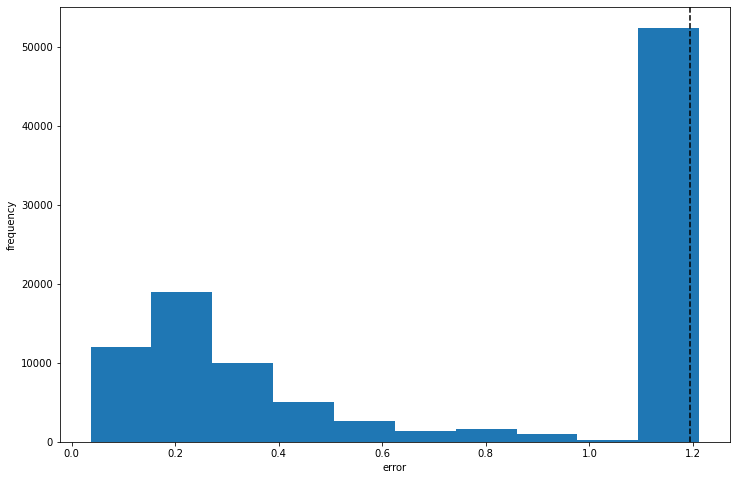

Outliers visualization


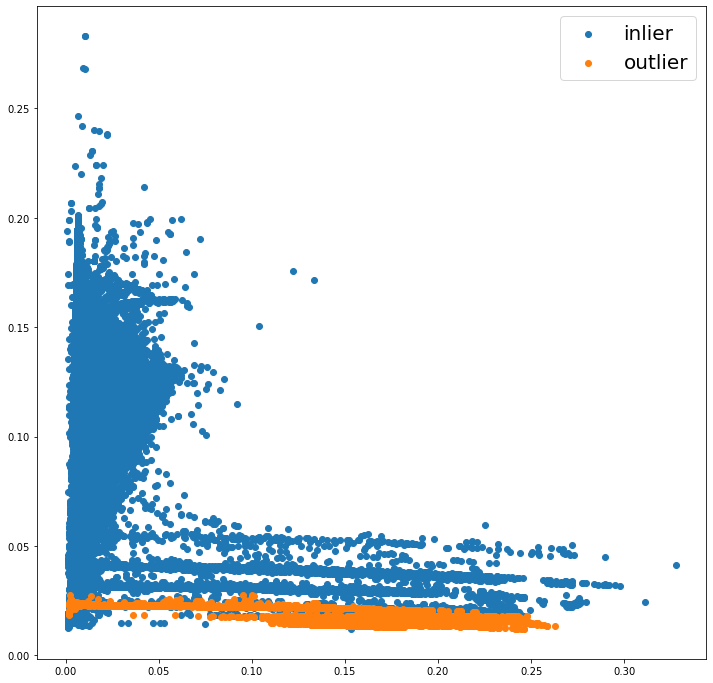

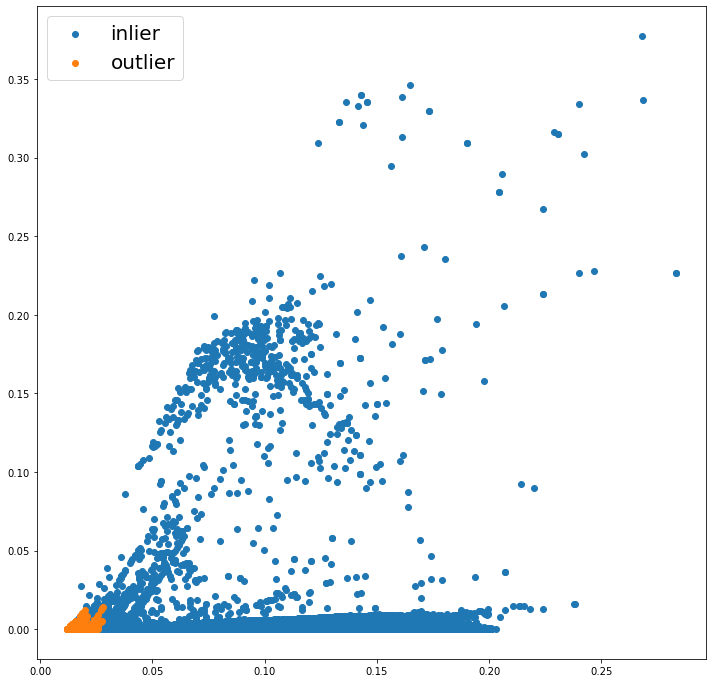

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.988     0.992     52572
           2      0.988     0.997     0.993     52572

    accuracy                          0.992    105144
   macro avg      0.993     0.992     0.992    105144
weighted avg      0.993     0.992     0.992    105144



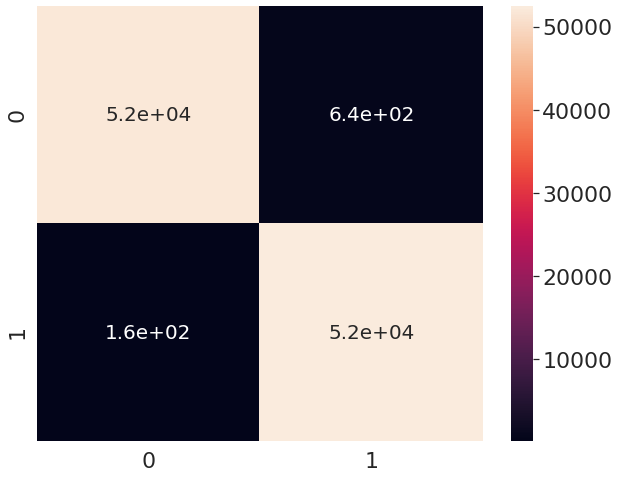

AUC score:  0.9924769839458267


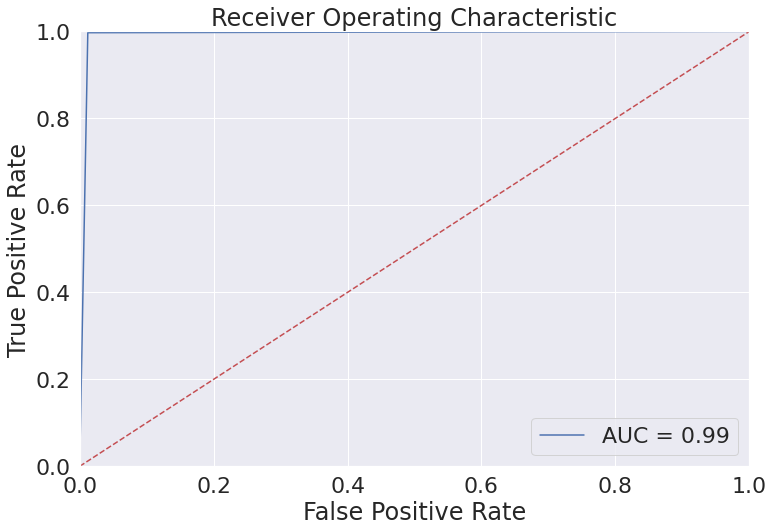

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.16963151 0.31303755 0.24019937 ... 0.92616219 1.21076881 1.17343334]
Visualize quantization error


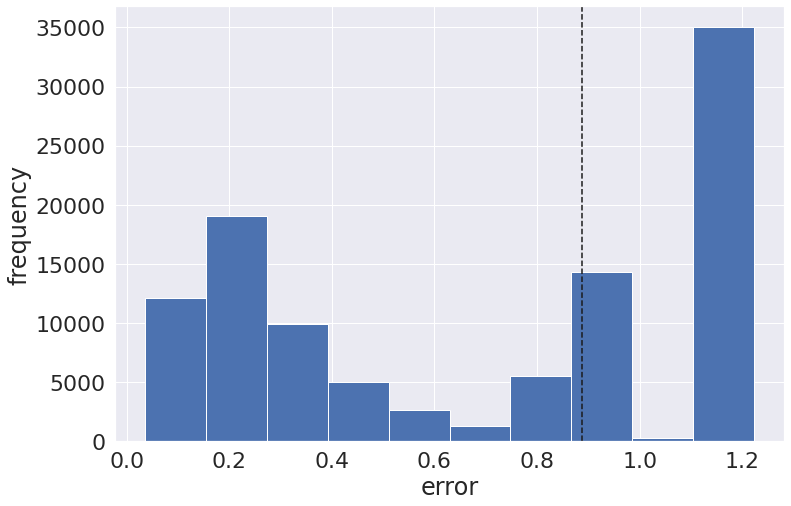

Outliers visualization


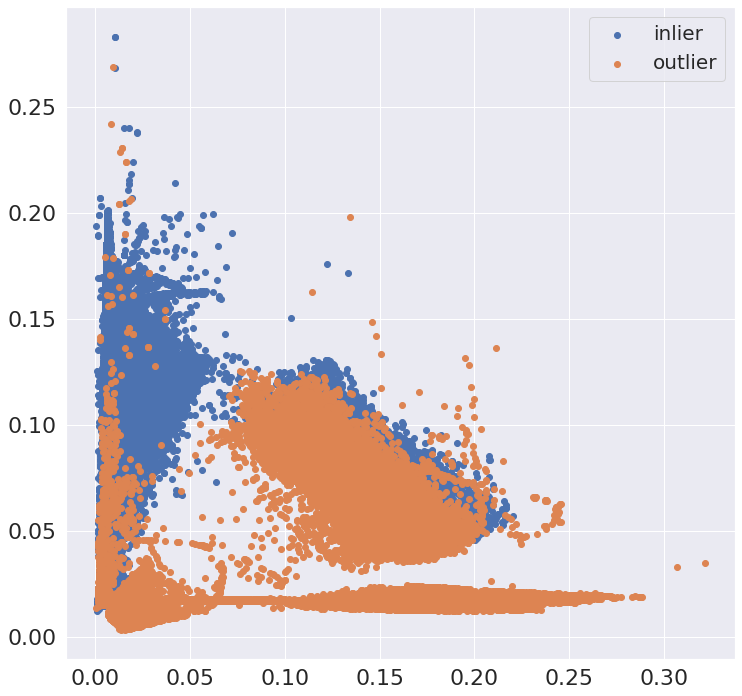

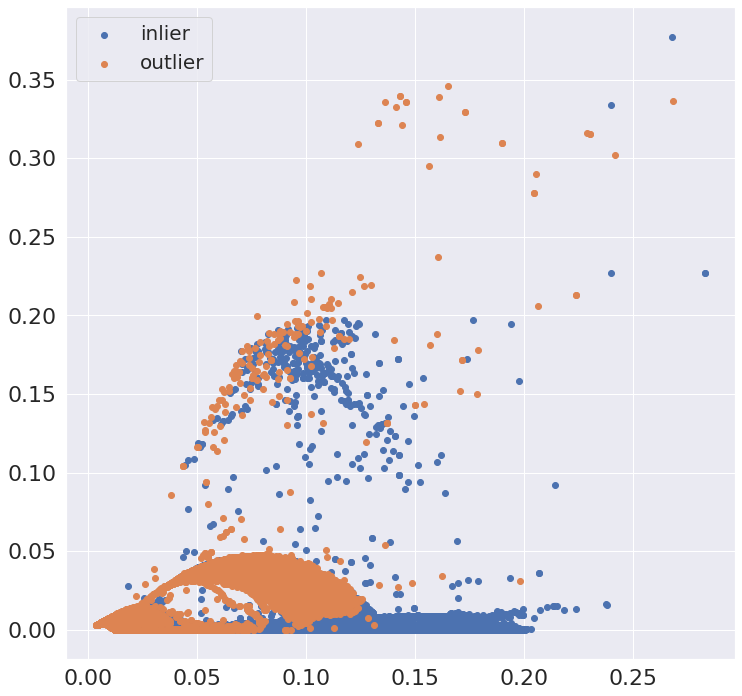

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.747     0.988     0.851     52572
           2      0.982     0.666     0.794     52572

    accuracy                          0.827    105144
   macro avg      0.865     0.827     0.822    105144
weighted avg      0.865     0.827     0.822    105144



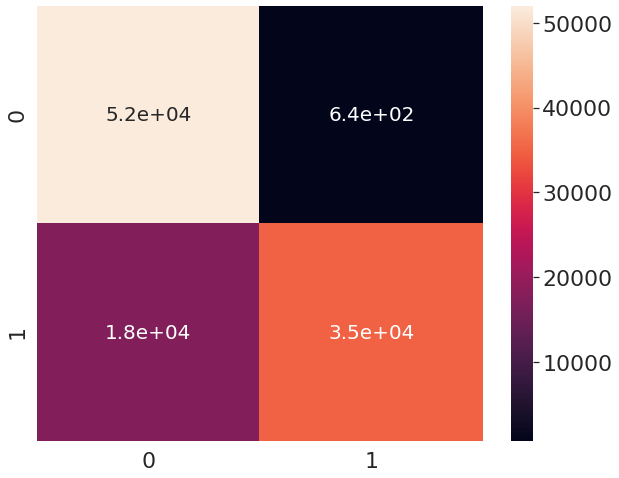

AUC score:  0.826780415430267


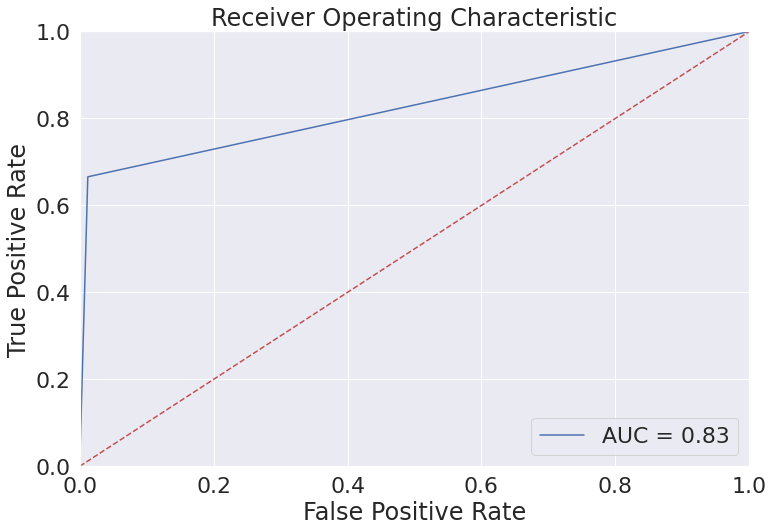

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 7.209604024887085


### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09595138 0.34082273 0.19073362 ... 1.20595149 0.94615546 1.20595149]
Visualize quantization error


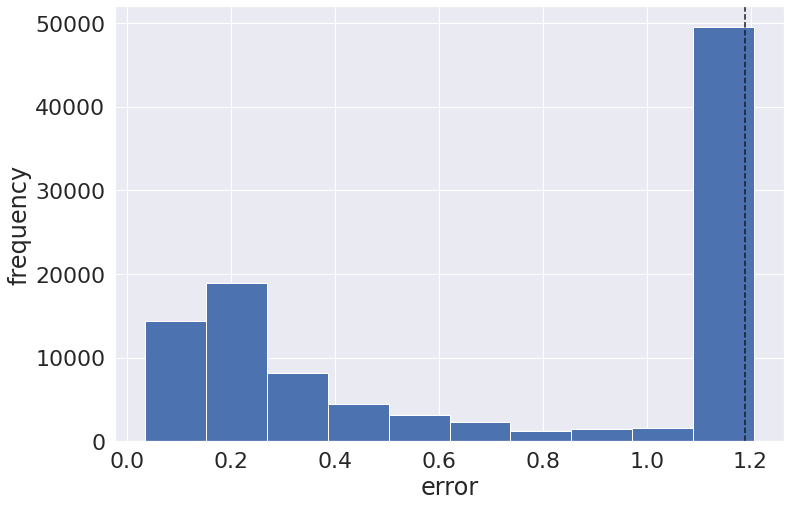

Outliers visualization


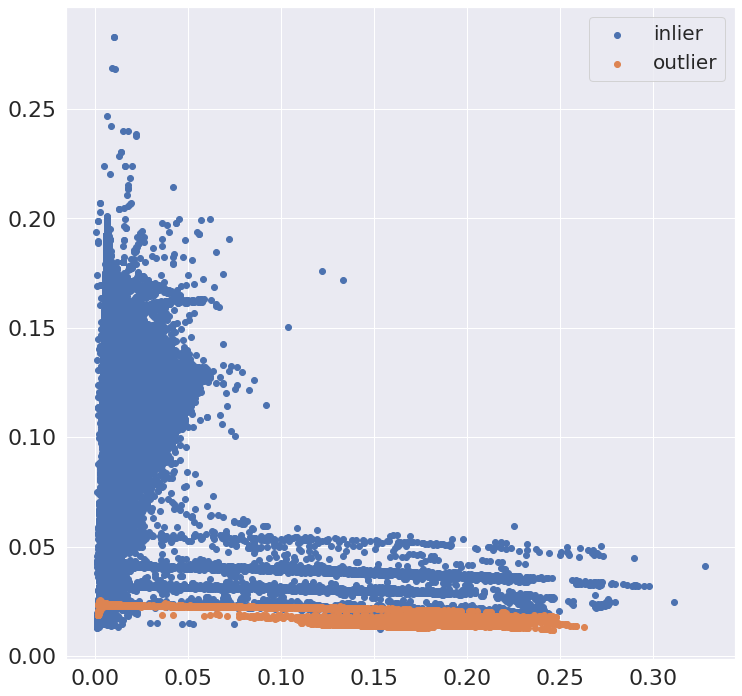

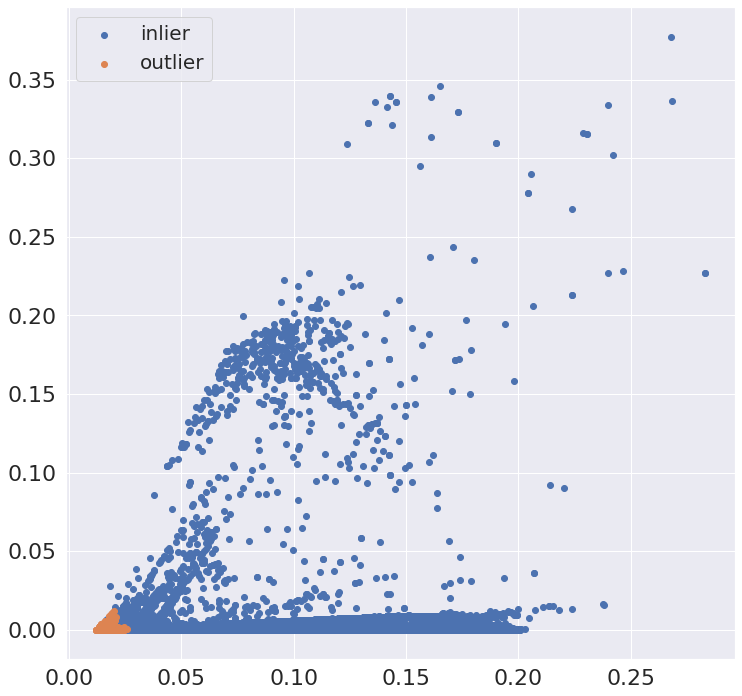

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.997     0.997     52572
           2      0.997     0.996     0.997     52572

    accuracy                          0.997    105144
   macro avg      0.997     0.997     0.997    105144
weighted avg      0.997     0.997     0.997    105144



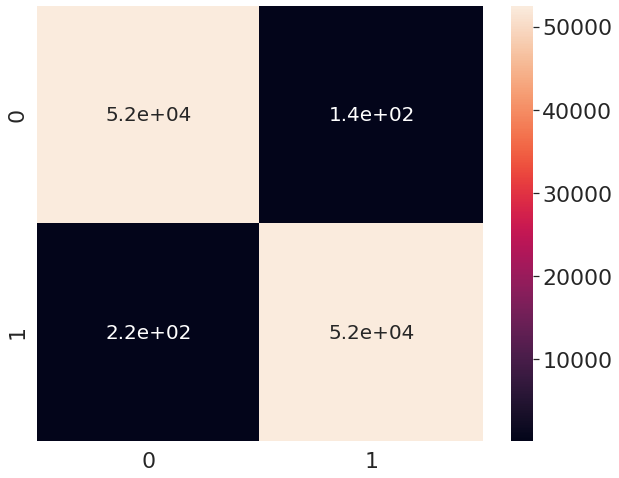

AUC score:  0.9965761241725632


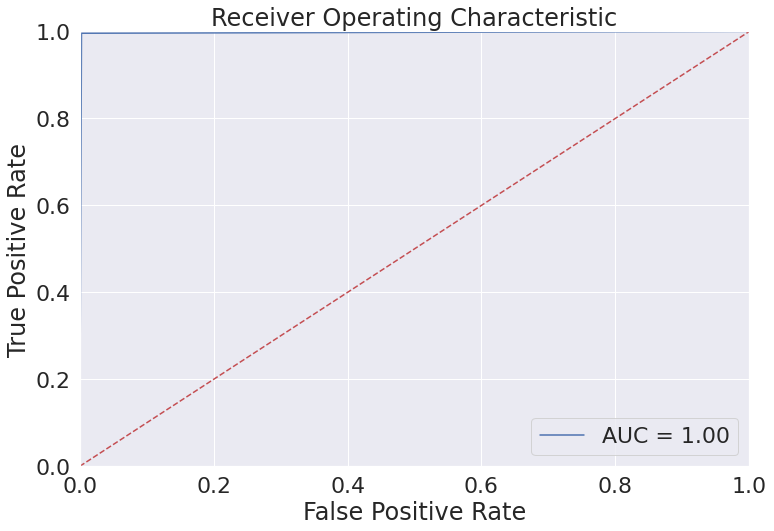

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09595138 0.34082273 0.19073362 ... 0.91438693 1.20412914 1.15260526]
Visualize quantization error


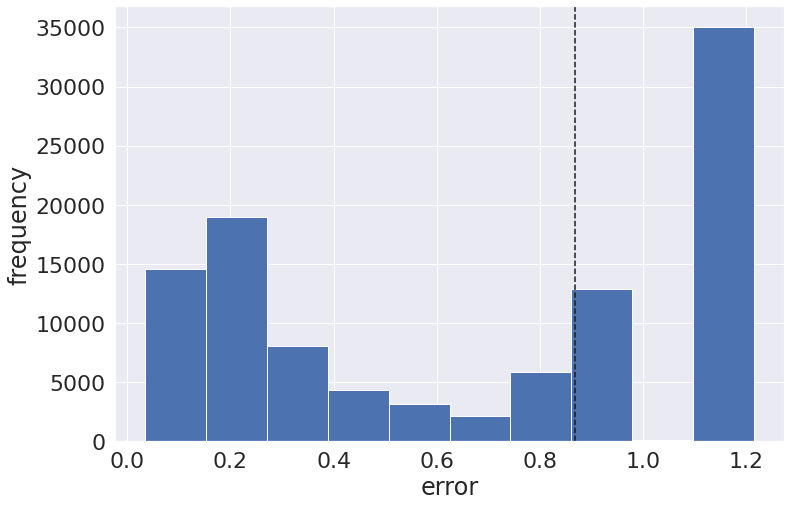

Outliers visualization


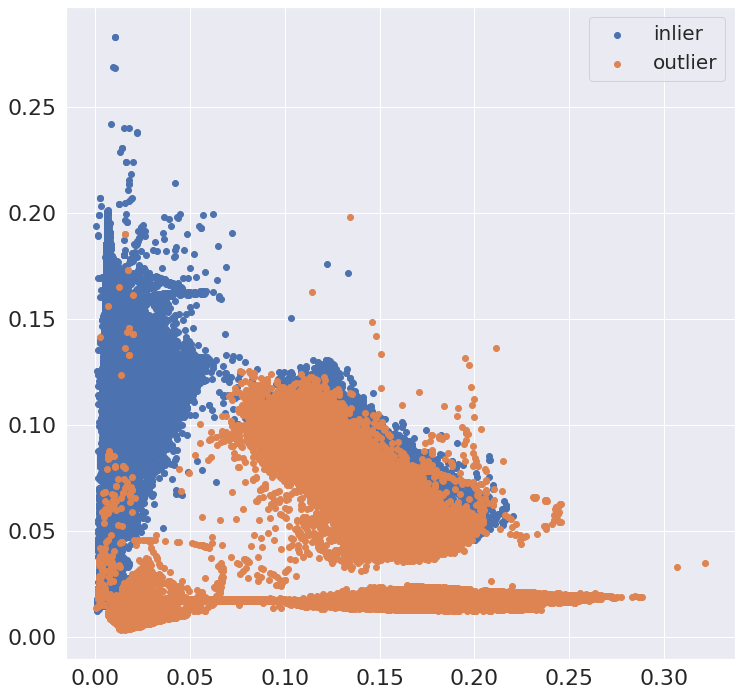

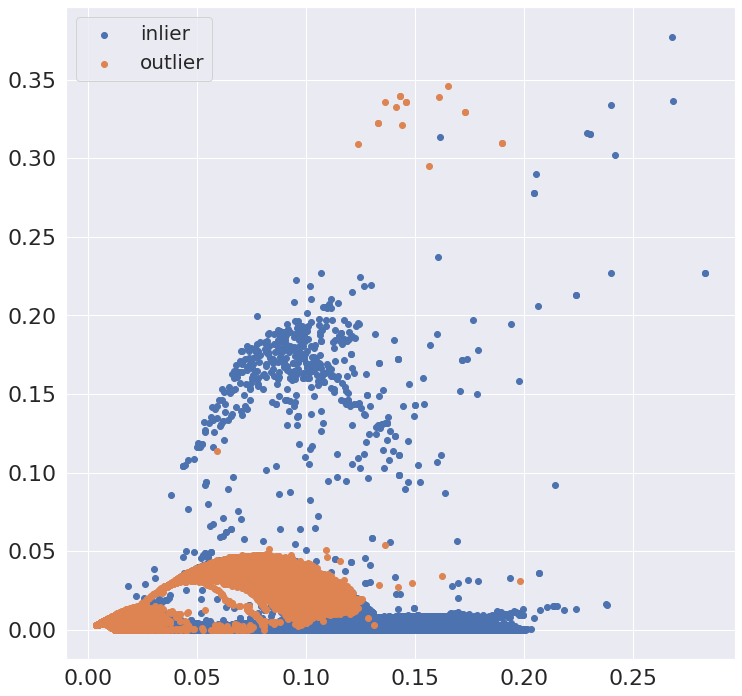

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.613     0.997     0.759     52572
           2      0.993     0.371     0.540     52572

    accuracy                          0.684    105144
   macro avg      0.803     0.684     0.650    105144
weighted avg      0.803     0.684     0.650    105144



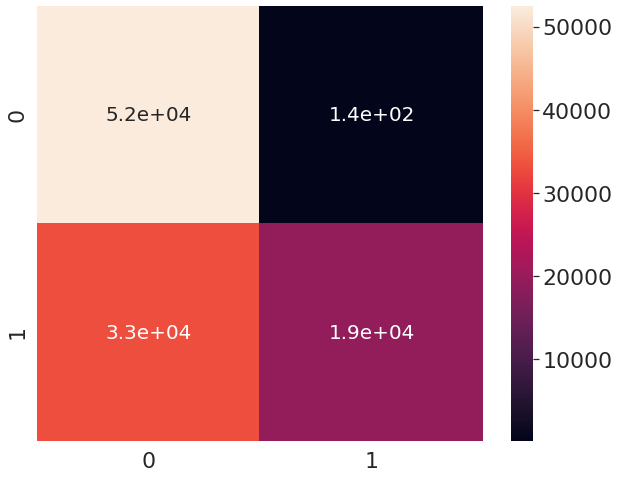

AUC score:  0.6839857718937836


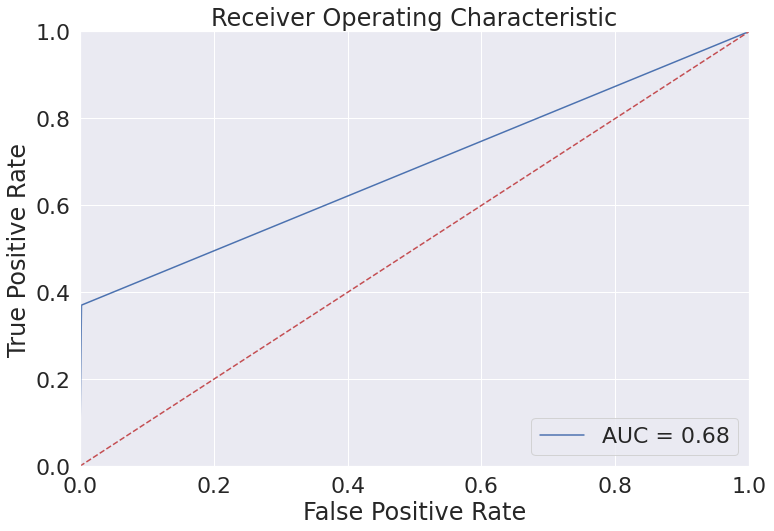

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [44]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 11.067746877670288


### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08214975 0.1538847  0.19645018 ... 1.22313504 1.14541904 1.22313504]
Visualize quantization error


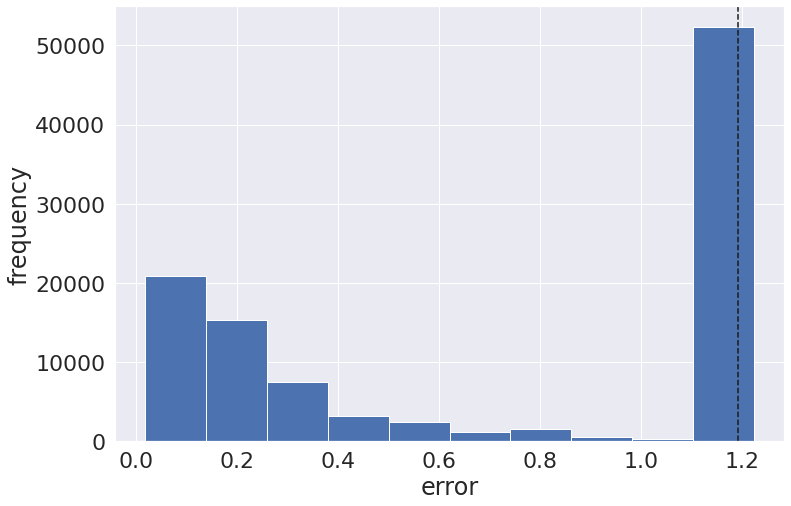

Outliers visualization


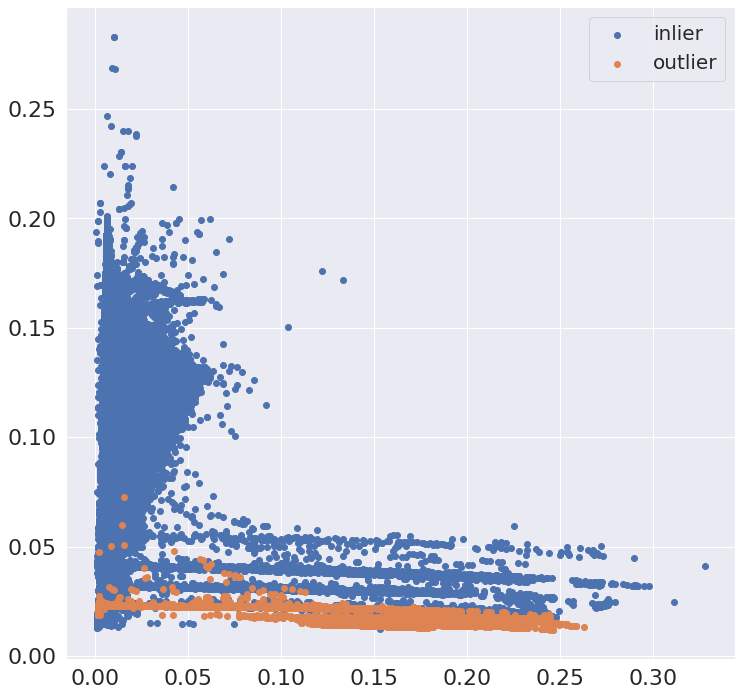

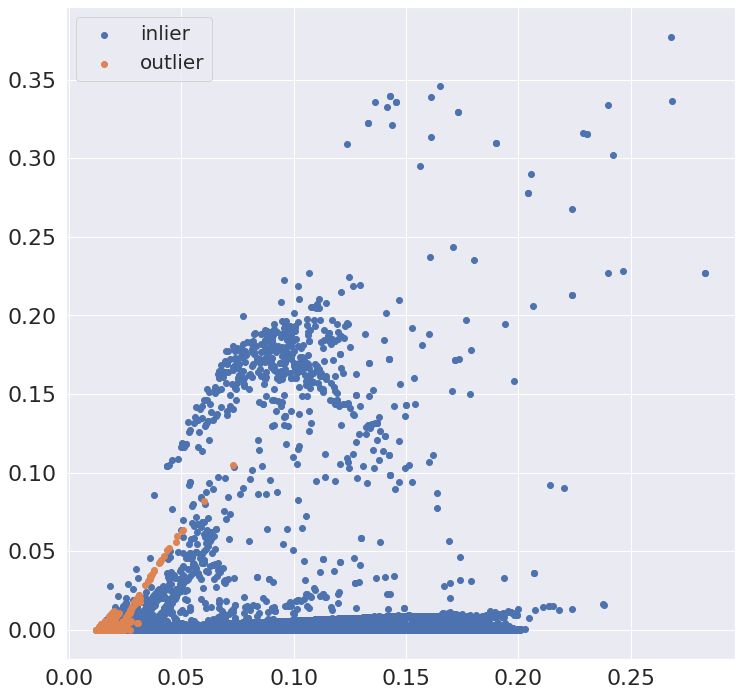

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.998     52572
           2      0.998     0.997     0.998     52572

    accuracy                          0.998    105144
   macro avg      0.998     0.998     0.998    105144
weighted avg      0.998     0.998     0.998    105144



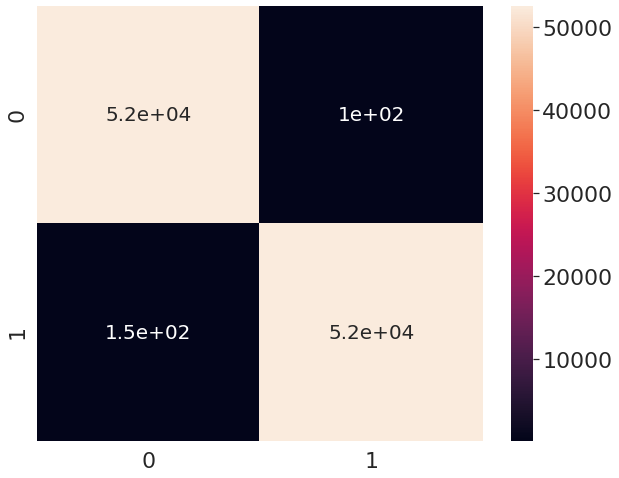

AUC score:  0.9975557330898577


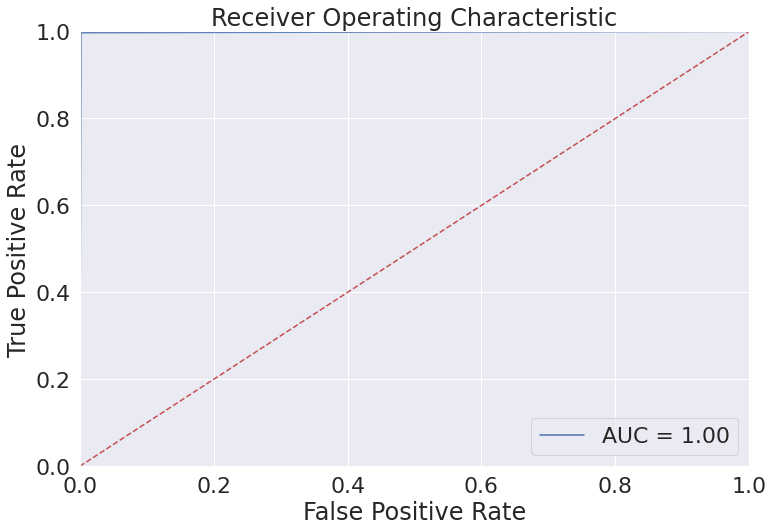

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08214975 0.1538847  0.19645018 ... 0.90975795 1.21984406 1.1803496 ]
Visualize quantization error


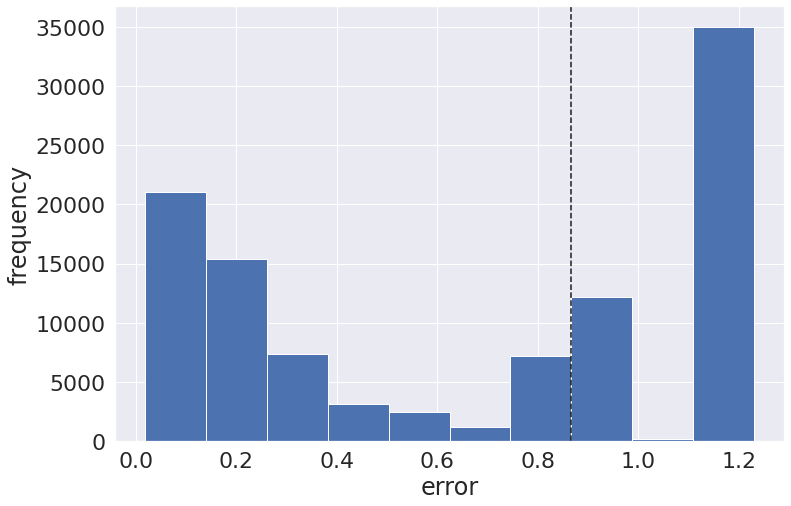

Outliers visualization


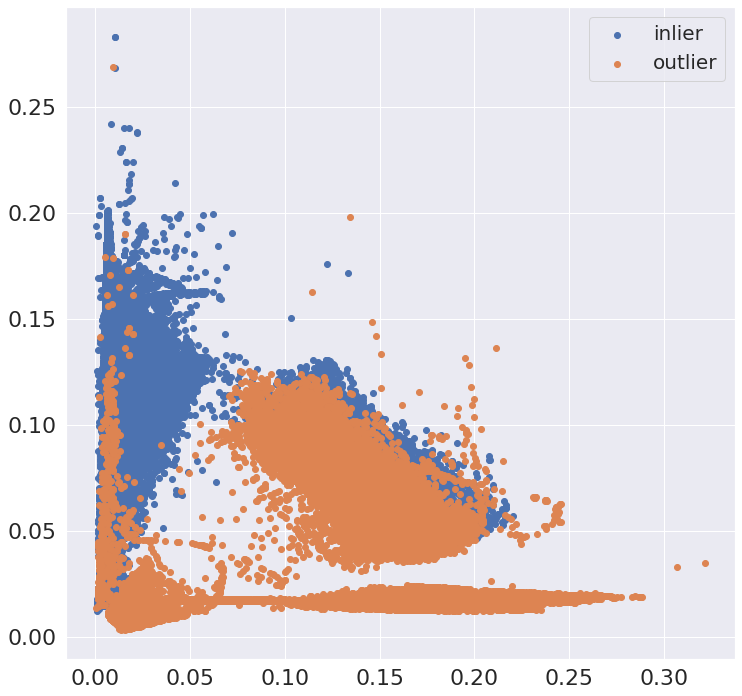

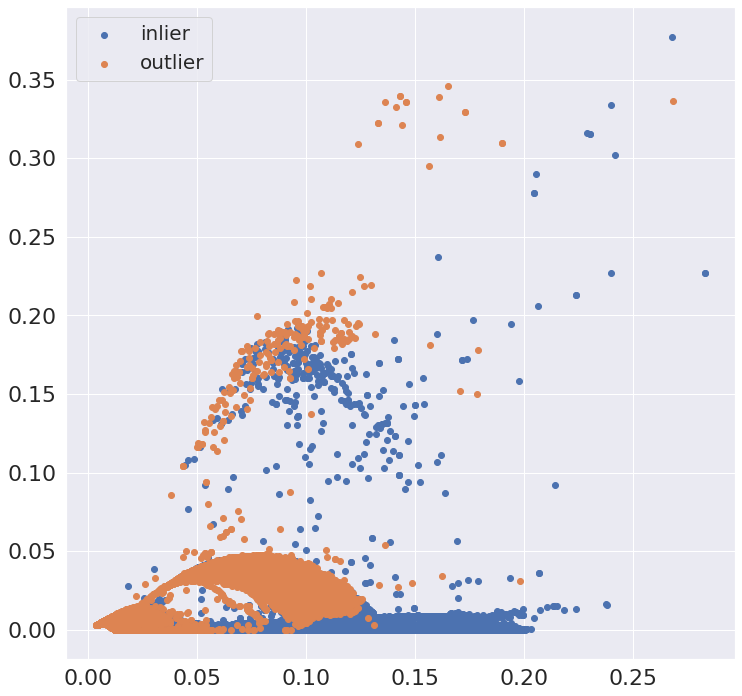

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.750     0.998     0.856     52572
           2      0.997     0.667     0.799     52572

    accuracy                          0.832    105144
   macro avg      0.873     0.832     0.828    105144
weighted avg      0.873     0.832     0.828    105144



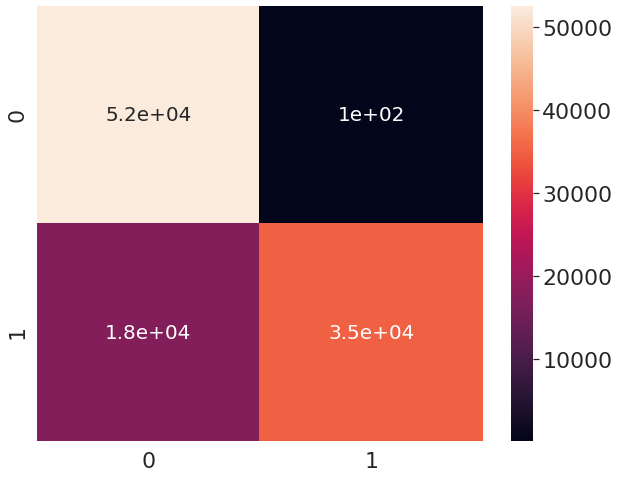

AUC score:  0.8324678536102869


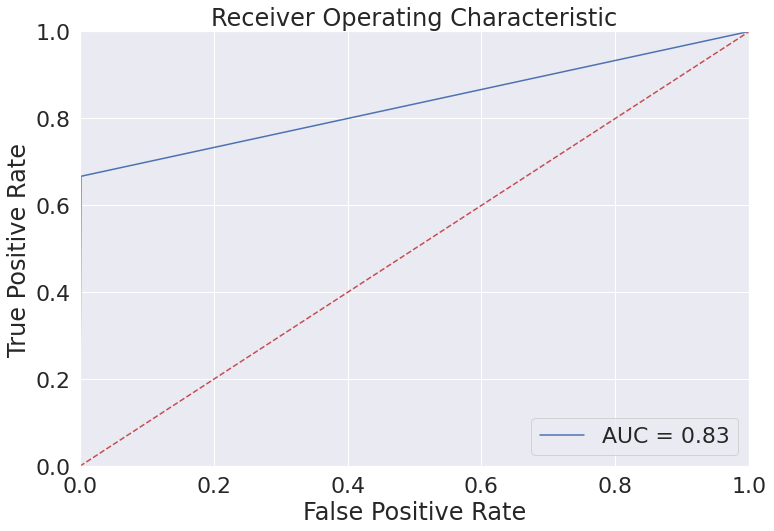

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [47]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 29.97952437400818


### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06549529 0.18094402 0.14645691 ... 1.01075147 0.81741017 1.01075147]
Visualize quantization error


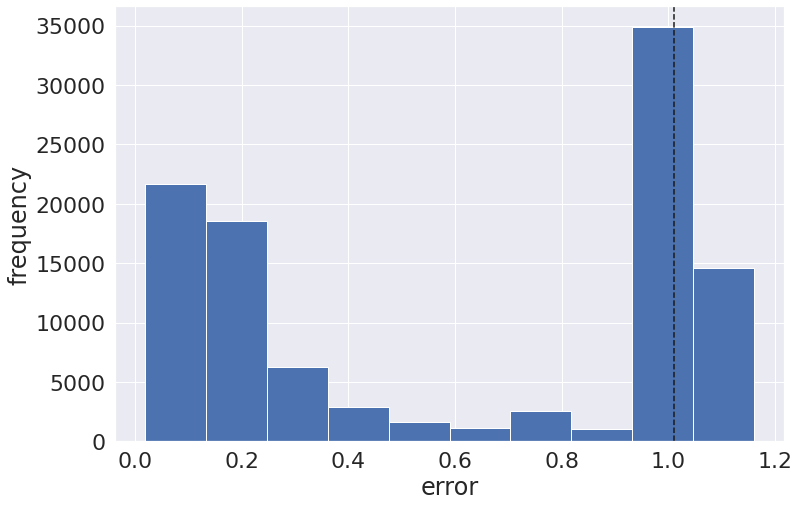

Outliers visualization


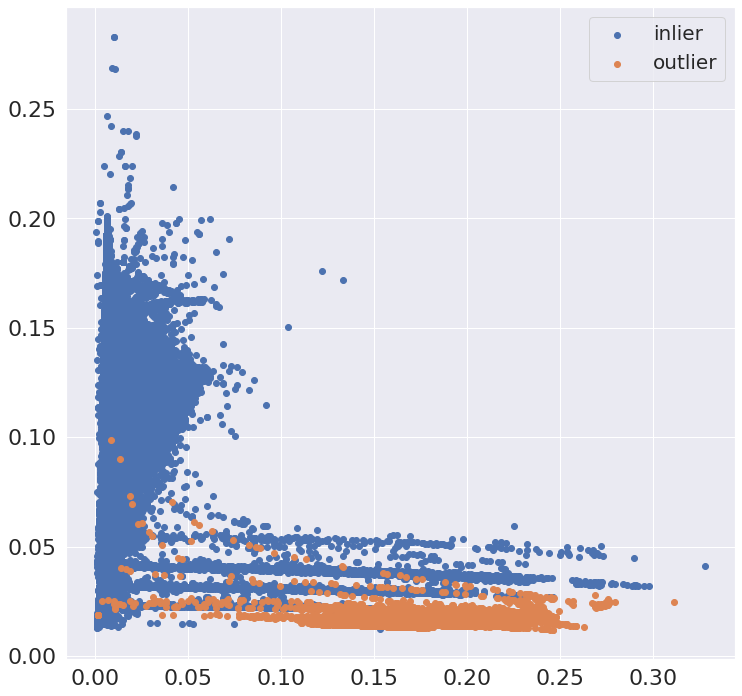

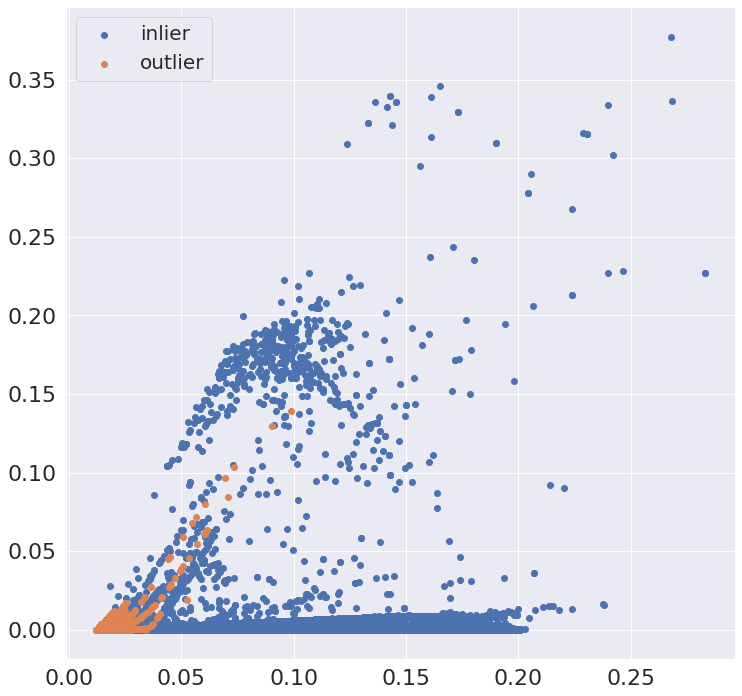

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     52572
           2      0.997     0.998     0.998     52572

    accuracy                          0.998    105144
   macro avg      0.998     0.998     0.998    105144
weighted avg      0.998     0.998     0.998    105144



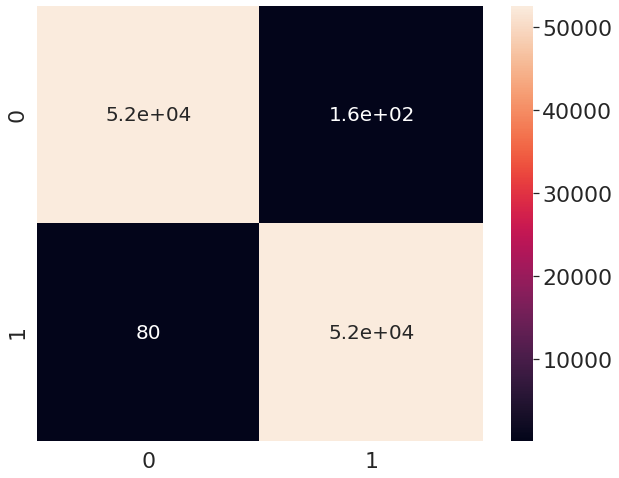

AUC score:  0.9977269268812295


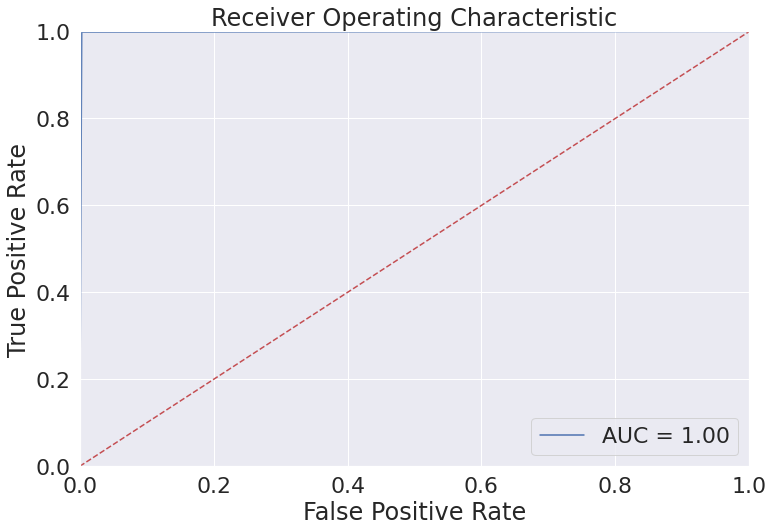

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06549529 0.18094402 0.14645691 ... 0.90791804 1.01925536 1.03019361]
Visualize quantization error


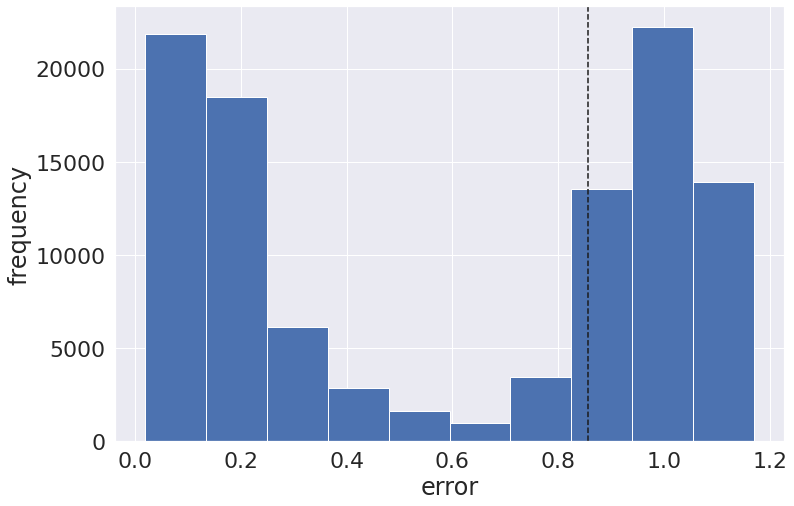

Outliers visualization


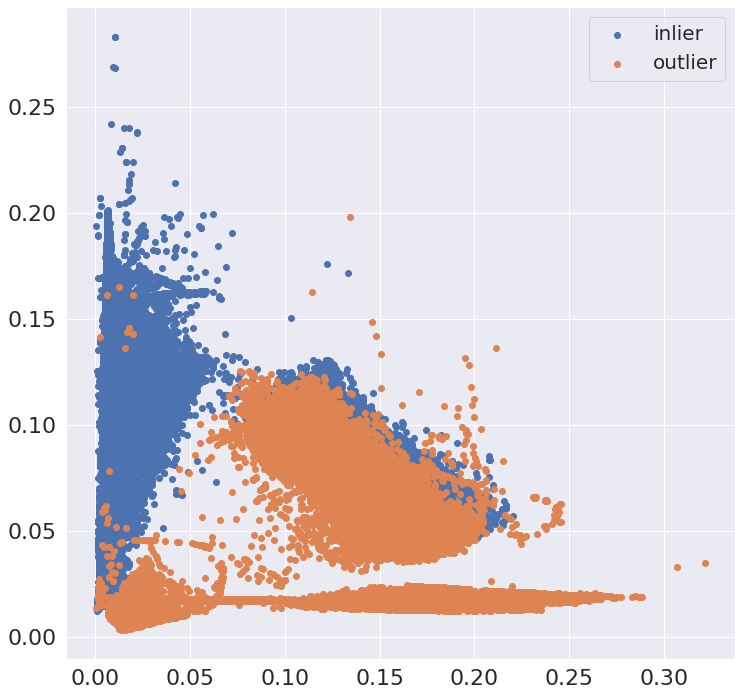

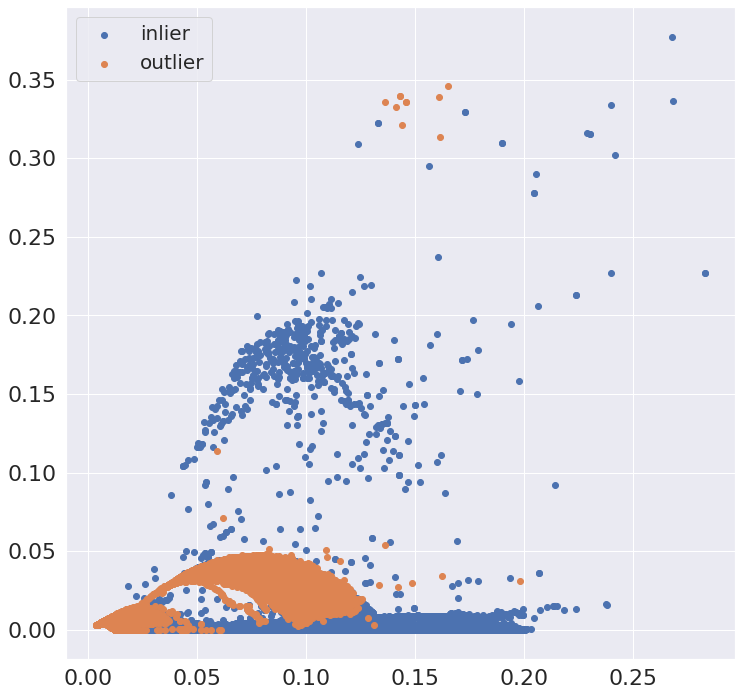

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.613     0.997     0.759     52572
           2      0.992     0.371     0.540     52572

    accuracy                          0.684    105144
   macro avg      0.803     0.684     0.650    105144
weighted avg      0.803     0.684     0.650    105144



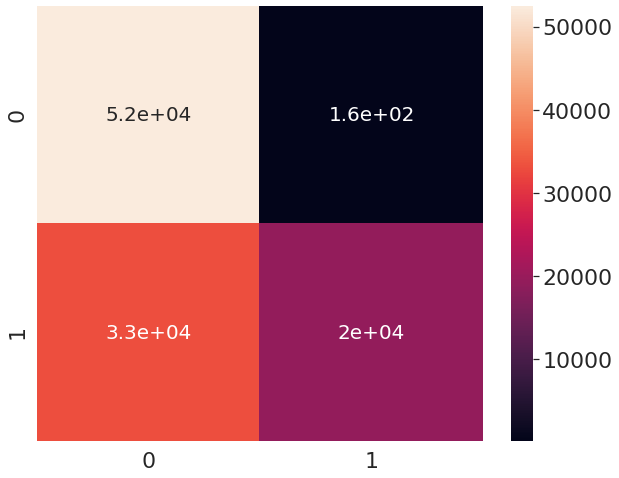

AUC score:  0.6839857718937837


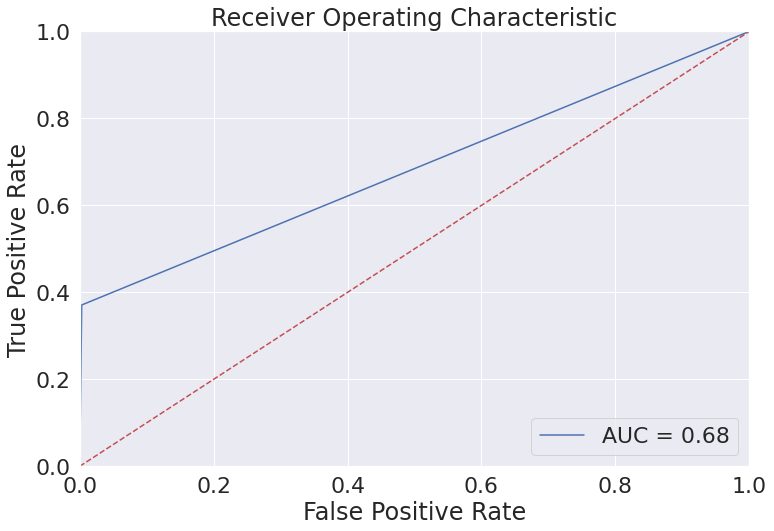

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [50]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 91.85143637657166


### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08641334 0.13074201 0.20885177 ... 1.21052888 1.14277697 1.21052888]
Visualize quantization error


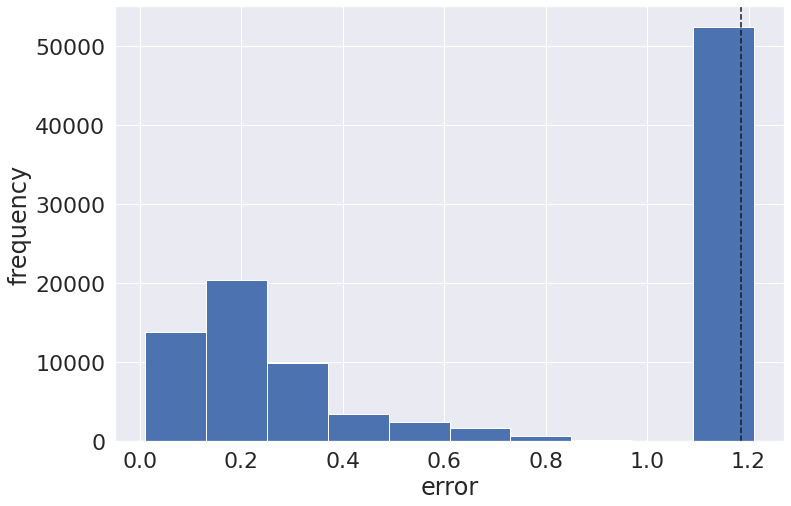

Outliers visualization


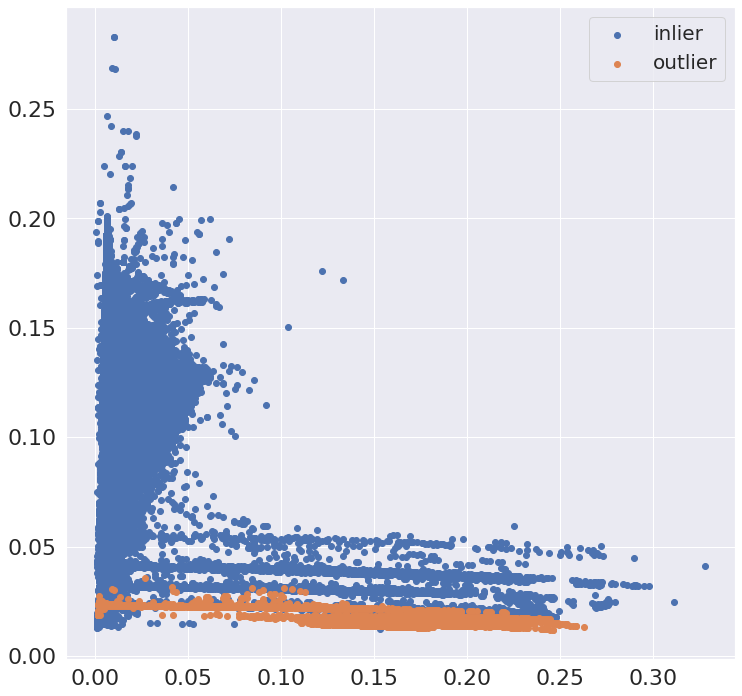

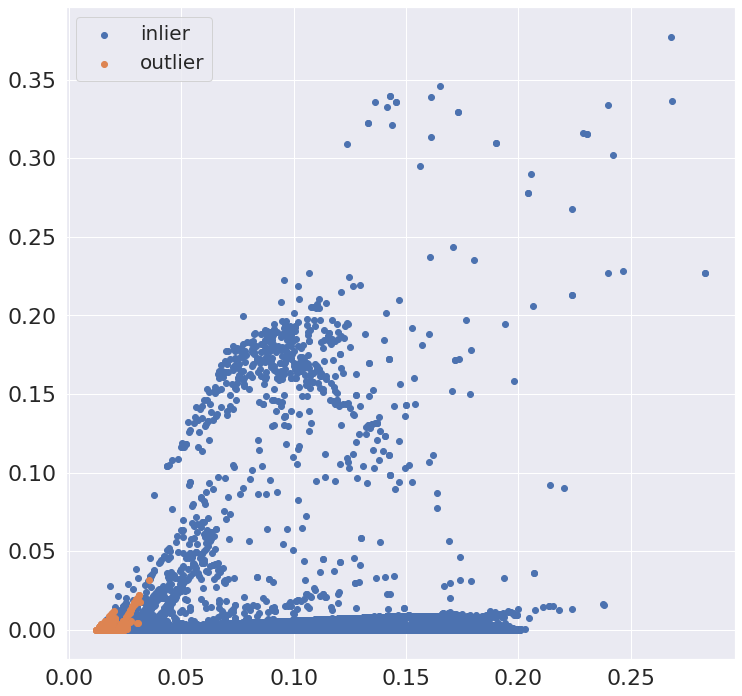

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.998     0.997     52572
           2      0.998     0.997     0.997     52572

    accuracy                          0.997    105144
   macro avg      0.997     0.997     0.997    105144
weighted avg      0.997     0.997     0.997    105144



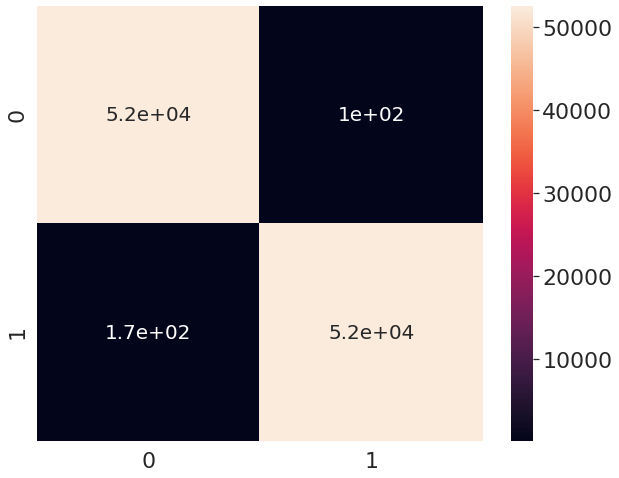

AUC score:  0.997384539298486


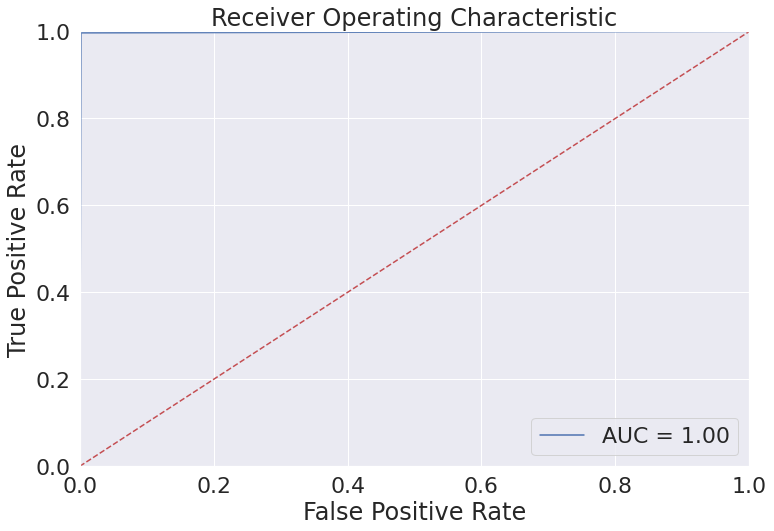

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08641334 0.13074201 0.20885177 ... 0.93150092 1.20803166 1.14508682]
Visualize quantization error


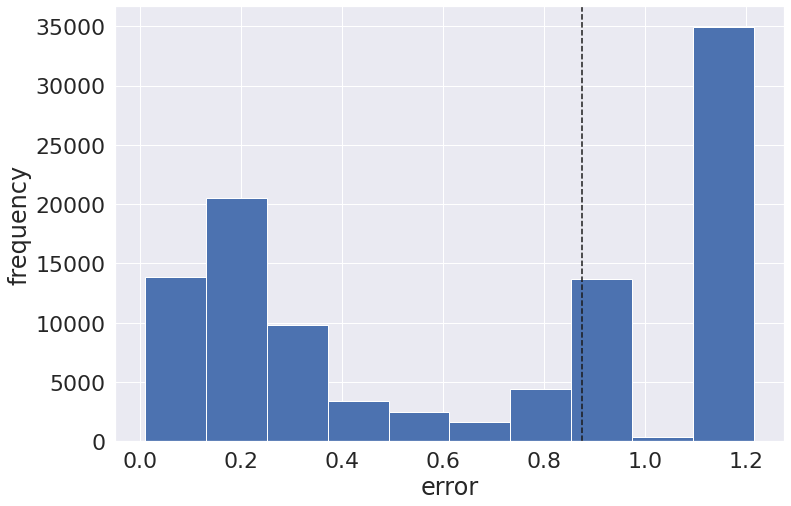

Outliers visualization


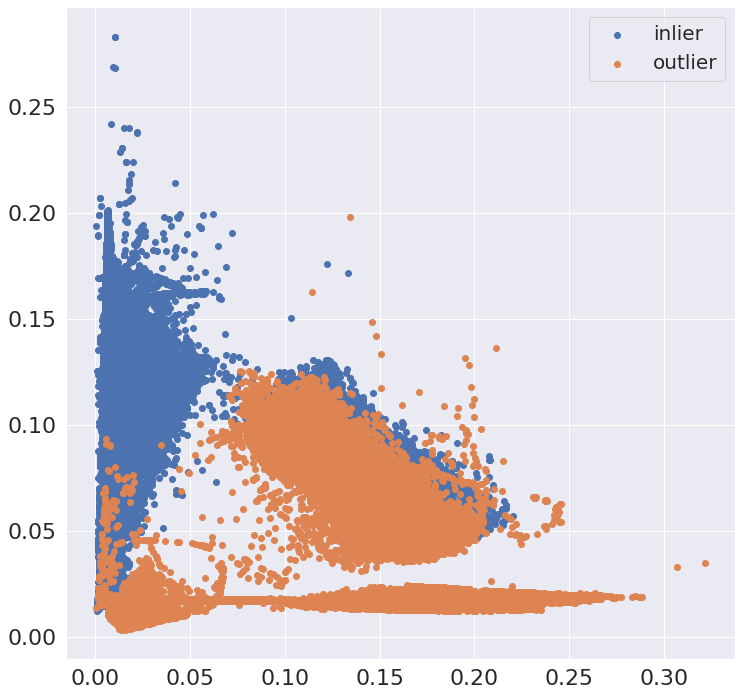

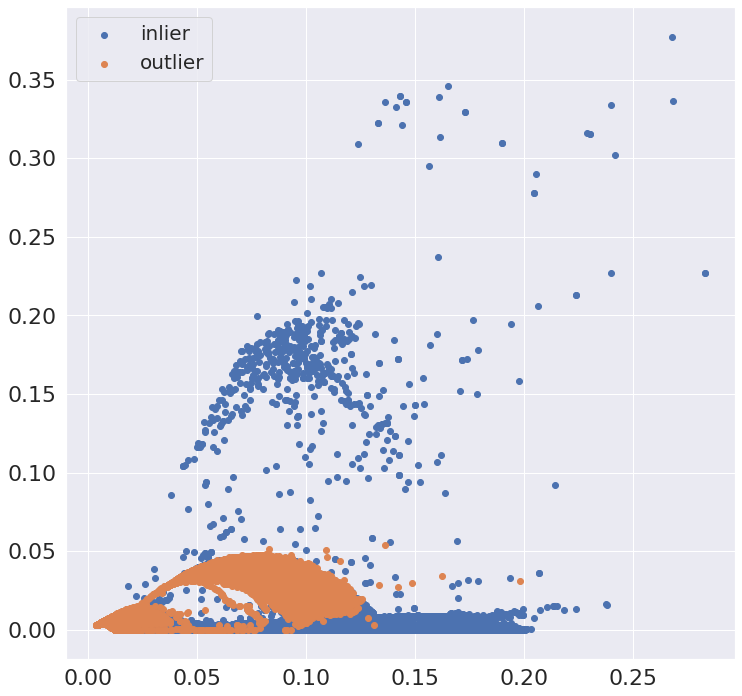

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.716     0.998     0.834     52572
           2      0.997     0.605     0.753     52572

    accuracy                          0.801    105144
   macro avg      0.857     0.801     0.794    105144
weighted avg      0.857     0.801     0.794    105144



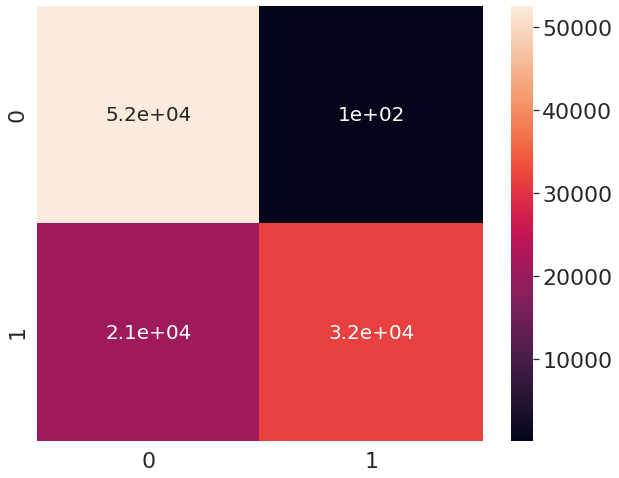

AUC score:  0.8014912881381725


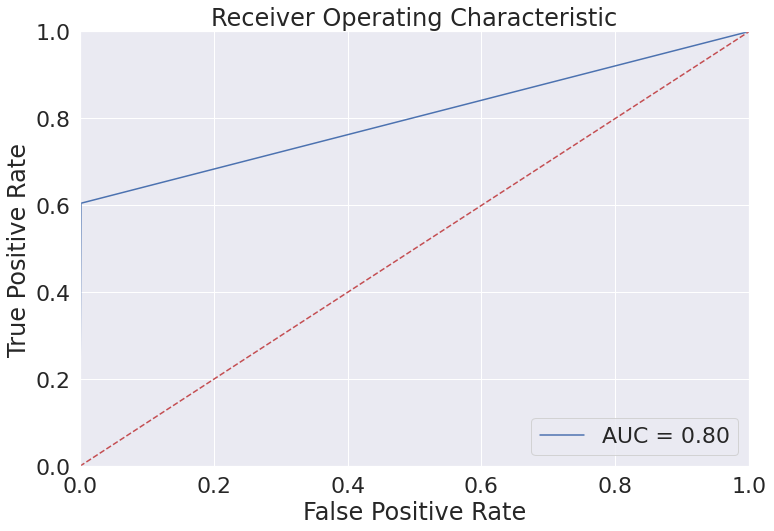

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [53]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 77.02570128440857


### Test Gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06464214 0.18975538 0.19384891 ... 1.19773689 1.12382739 1.19773689]
Visualize quantization error


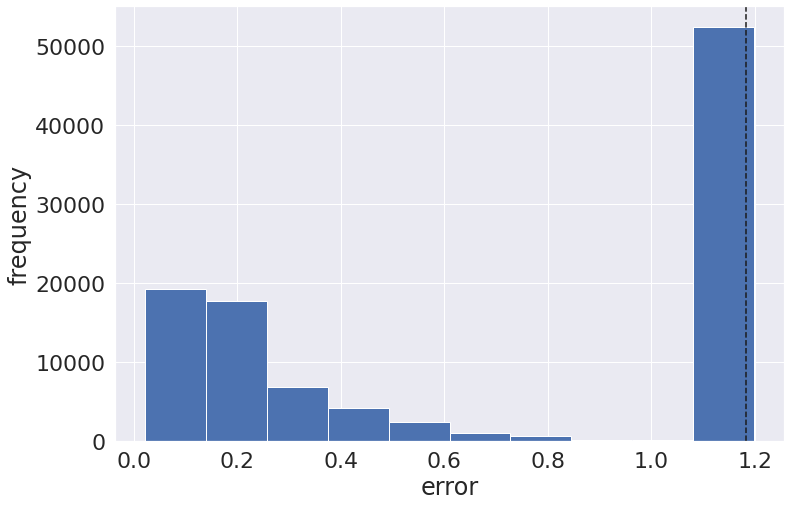

Outliers visualization


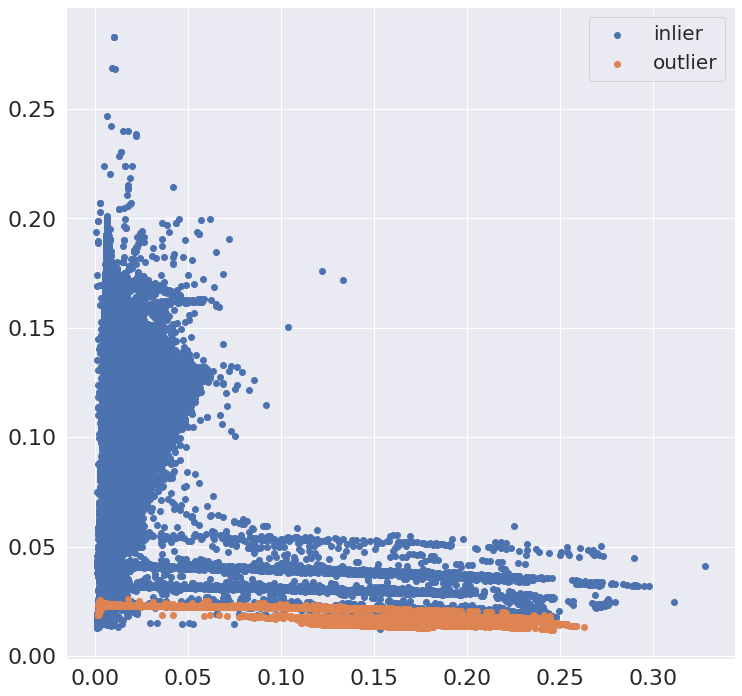

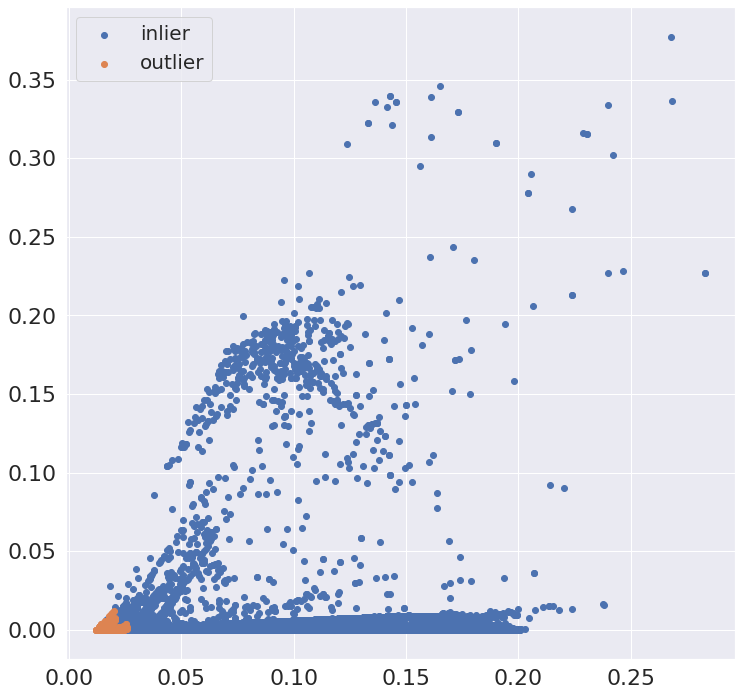

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.999     0.998     52572
           2      0.999     0.997     0.998     52572

    accuracy                          0.998    105144
   macro avg      0.998     0.998     0.998    105144
weighted avg      0.998     0.998     0.998    105144



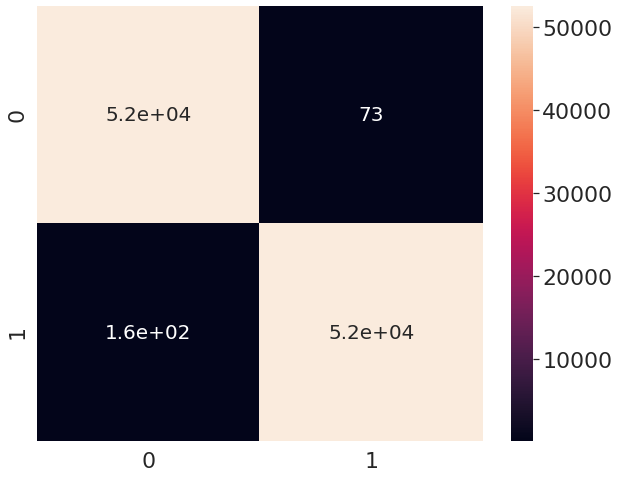

AUC score:  0.9977364376474168


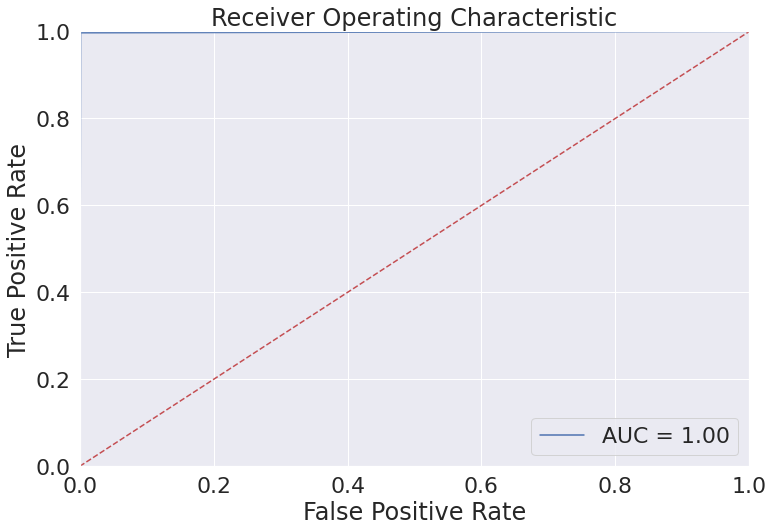

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06464214 0.18975538 0.19384891 ... 0.92024751 1.19650446 1.16224754]
Visualize quantization error


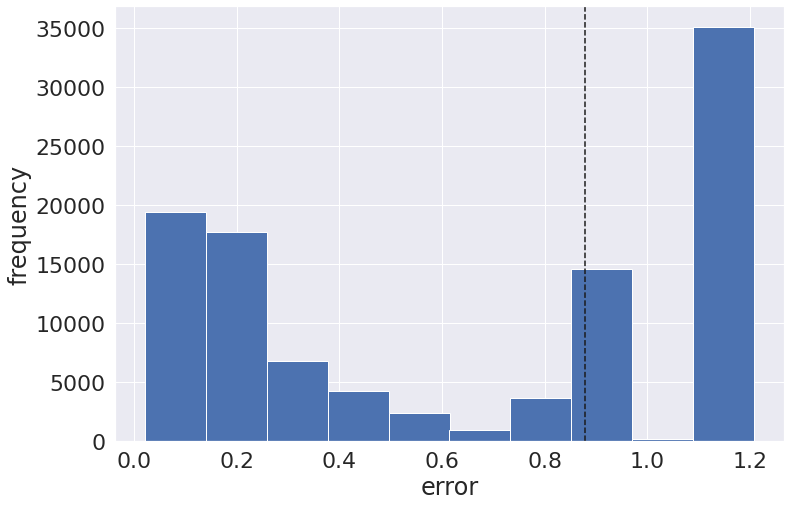

Outliers visualization


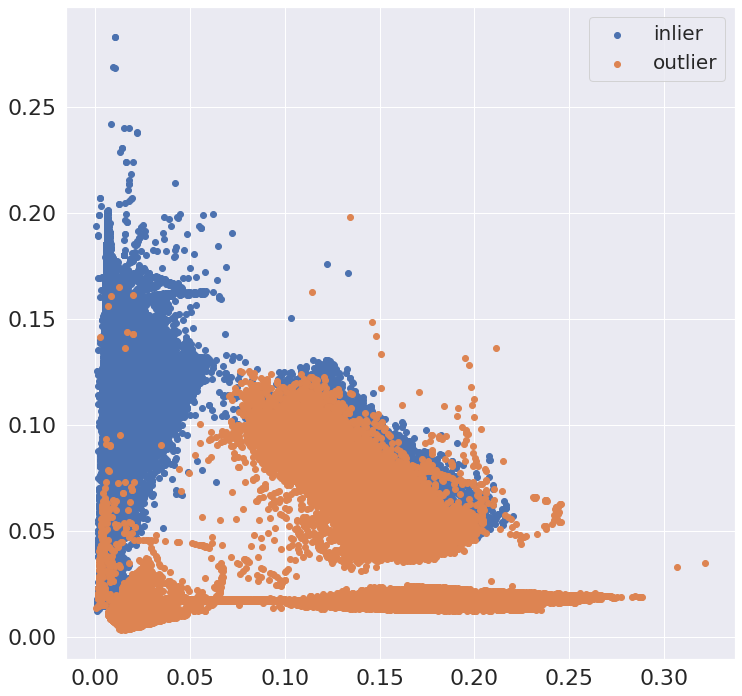

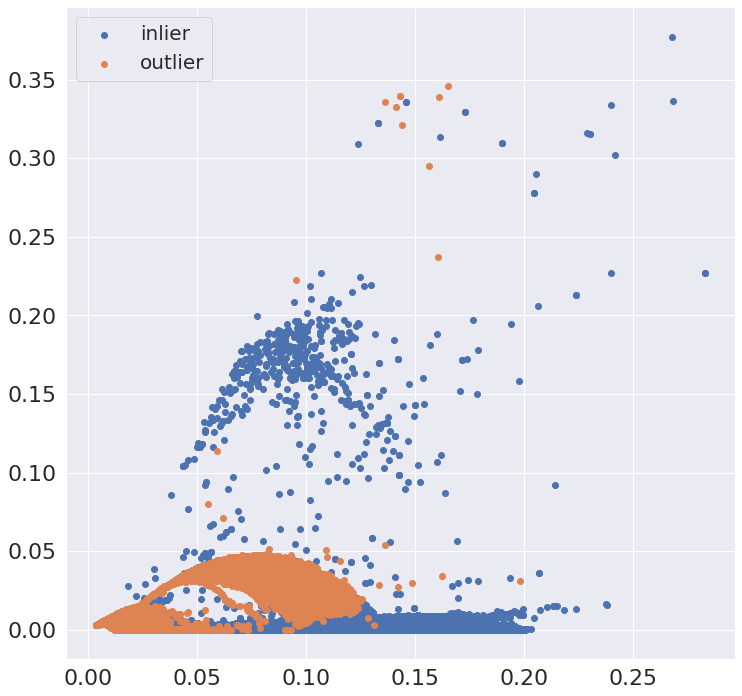

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.892     0.999     0.942     52572
           2      0.998     0.878     0.935     52572

    accuracy                          0.939    105144
   macro avg      0.945     0.939     0.938    105144
weighted avg      0.945     0.939     0.938    105144



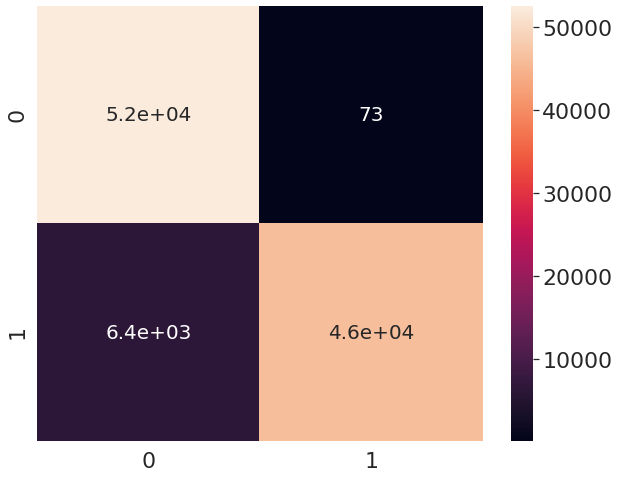

AUC score:  0.938541428897512


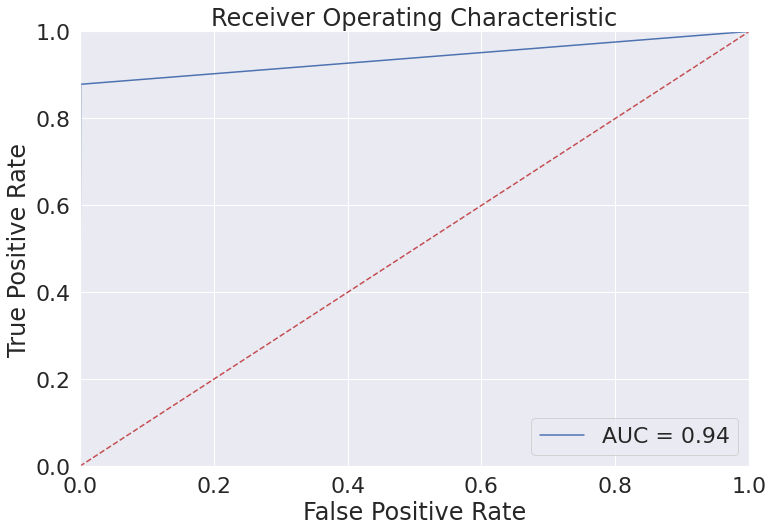

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [56]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0480278  0.15235643 0.17934592 ... 1.13723127 1.01043163 1.13723127]
Visualize quantization error


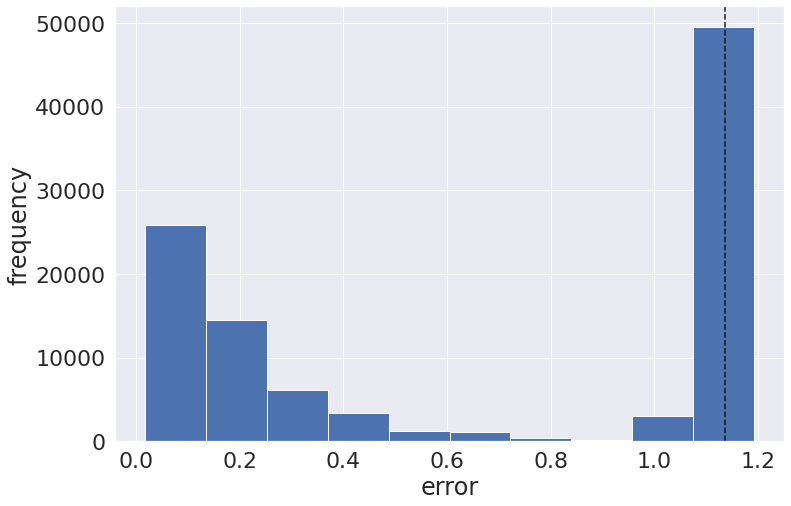

Outliers visualization


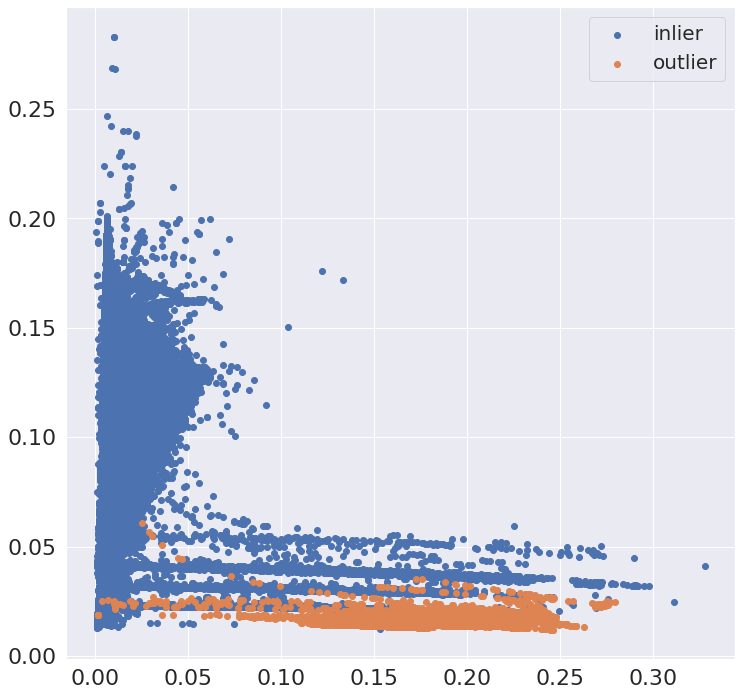

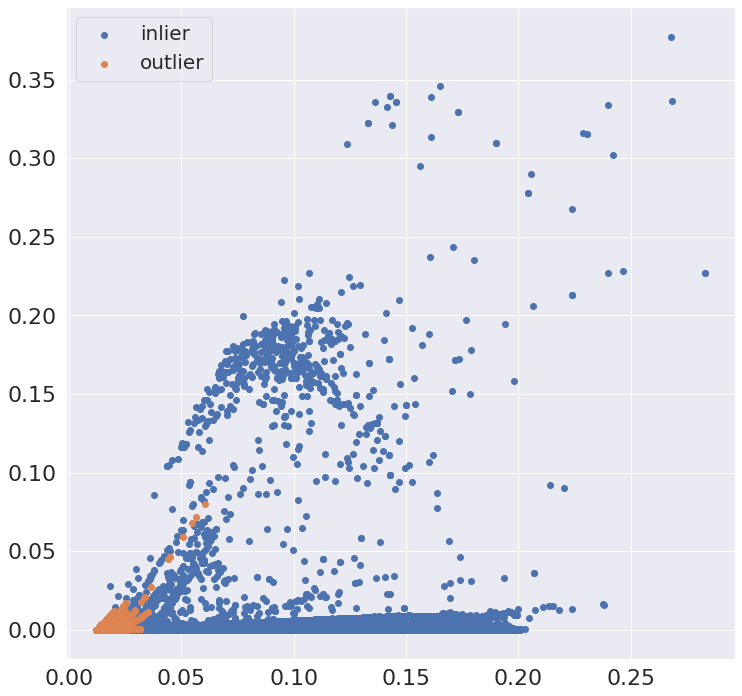

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.998     52572
           2      0.998     0.999     0.998     52572

    accuracy                          0.998    105144
   macro avg      0.998     0.998     0.998    105144
weighted avg      0.998     0.998     0.998    105144



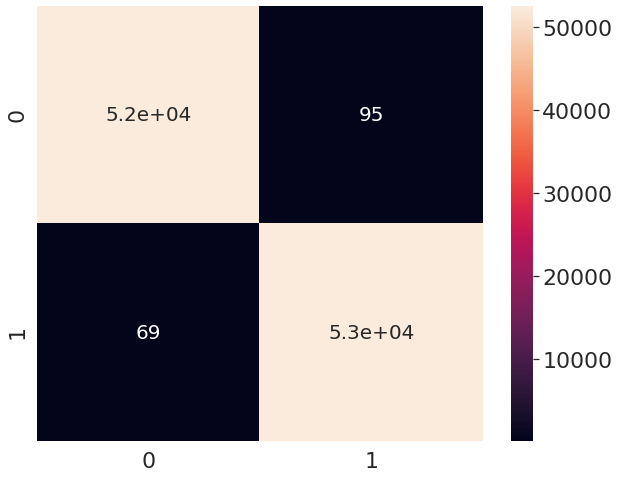

AUC score:  0.9984402343452788


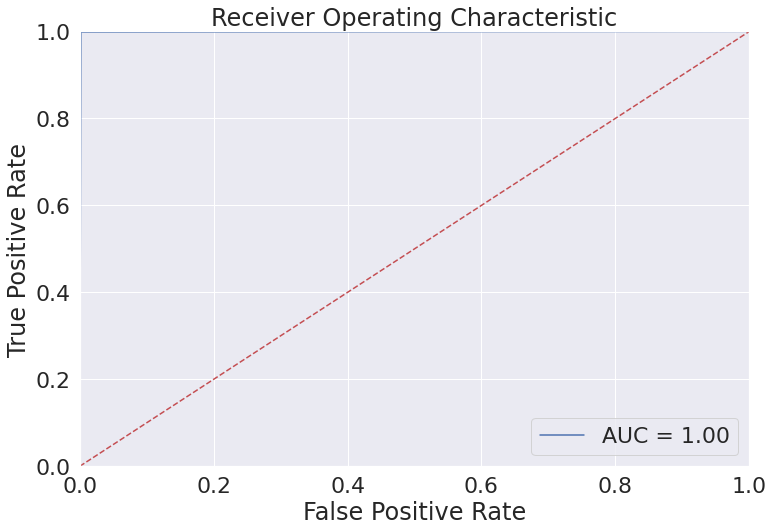

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0480278  0.15235643 0.17934592 ... 0.89613778 1.13853133 1.09710707]
Visualize quantization error


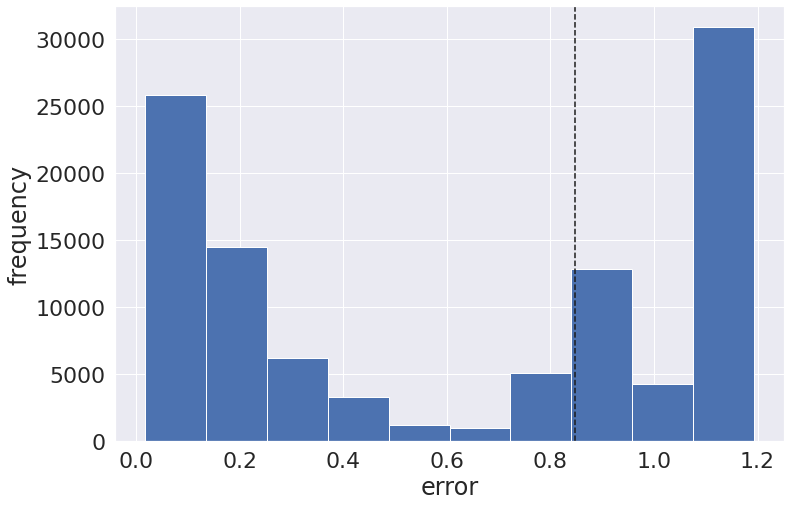

Outliers visualization


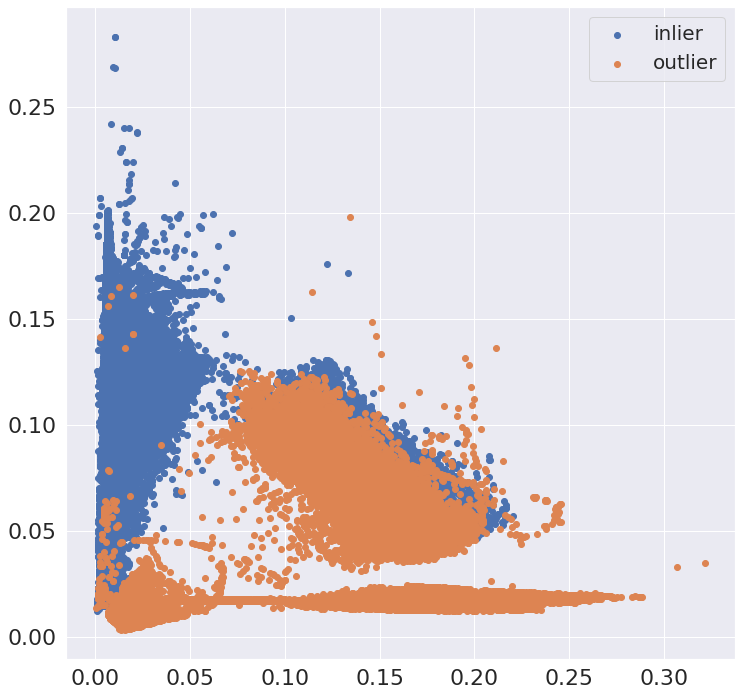

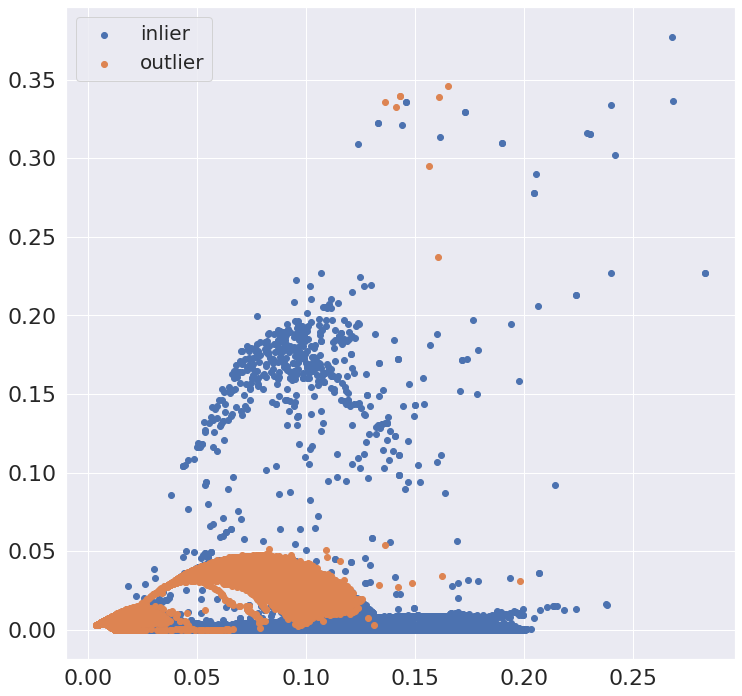

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.749     0.998     0.856     52572
           2      0.997     0.665     0.798     52572

    accuracy                          0.832    105144
   macro avg      0.873     0.832     0.827    105144
weighted avg      0.873     0.832     0.827    105144



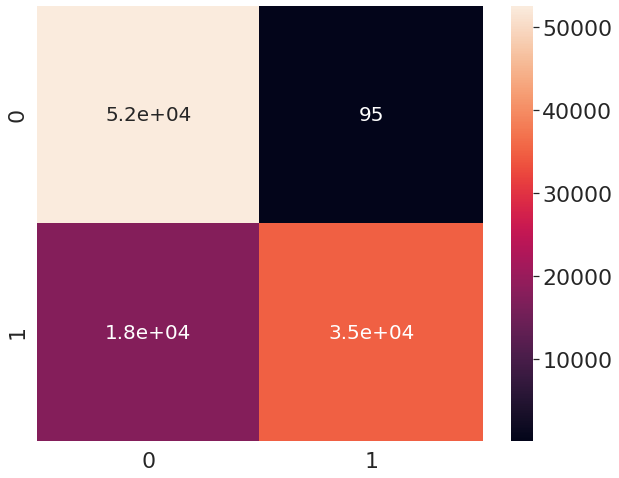

AUC score:  0.8316118846534278


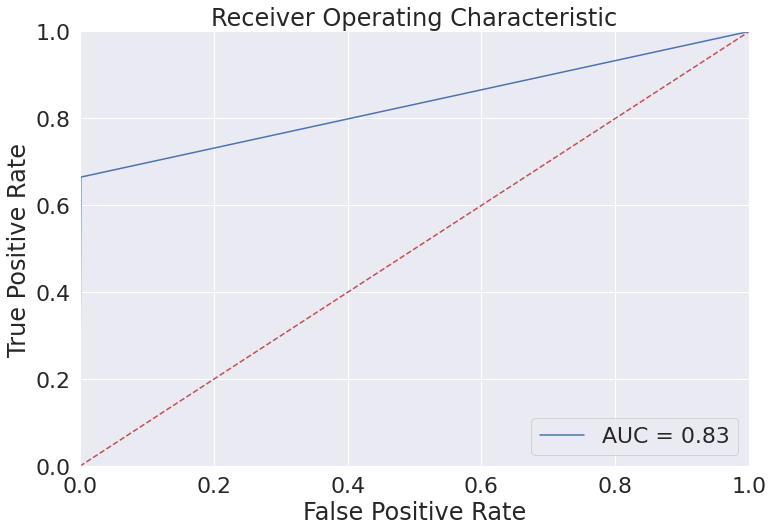

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [59]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 3.49441950e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.35967616e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 3.50465985e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 3.10038508e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 4.61094231e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.92495939e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.05807944 0.14635793 0.18789615 ... 1.18575814 1.12362153 1.18575814]
Visualize quantization error


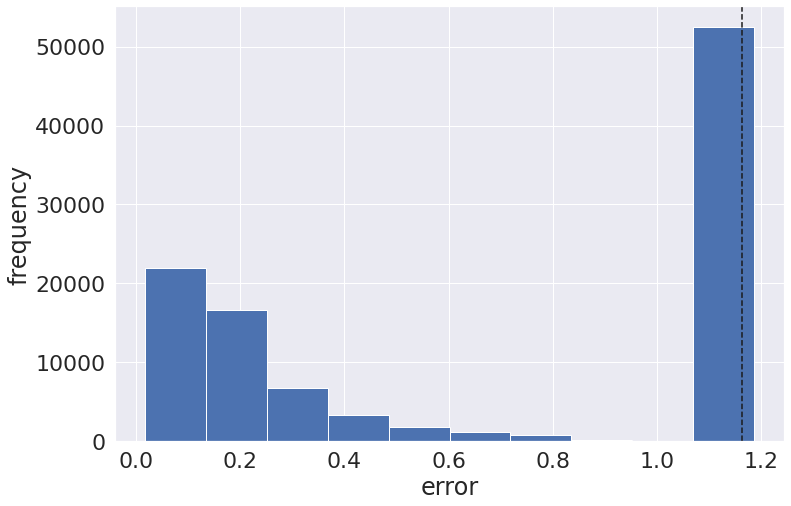

Outliers visualization


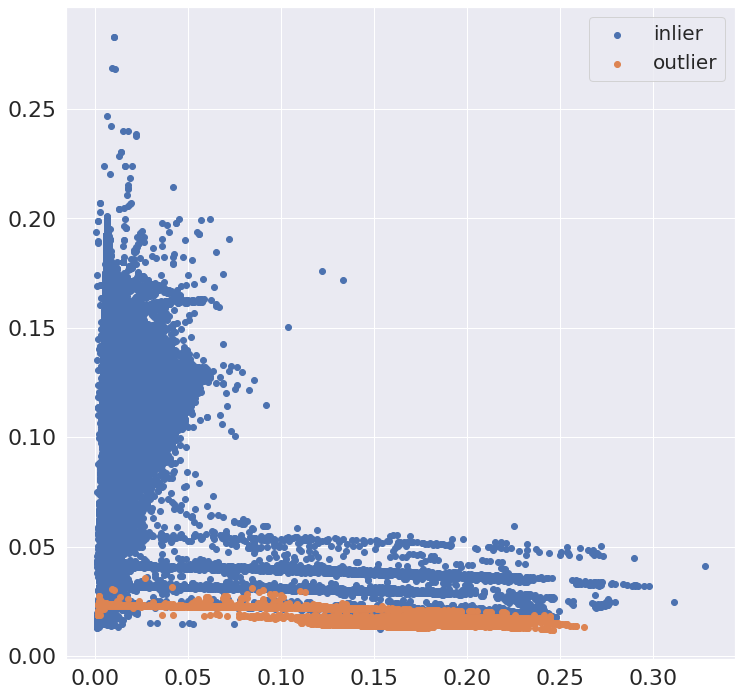

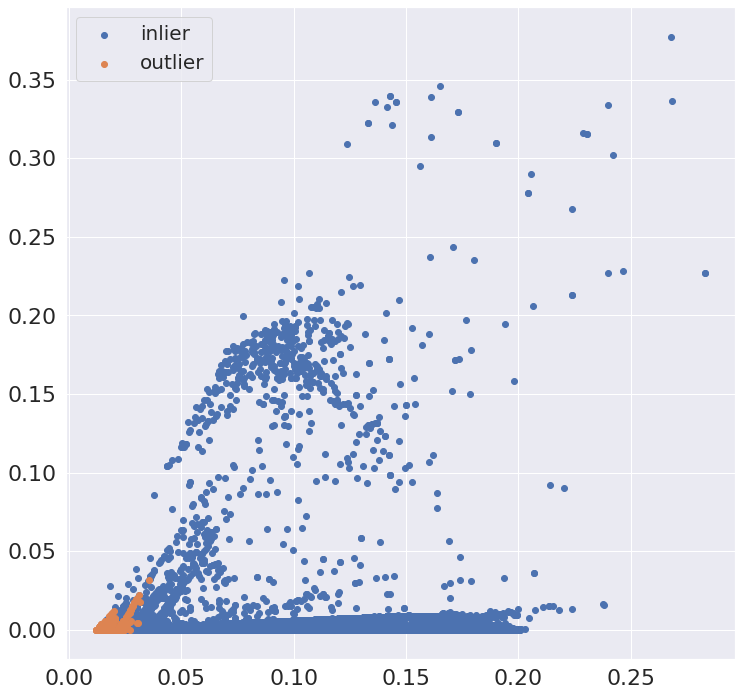

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.989     0.993     52572
           2      0.989     0.997     0.993     52572

    accuracy                          0.993    105144
   macro avg      0.993     0.993     0.993    105144
weighted avg      0.993     0.993     0.993    105144



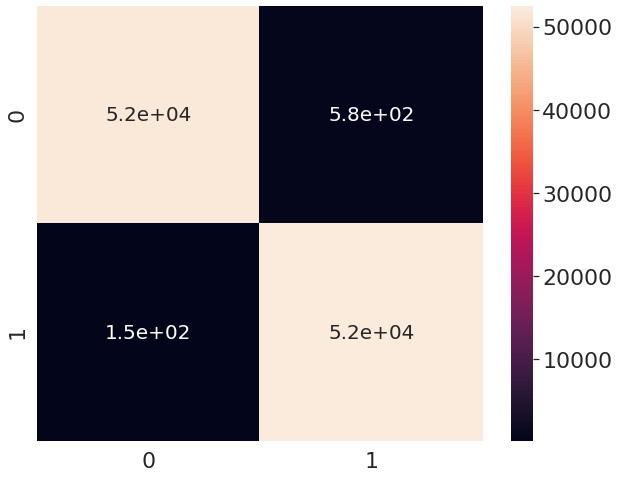

AUC score:  0.9931046945141901


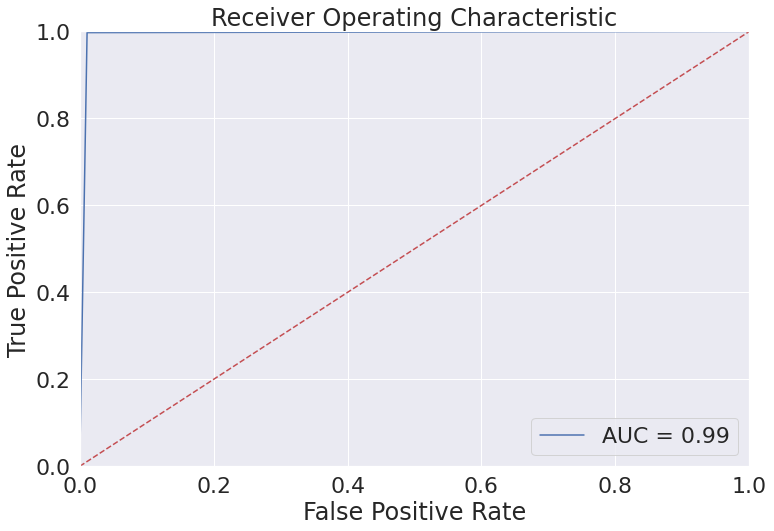

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [60]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.05807944 0.14635793 0.18789615 ... 0.90703527 1.18382837 1.12571868]
Visualize quantization error


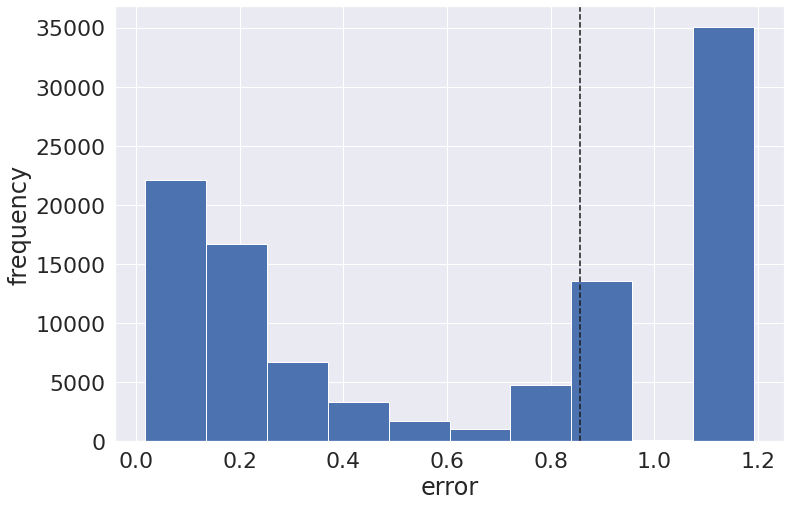

Outliers visualization


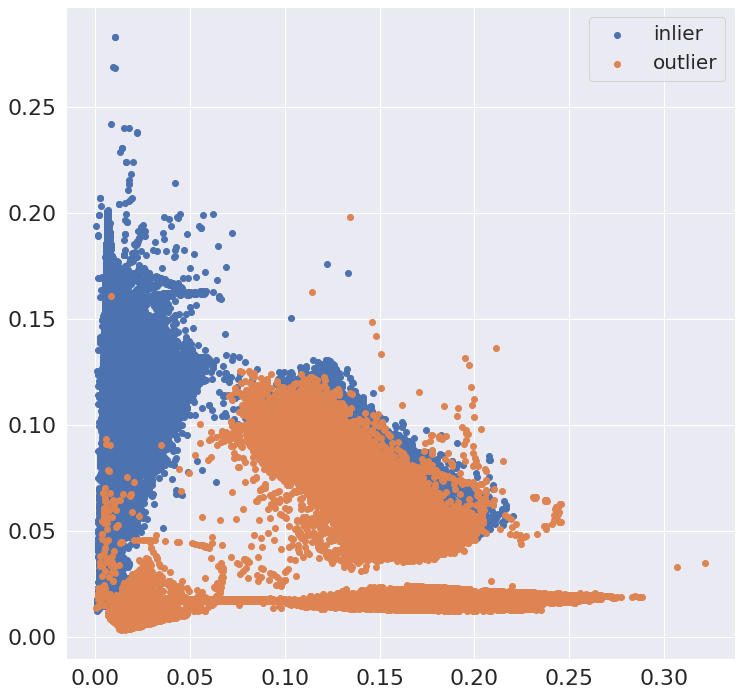

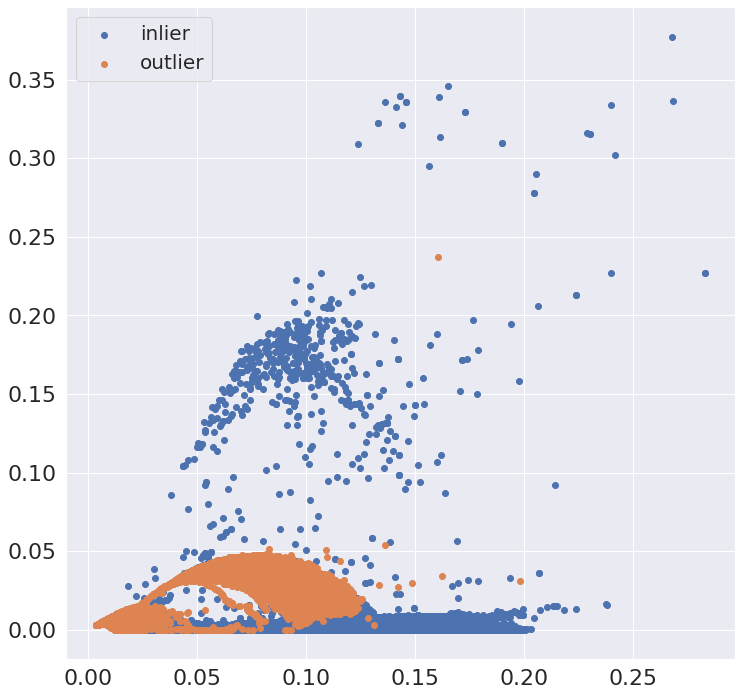

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.734     0.989     0.842     52572
           2      0.983     0.641     0.776     52572

    accuracy                          0.815    105144
   macro avg      0.858     0.815     0.809    105144
weighted avg      0.858     0.815     0.809    105144



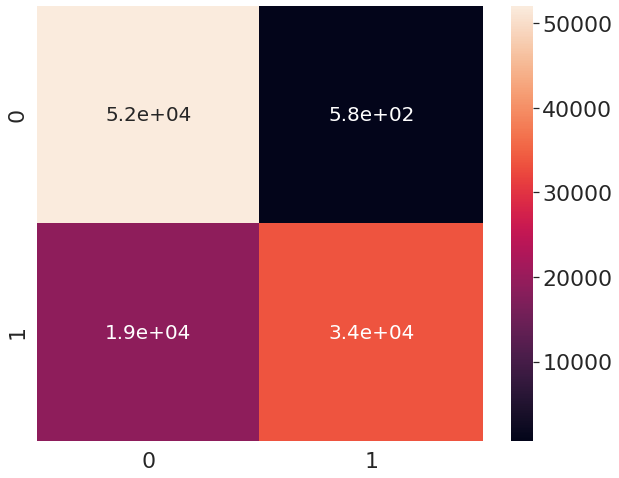

AUC score:  0.8148348930989882


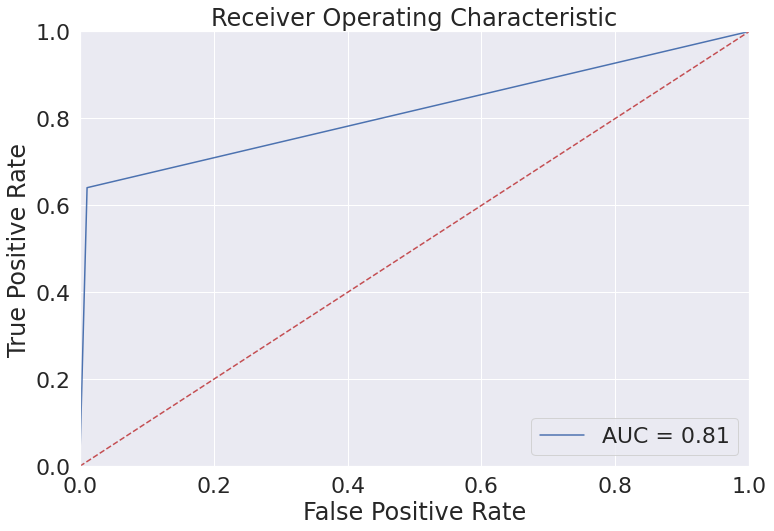

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [62]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17831731 0.34762254 0.2424533  ... 1.23827045 1.07194124 1.23827045]
Visualize quantization error


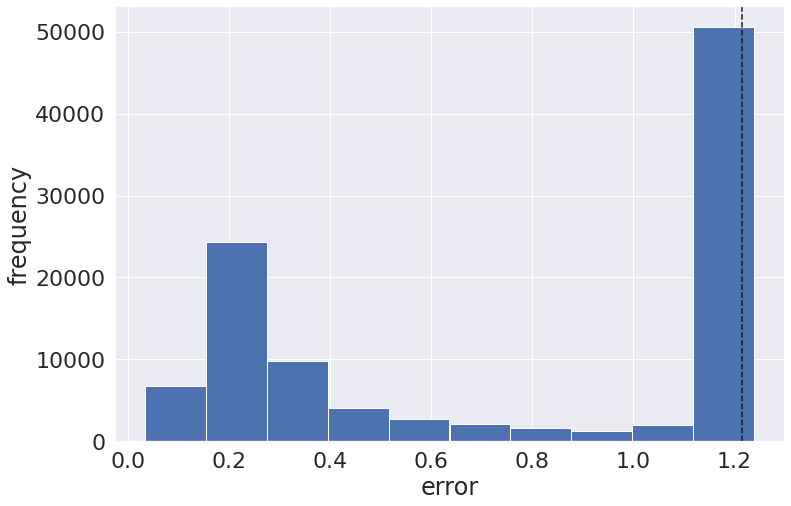

Outliers visualization


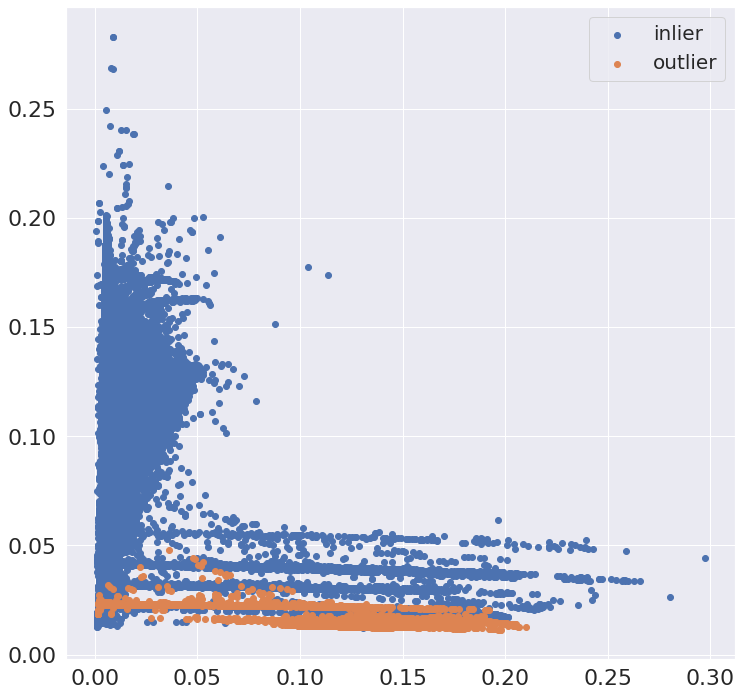

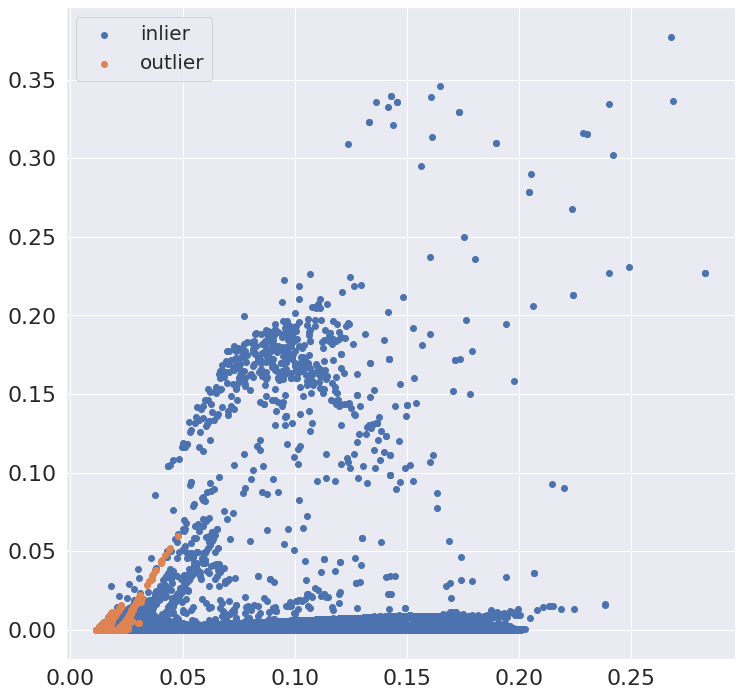

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.939     0.940     52572
           2      0.939     0.941     0.940     52572

    accuracy                          0.940    105144
   macro avg      0.940     0.940     0.940    105144
weighted avg      0.940     0.940     0.940    105144



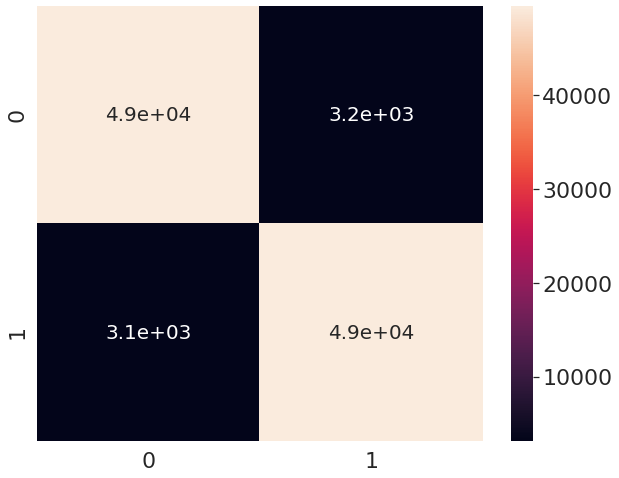

AUC score:  0.9397492962033022


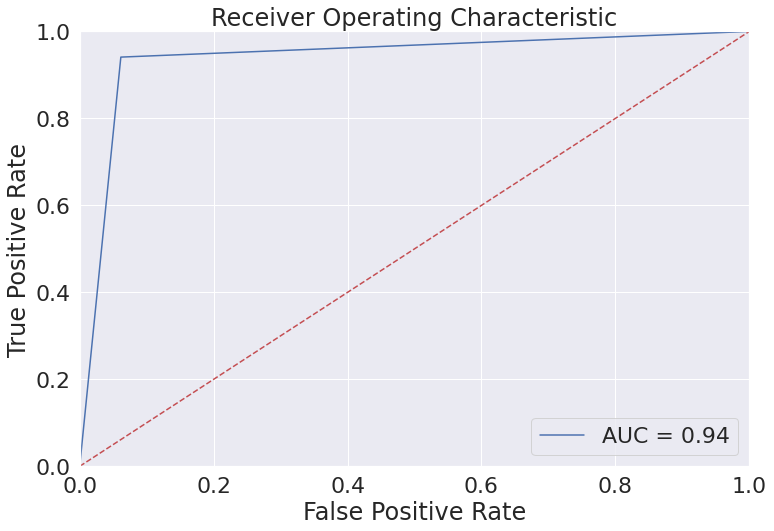

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17831731 0.34762254 0.2424533  ... 0.90188265 1.23604944 1.18288593]
Visualize quantization error


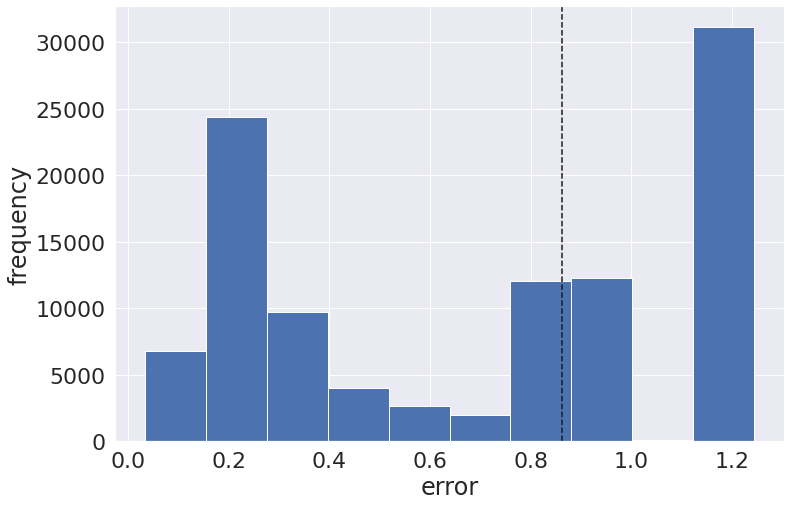

Outliers visualization


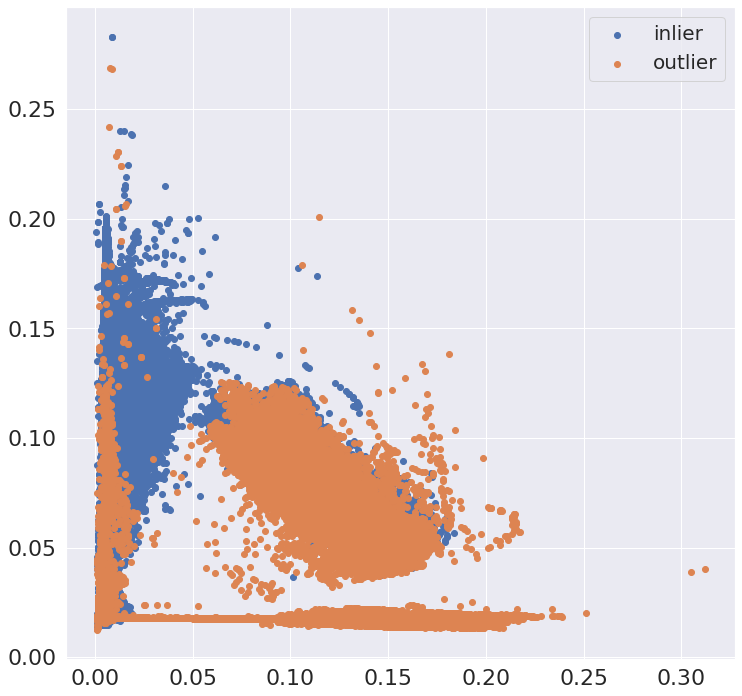

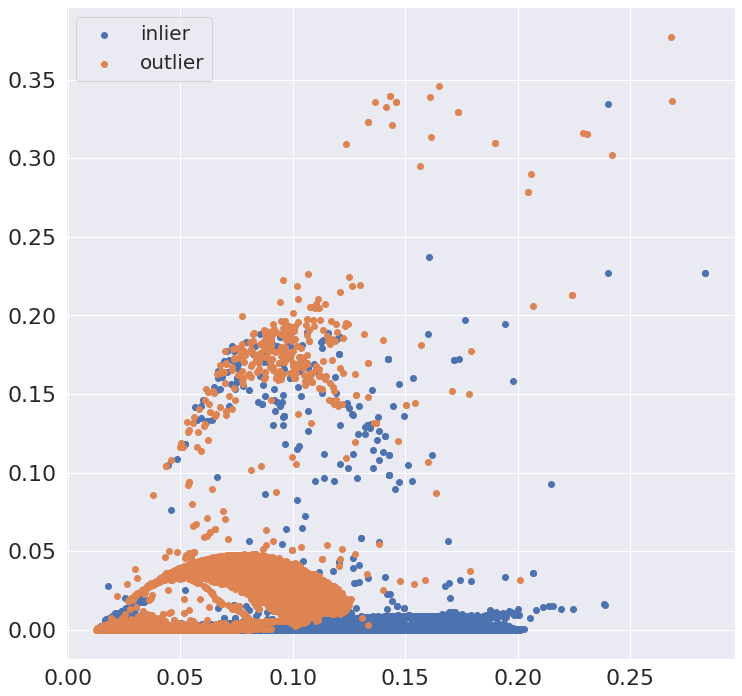

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.939     0.968     52572
           2      0.942     0.999     0.970     52572

    accuracy                          0.969    105144
   macro avg      0.970     0.969     0.969    105144
weighted avg      0.970     0.969     0.969    105144



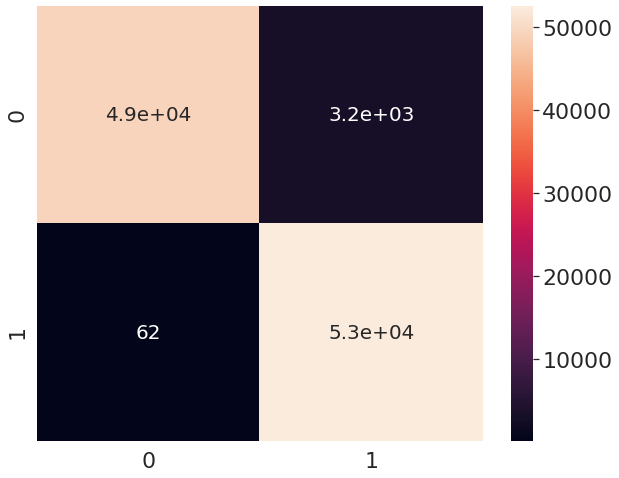

AUC score:  0.9686905577113293


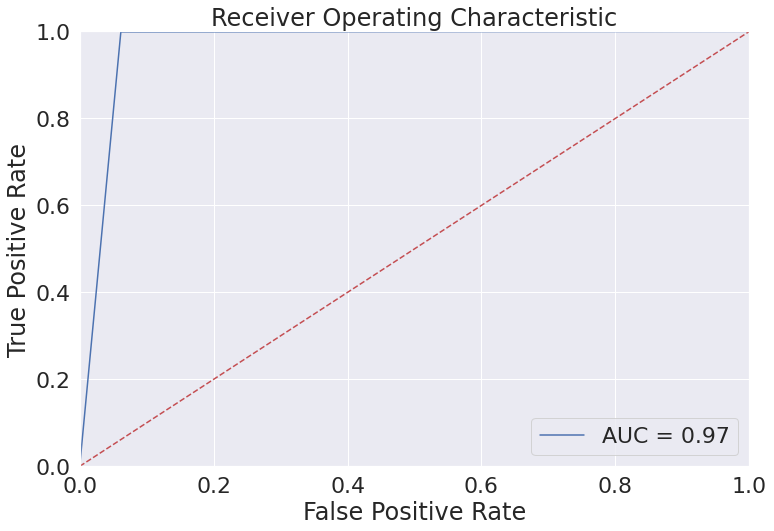

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0734802  0.3663033  0.17874193 ... 1.20992083 1.13579747 1.20992083]
Visualize quantization error


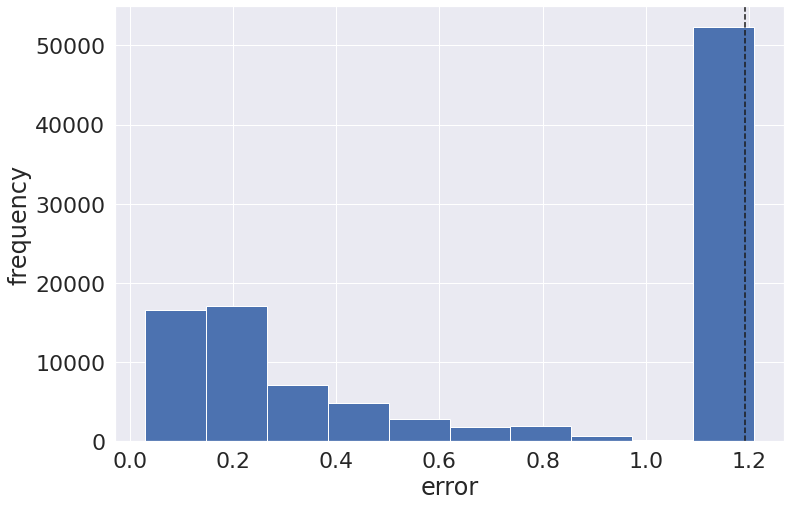

Outliers visualization


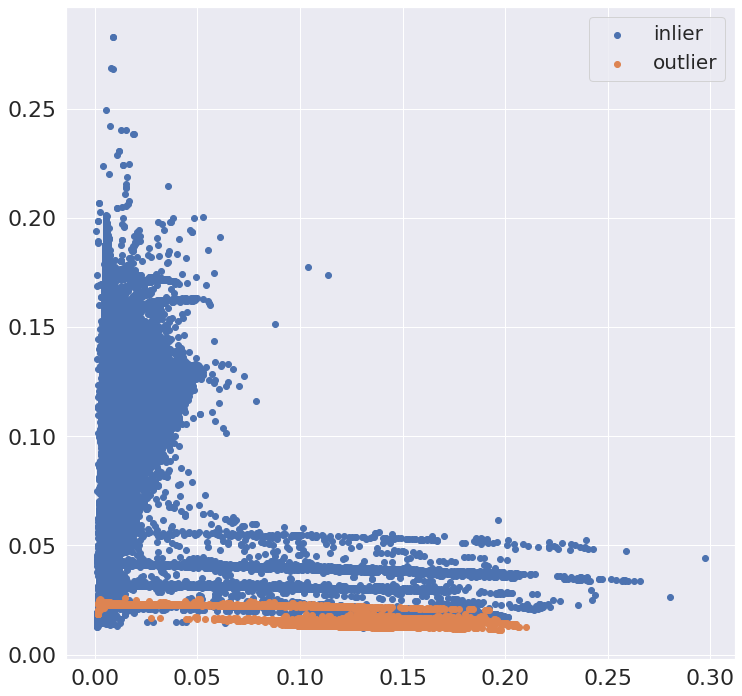

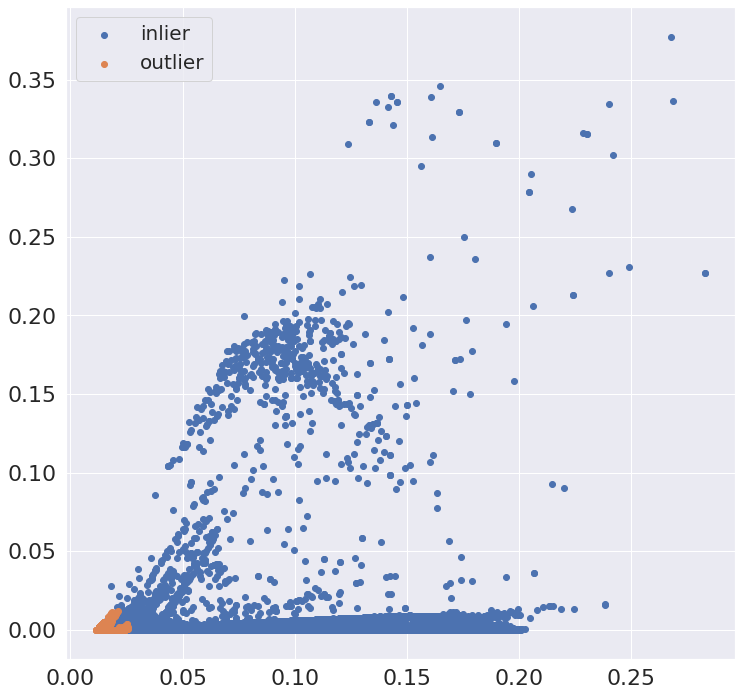

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.993     0.995     52572
           2      0.993     0.997     0.995     52572

    accuracy                          0.995    105144
   macro avg      0.995     0.995     0.995    105144
weighted avg      0.995     0.995     0.995    105144



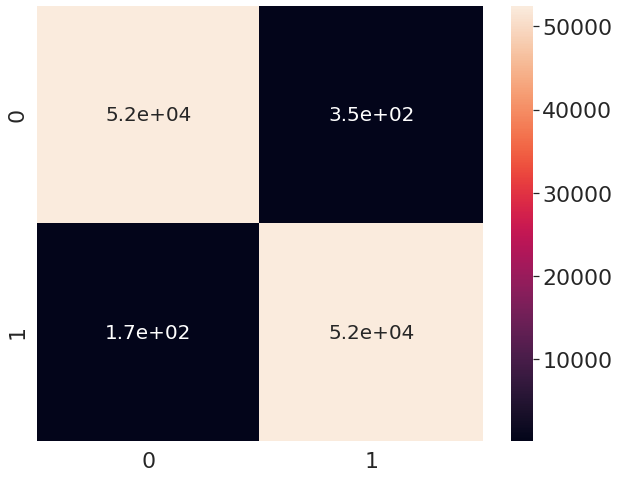

AUC score:  0.9950639123487788


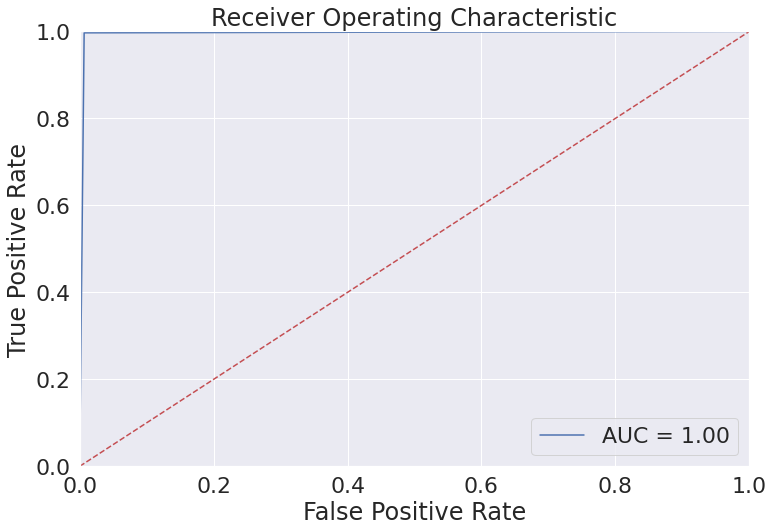

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0734802  0.3663033  0.17874193 ... 0.88646551 1.20859836 1.14972289]
Visualize quantization error


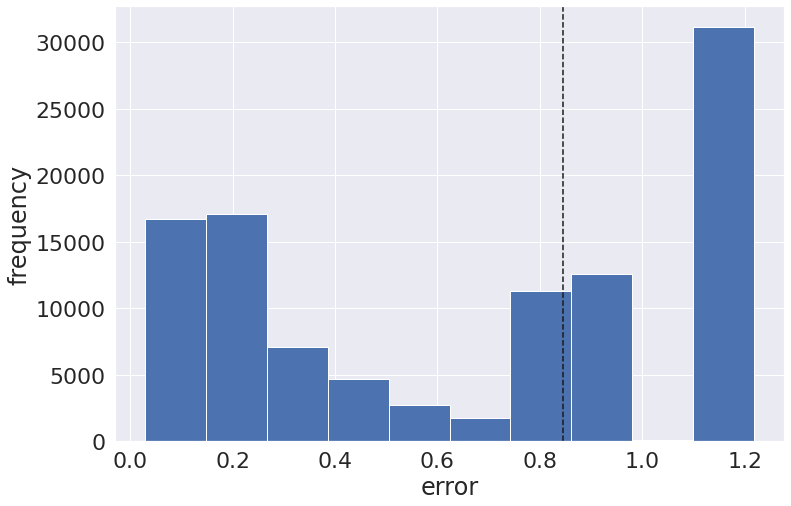

Outliers visualization


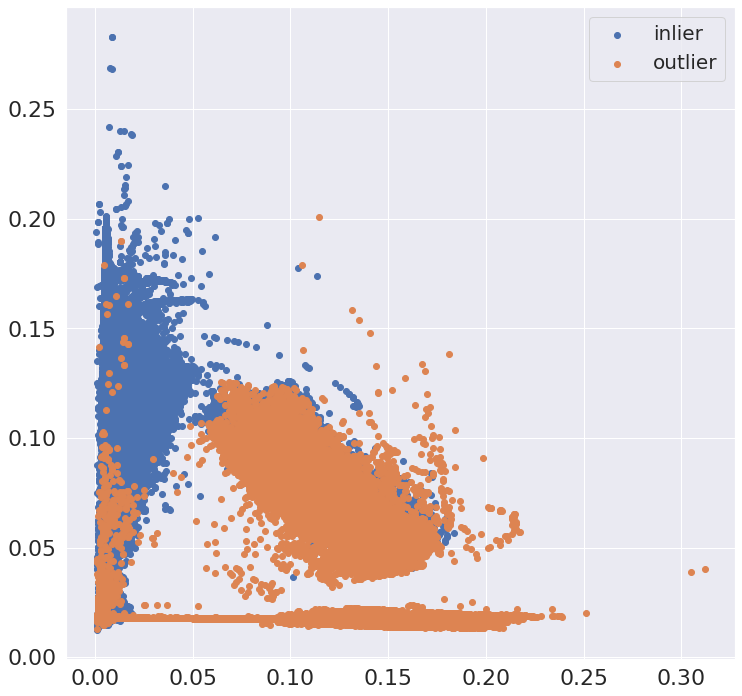

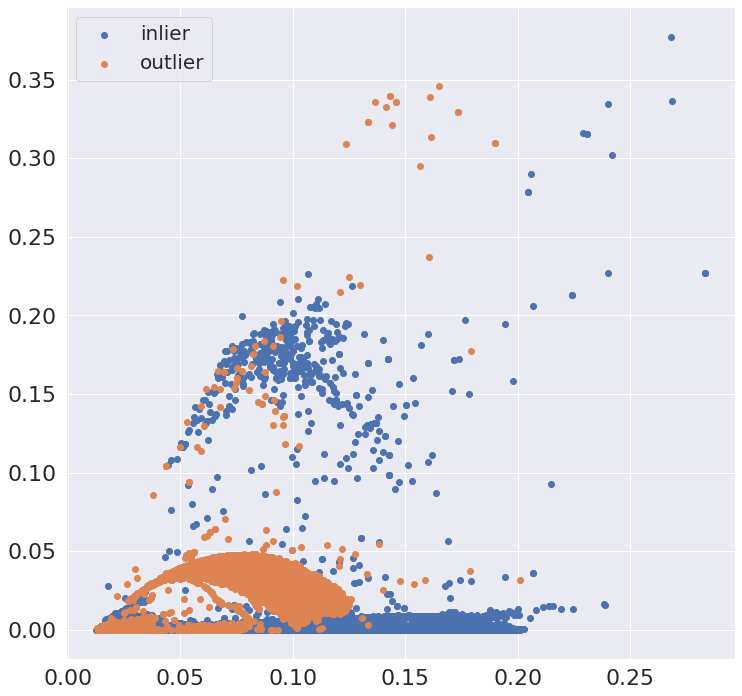

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.993     0.996     52572
           2      0.993     1.000     0.996     52572

    accuracy                          0.996    105144
   macro avg      0.996     0.996     0.996    105144
weighted avg      0.996     0.996     0.996    105144



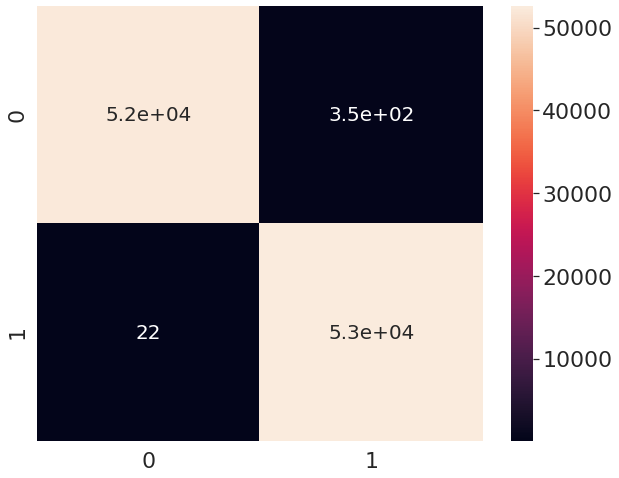

AUC score:  0.9964715057445028


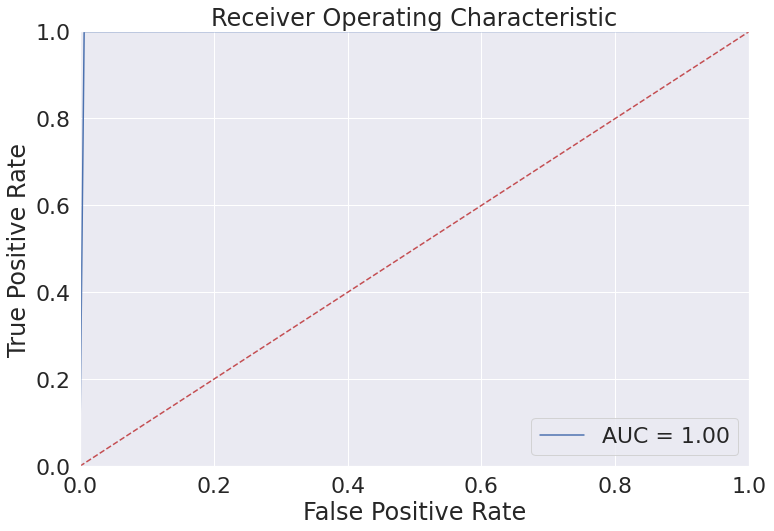

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [68]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09151757 0.39549381 0.16859847 ... 1.18453469 0.86087821 1.18453469]
Visualize quantization error


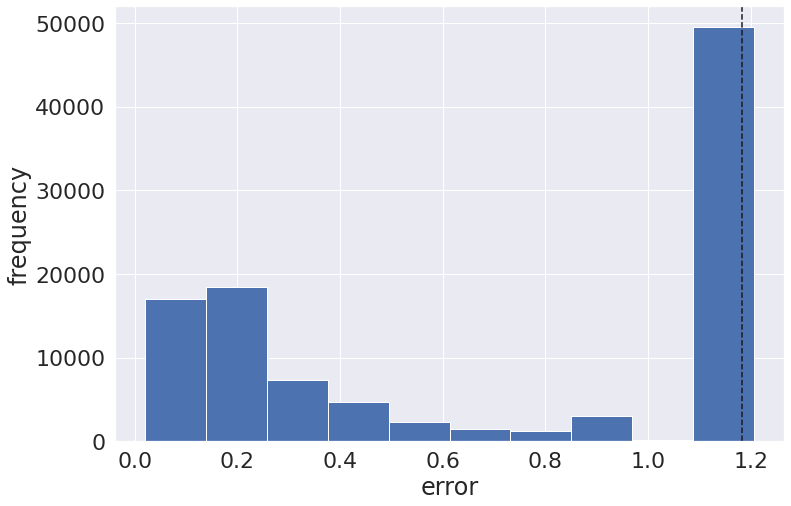

Outliers visualization


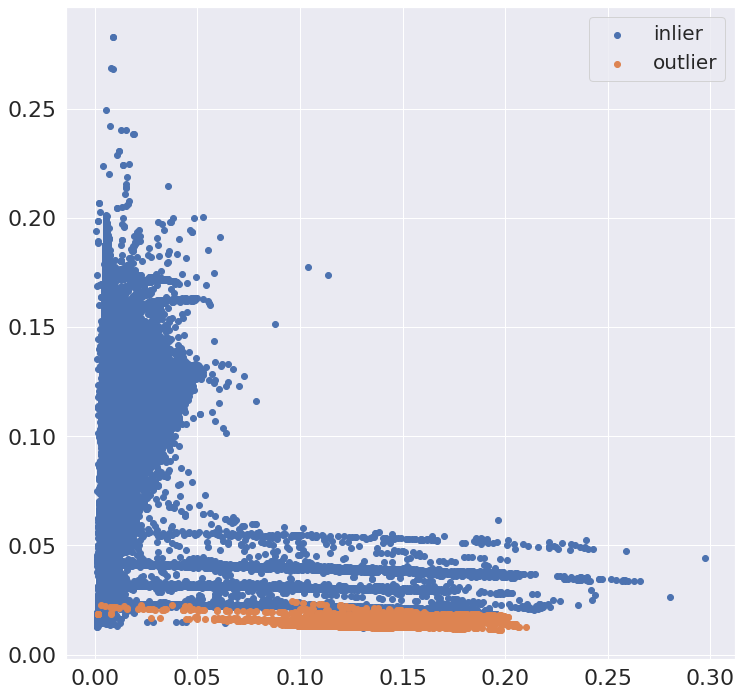

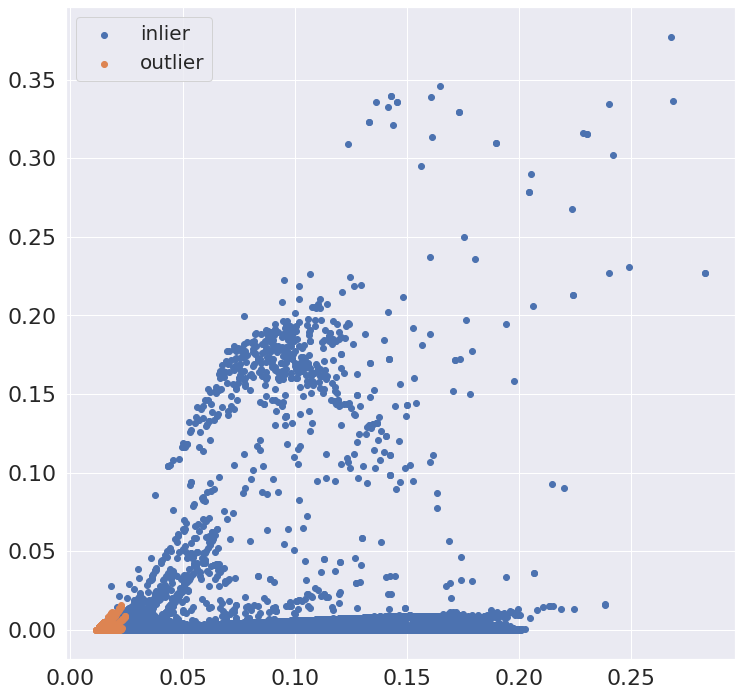

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.944     0.997     0.970     52572
           2      0.996     0.941     0.968     52572

    accuracy                          0.969    105144
   macro avg      0.970     0.969     0.969    105144
weighted avg      0.970     0.969     0.969    105144



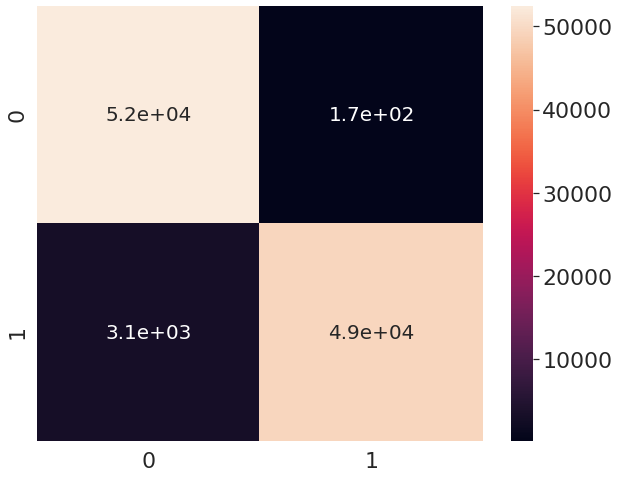

AUC score:  0.9687381115422659


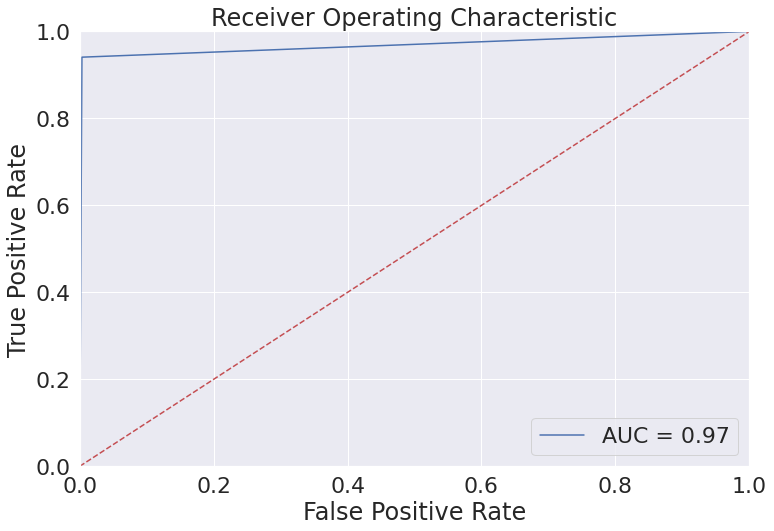

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09151757 0.39549381 0.16859847 ... 0.90613475 1.18328075 1.14305101]
Visualize quantization error


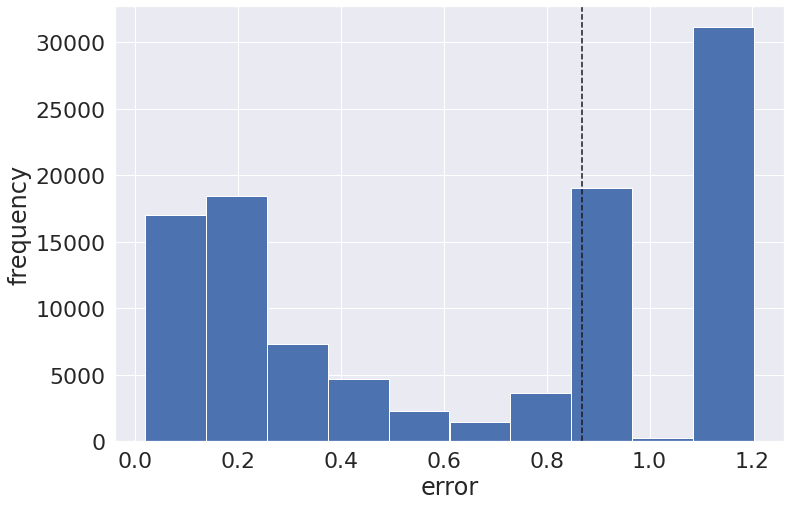

Outliers visualization


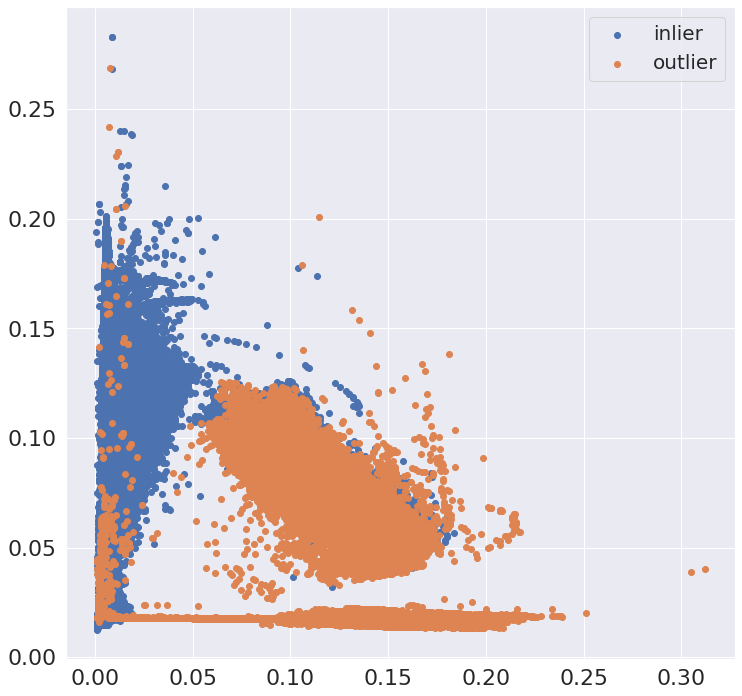

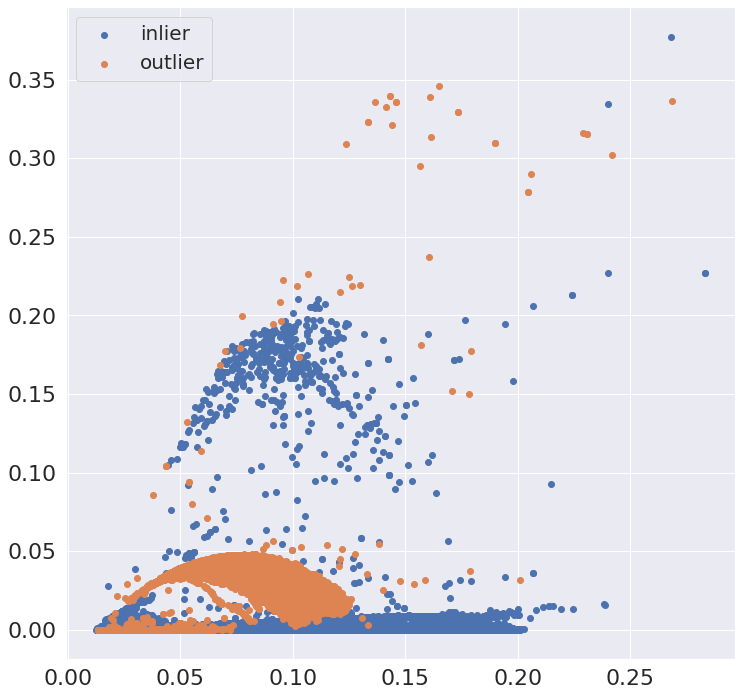

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.997     0.998     52572
           2      0.997     0.999     0.998     52572

    accuracy                          0.998    105144
   macro avg      0.998     0.998     0.998    105144
weighted avg      0.998     0.998     0.998    105144



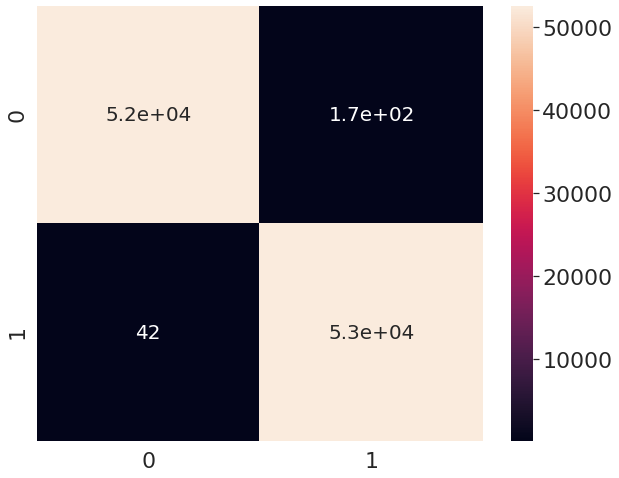

AUC score:  0.997945674503538


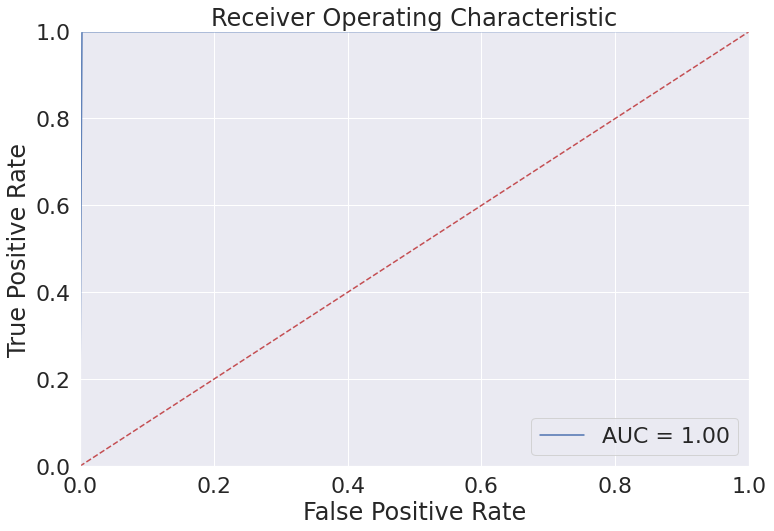

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [71]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.04242741 0.26109525 0.17202974 ... 1.01814208 0.81561216 1.01814208]
Visualize quantization error


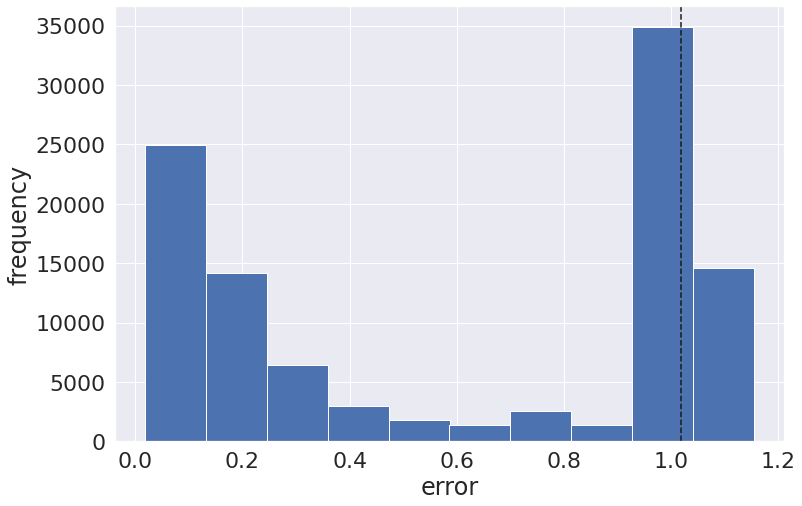

Outliers visualization


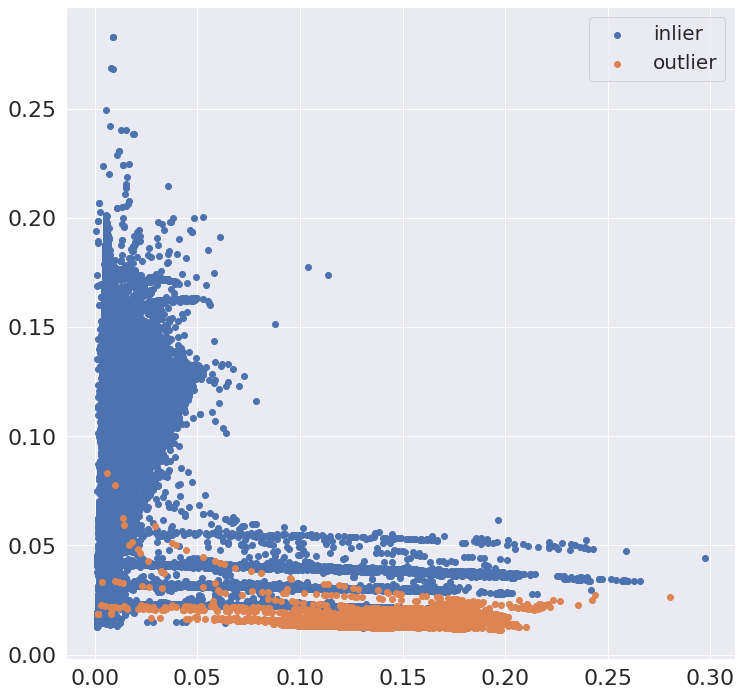

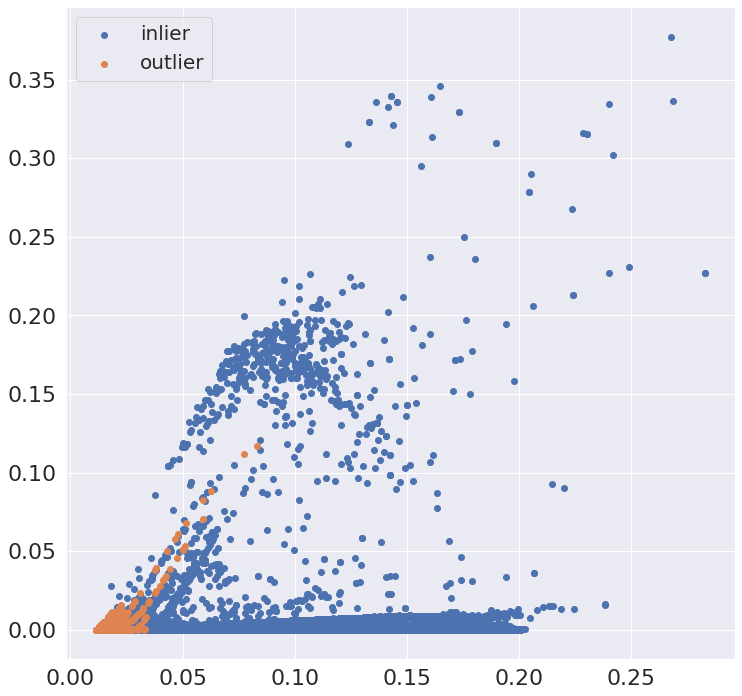

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.944     0.999     0.971     52572
           2      0.999     0.941     0.969     52572

    accuracy                          0.970    105144
   macro avg      0.971     0.970     0.970    105144
weighted avg      0.971     0.970     0.970    105144



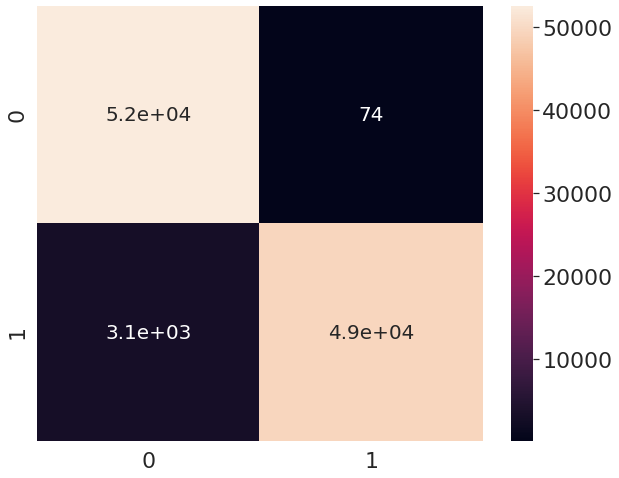

AUC score:  0.969803317355246


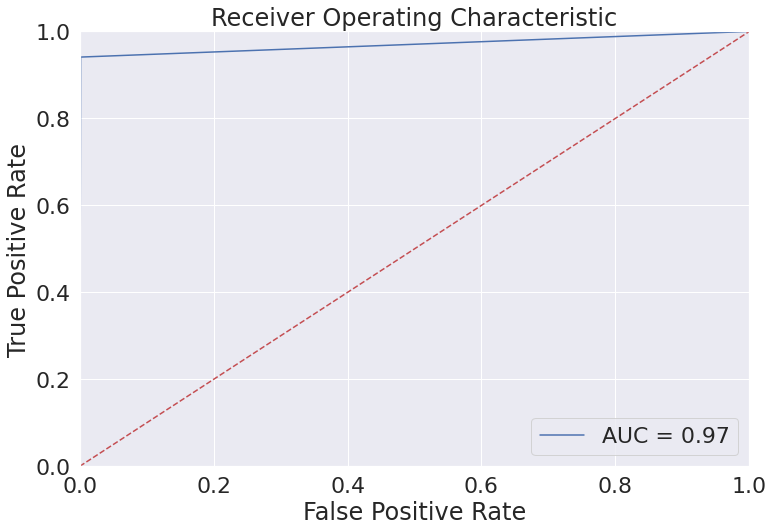

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.04242741 0.26109525 0.17202974 ... 0.87663255 1.02387336 1.01351726]
Visualize quantization error


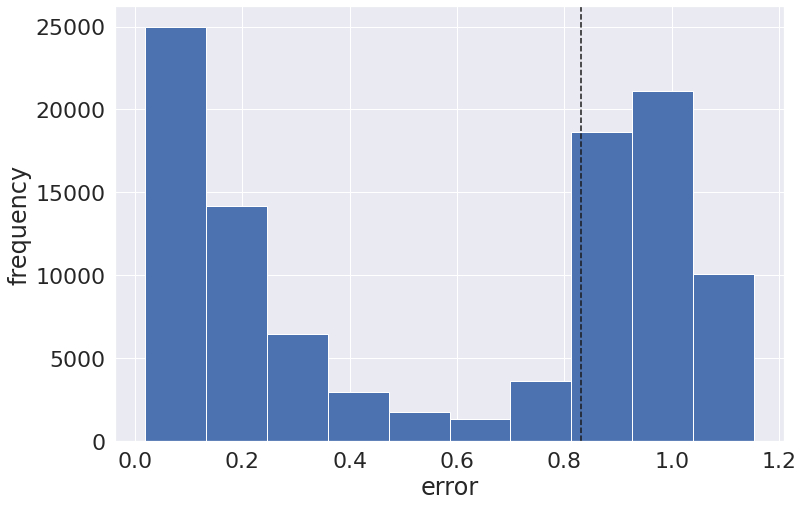

Outliers visualization


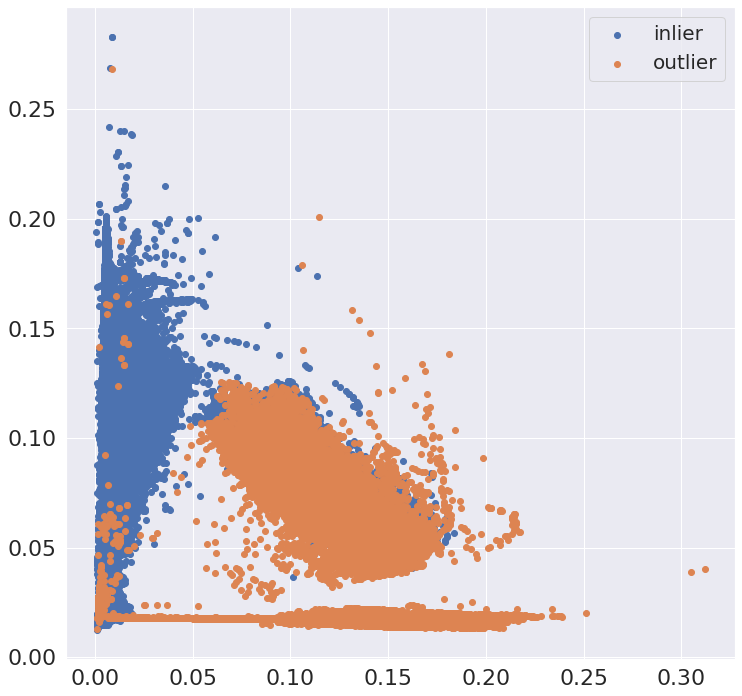

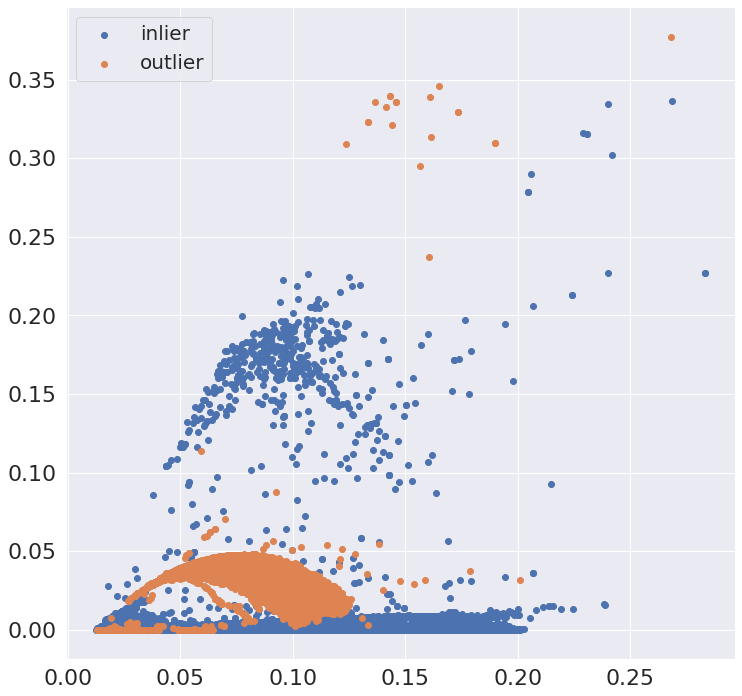

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.999     0.999     52572
           2      0.999     1.000     0.999     52572

    accuracy                          0.999    105144
   macro avg      0.999     0.999     0.999    105144
weighted avg      0.999     0.999     0.999    105144



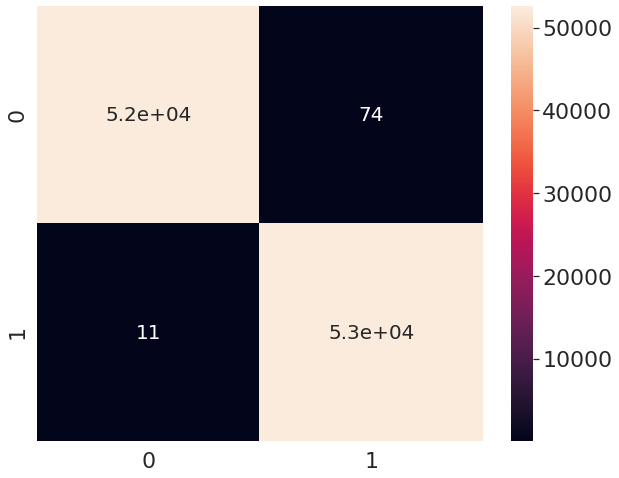

AUC score:  0.9991915848740773


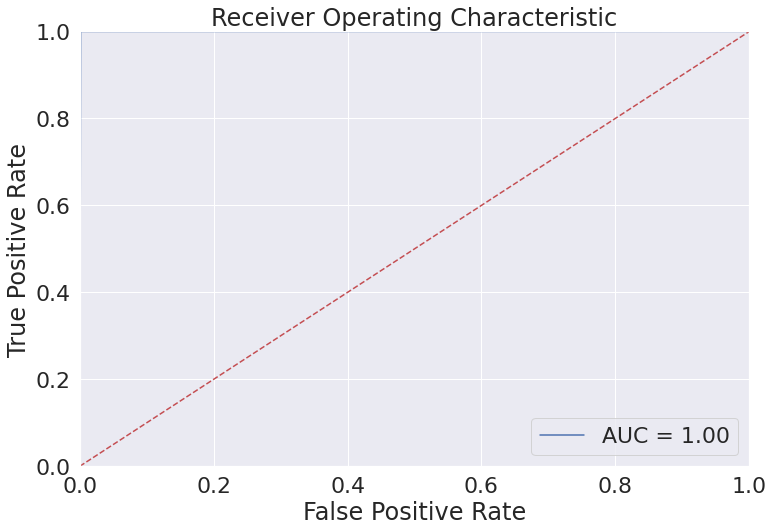

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.07097107 0.38422594 0.18274523 ... 1.17597438 1.11270979 1.17597438]
Visualize quantization error


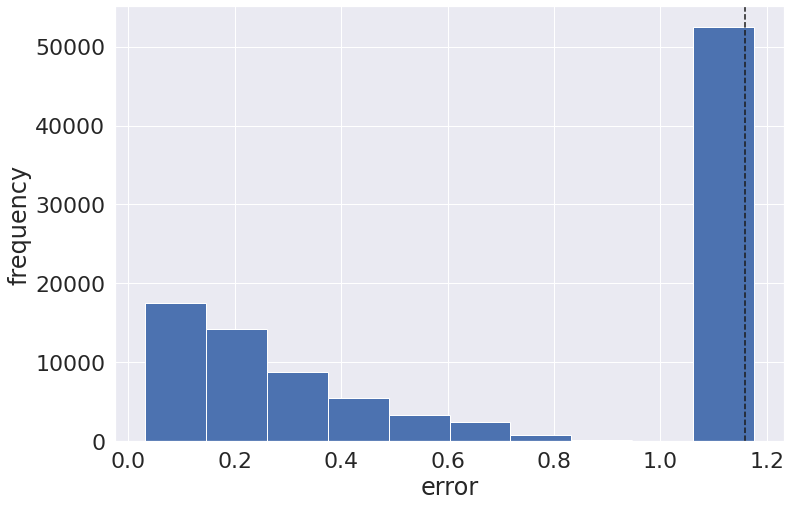

Outliers visualization


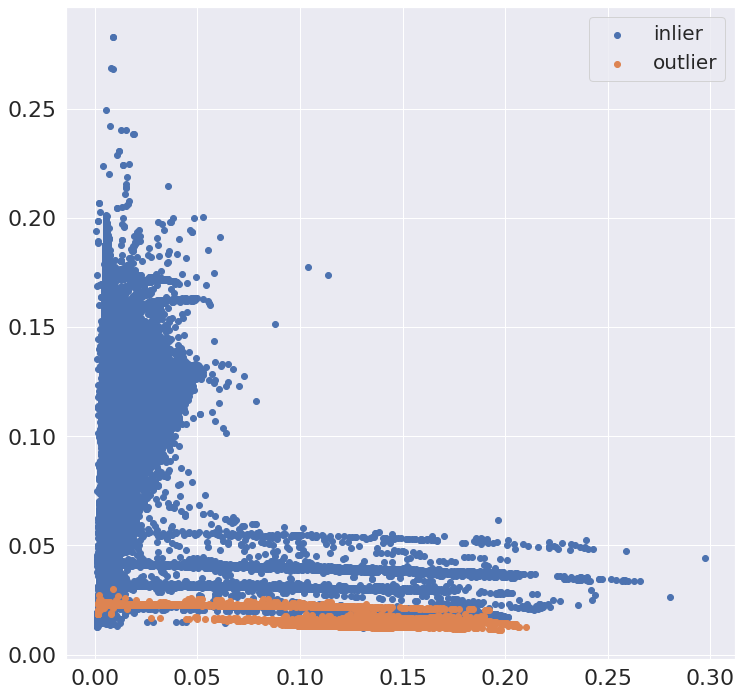

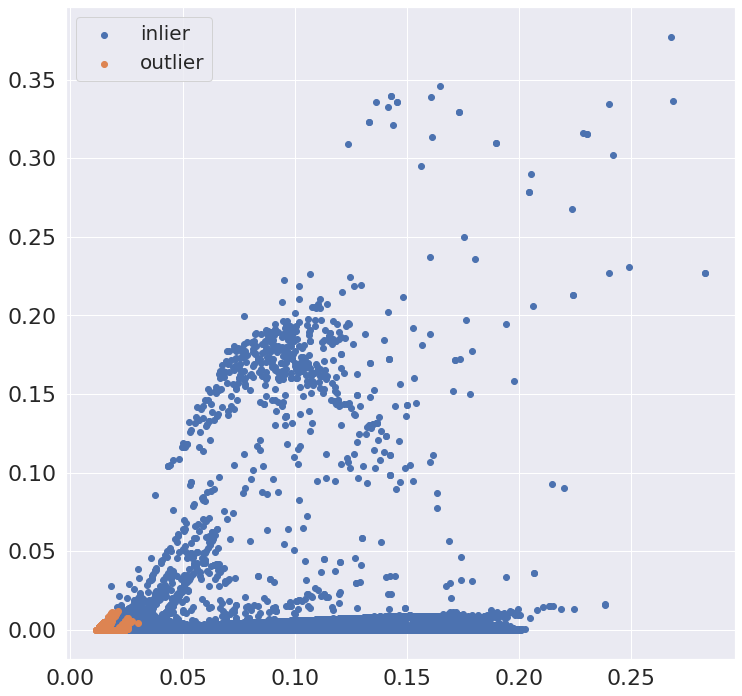

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.993     0.997     0.995     52572
           2      0.997     0.993     0.995     52572

    accuracy                          0.995    105144
   macro avg      0.995     0.995     0.995    105144
weighted avg      0.995     0.995     0.995    105144



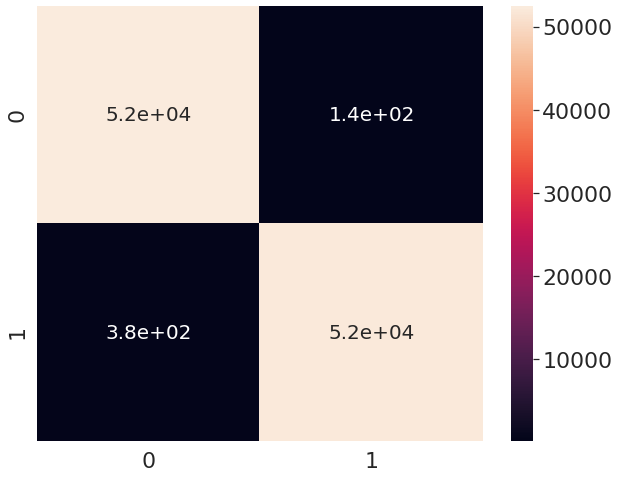

AUC score:  0.9950829338811534


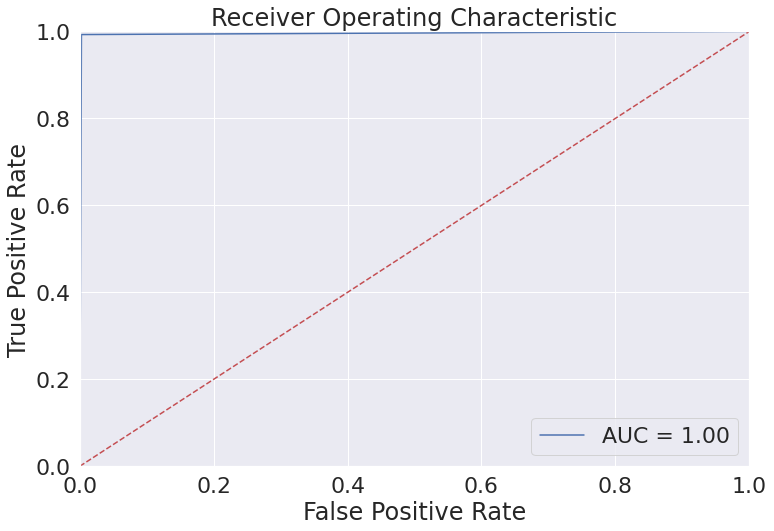

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.07097107 0.38422594 0.18274523 ... 0.90091413 1.17449734 1.12910243]
Visualize quantization error


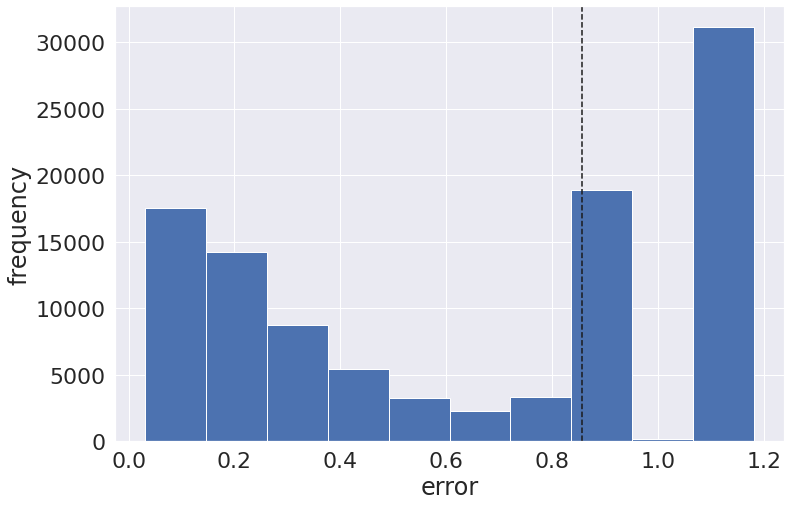

Outliers visualization


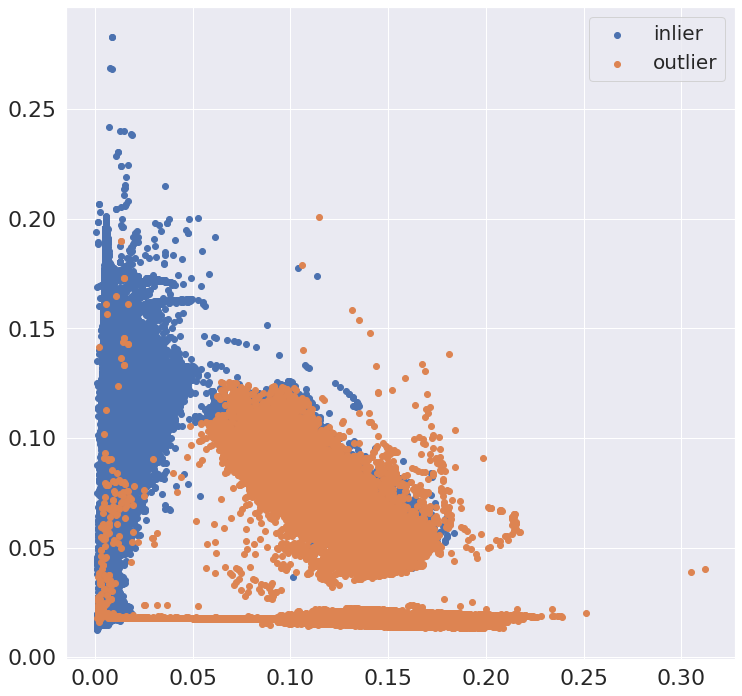

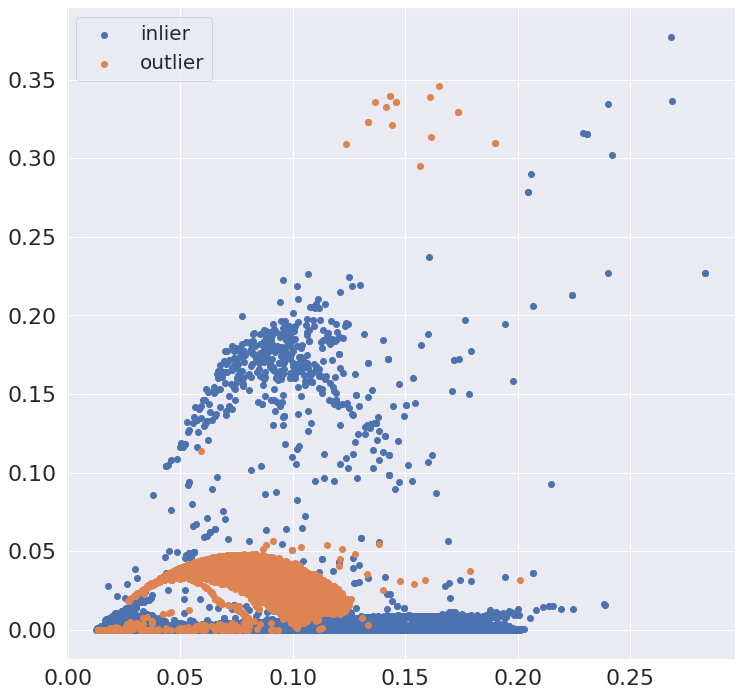

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.997     52572
           2      0.997     0.998     0.997     52572

    accuracy                          0.997    105144
   macro avg      0.997     0.997     0.997    105144
weighted avg      0.997     0.997     0.997    105144



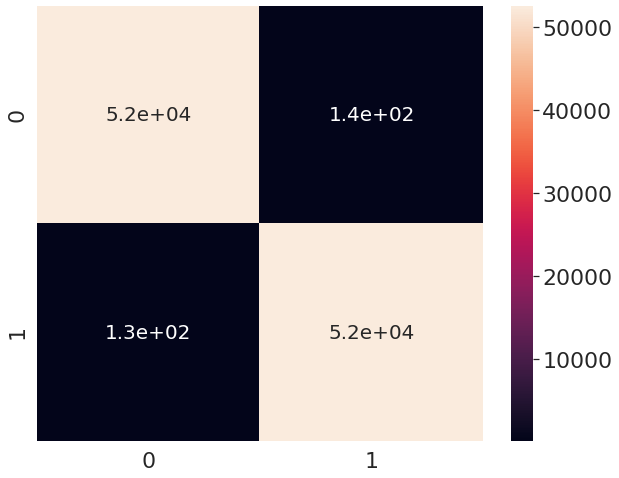

AUC score:  0.9974986684927338


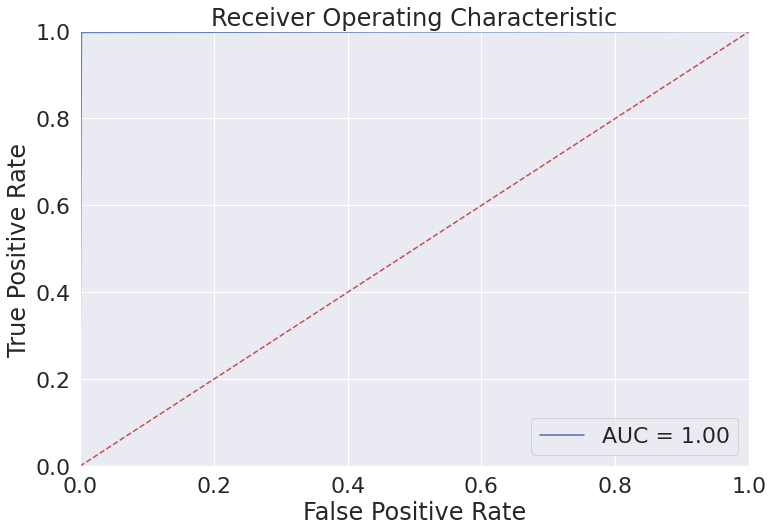

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [77]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08267201 0.28140124 0.16127731 ... 1.21033031 1.14340959 1.21033031]
Visualize quantization error


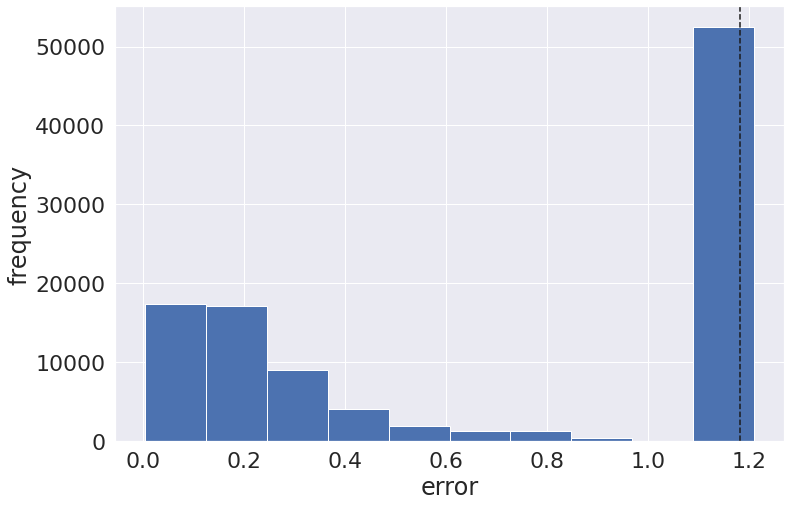

Outliers visualization


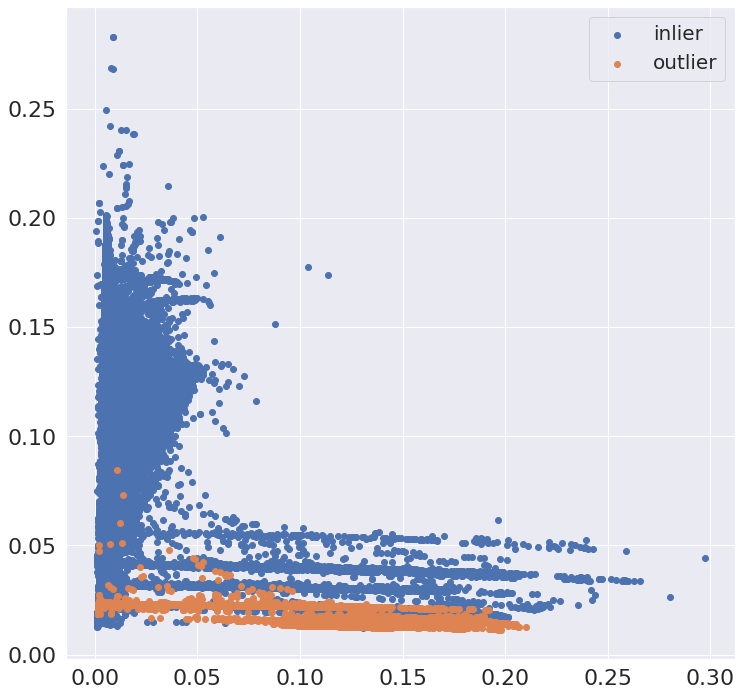

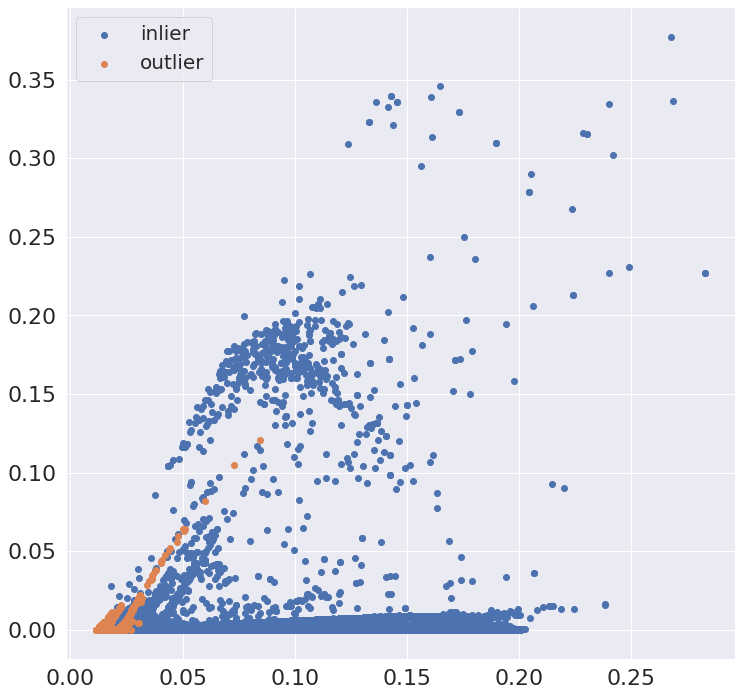

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.968     0.998     0.983     52572
           2      0.998     0.967     0.982     52572

    accuracy                          0.983    105144
   macro avg      0.983     0.983     0.983    105144
weighted avg      0.983     0.983     0.983    105144



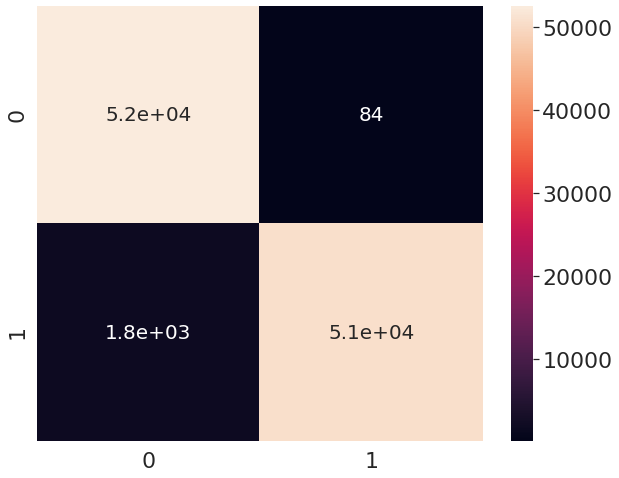

AUC score:  0.9825287225138857


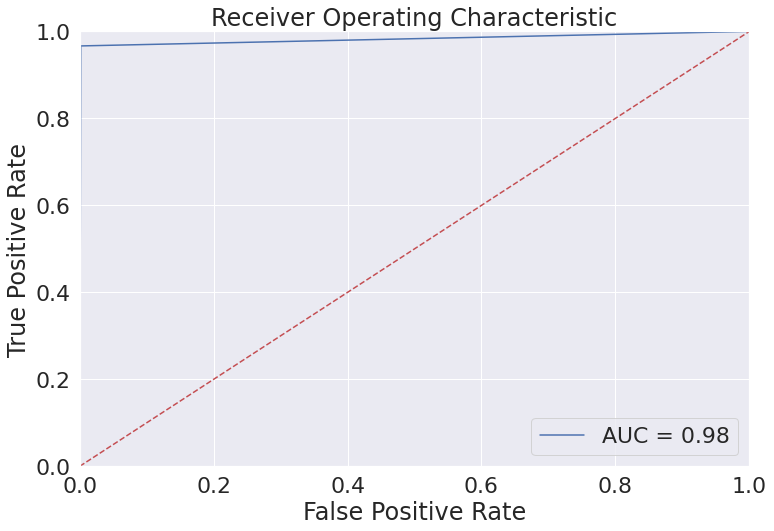

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08267201 0.28140124 0.16127731 ... 0.89795252 1.20766905 1.15692359]
Visualize quantization error


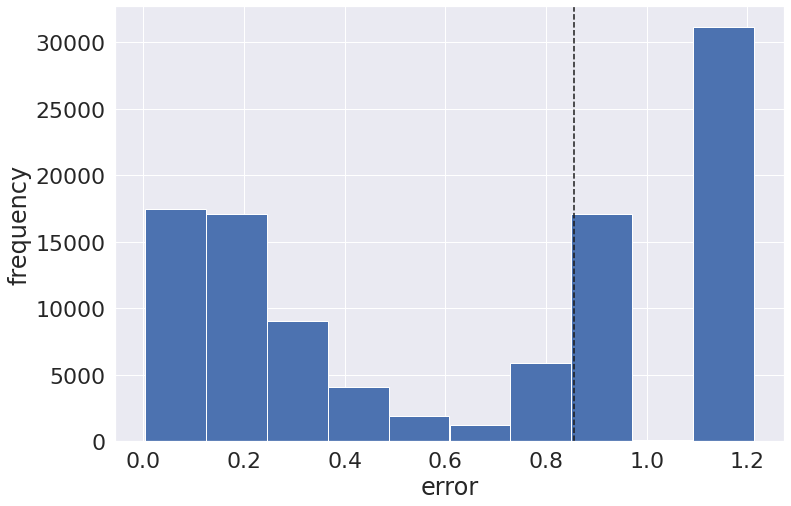

Outliers visualization


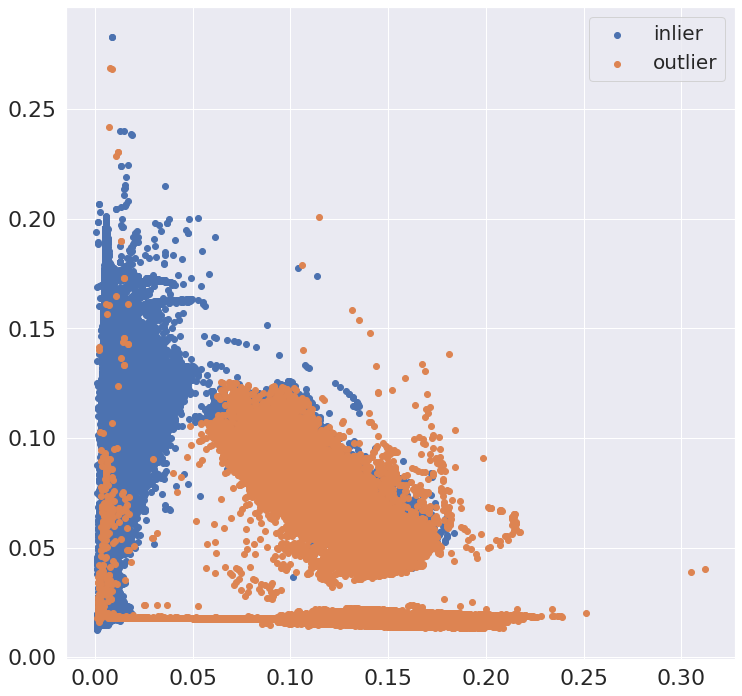

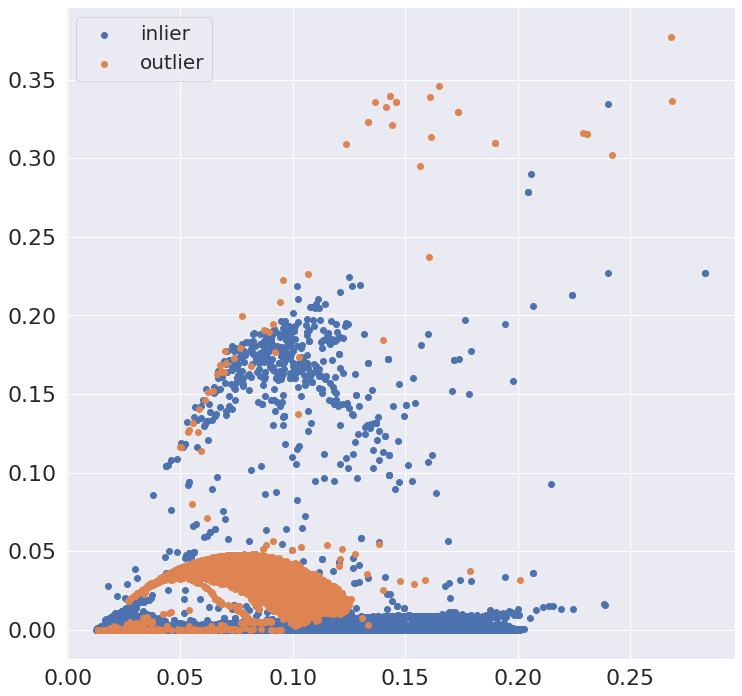

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.998     0.999     52572
           2      0.998     0.999     0.999     52572

    accuracy                          0.999    105144
   macro avg      0.999     0.999     0.999    105144
weighted avg      0.999     0.999     0.999    105144



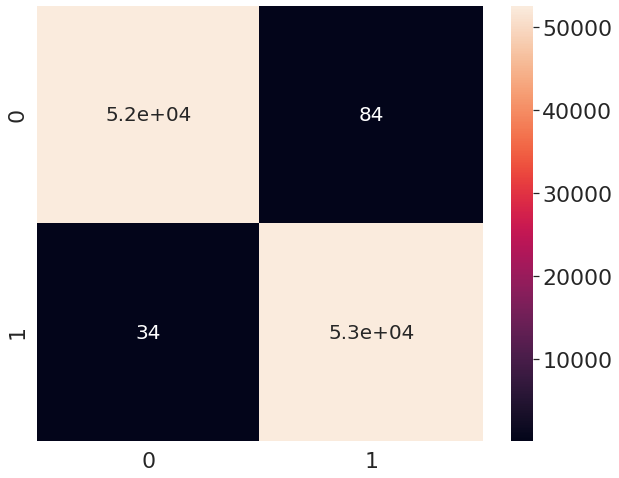

AUC score:  0.9988777295898958


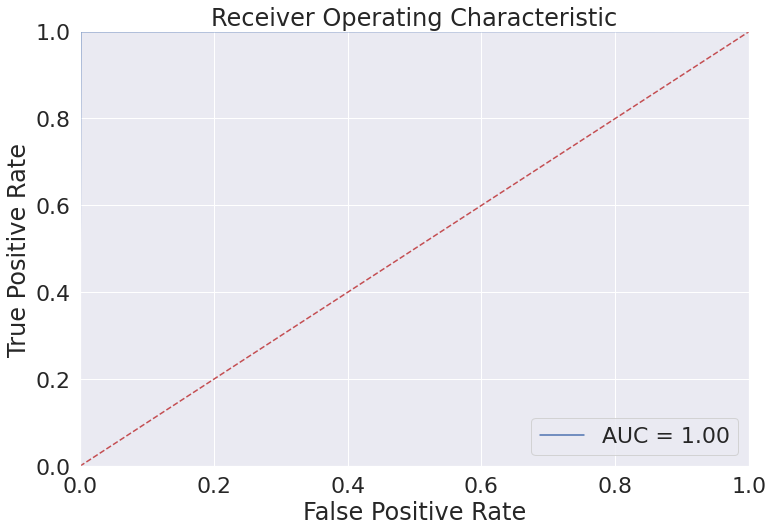

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [80]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06654535 0.33658713 0.18327888 ... 1.21532617 1.0676946  1.21532617]
Visualize quantization error


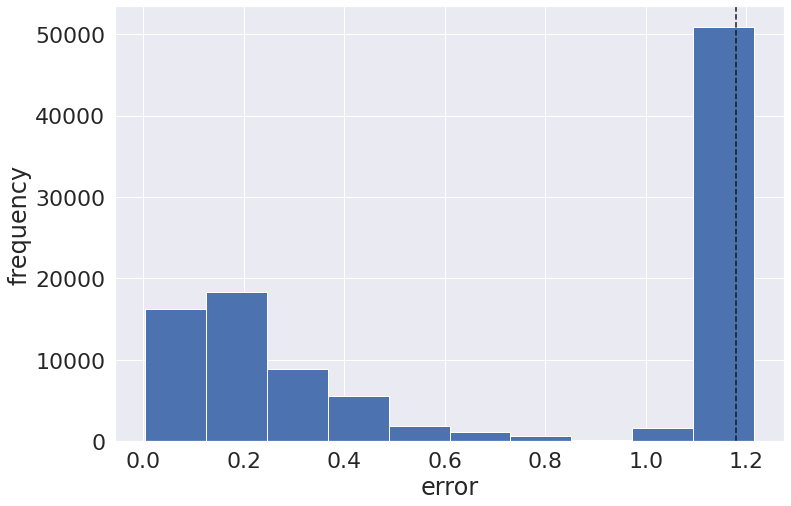

Outliers visualization


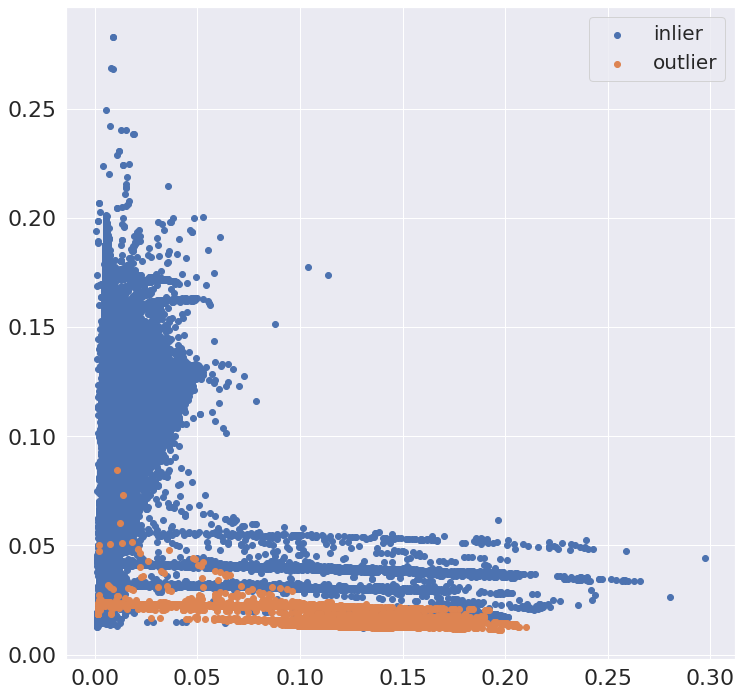

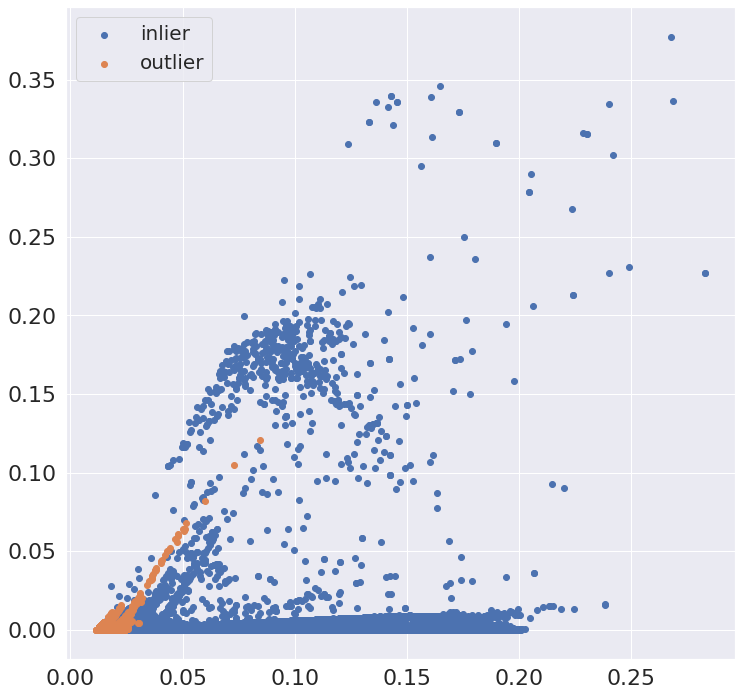

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.944     0.999     0.971     52572
           2      0.999     0.941     0.969     52572

    accuracy                          0.970    105144
   macro avg      0.972     0.970     0.970    105144
weighted avg      0.972     0.970     0.970    105144



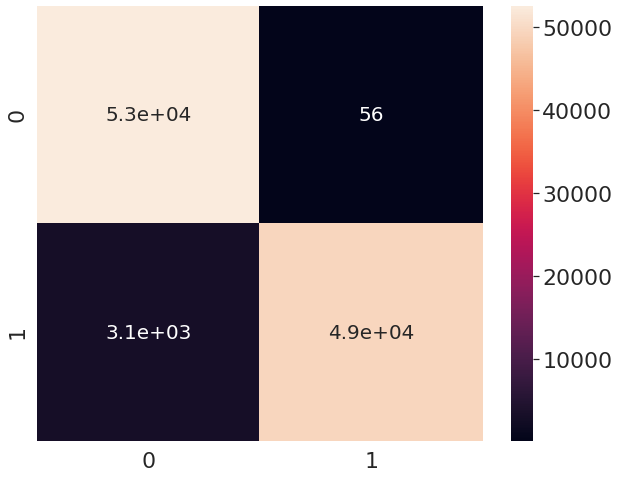

AUC score:  0.9699174465494941


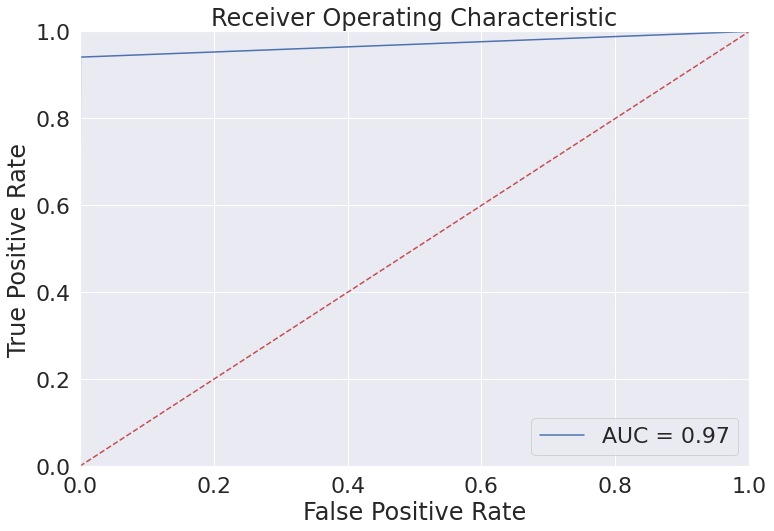

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.06654535 0.33658713 0.18327888 ... 0.85545771 1.21132634 1.15861886]
Visualize quantization error


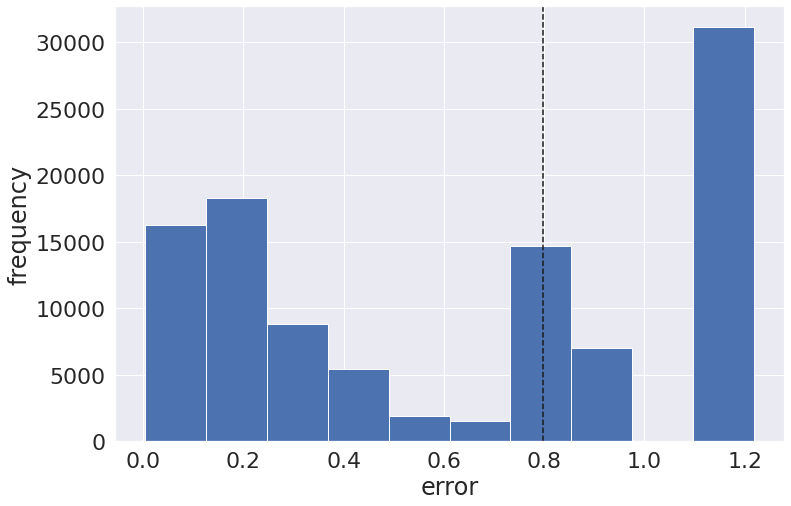

Outliers visualization


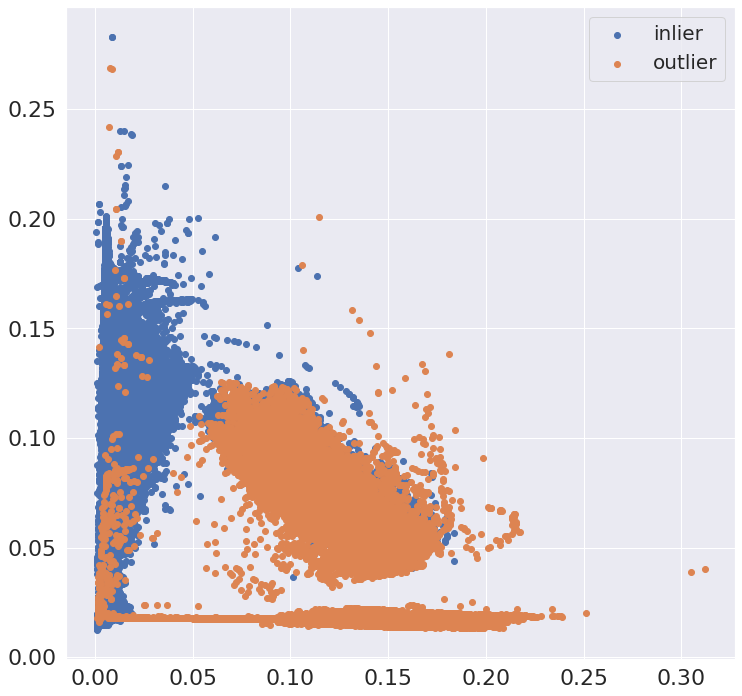

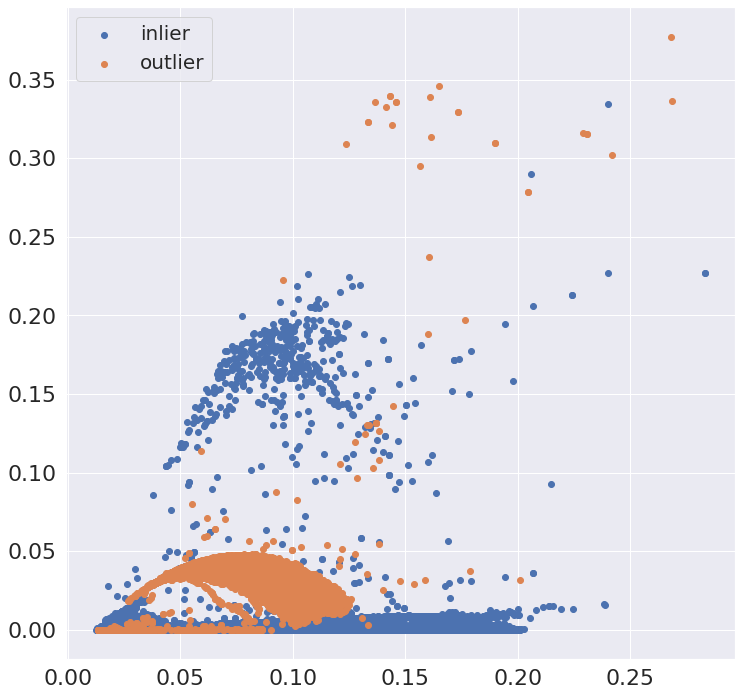

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      1.000     0.999     0.999     52572
           2      0.999     1.000     0.999     52572

    accuracy                          0.999    105144
   macro avg      0.999     0.999     0.999    105144
weighted avg      0.999     0.999     0.999    105144



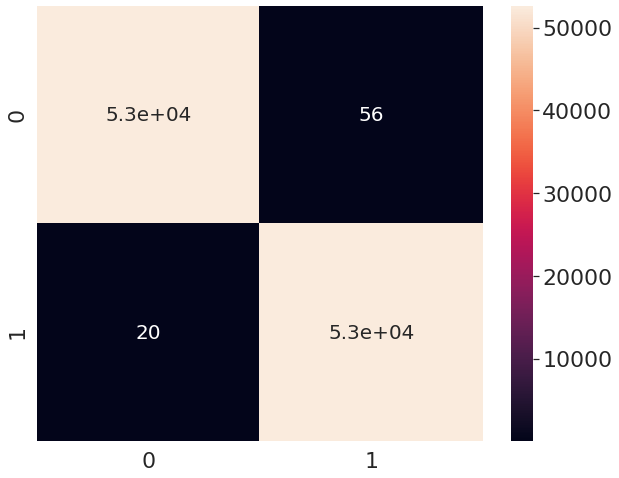

AUC score:  0.9992771817697633


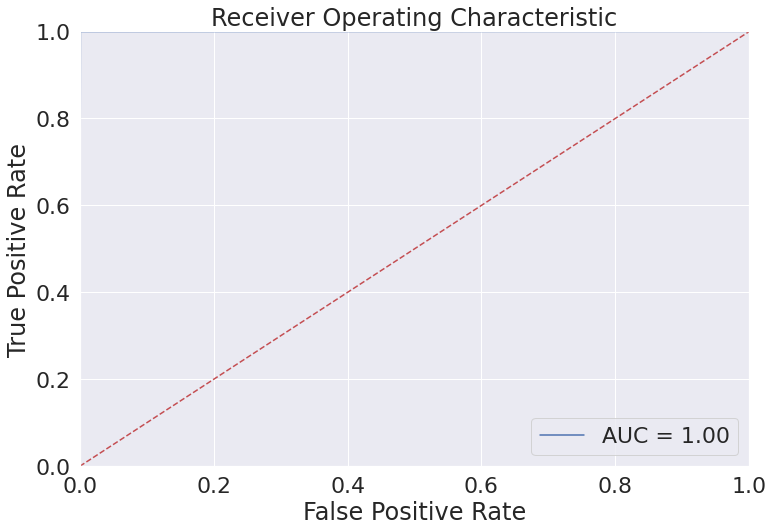

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [83]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 2.94402076e-03  5.64632452e-02  5.98118908e-08 ...  1.62193765e-04
   3.07234927e-05  5.28575936e-02]
 [ 1.14551640e-02  4.54469960e-02  1.94303827e-18 ...  8.89079205e-07
   1.86050915e-13  2.93115886e-07]
 [ 2.95264818e-03  4.54469960e-02  0.00000000e+00 ...  1.49261486e-04
   2.06499849e-05  3.87139901e-02]
 ...
 [ 2.61204988e-02  5.76627301e-01  7.58794031e-01 ...  6.82086336e-01
  -8.52525994e-02 -6.16046270e-01]
 [ 3.88468239e-02  6.93906895e-01  8.75024333e-01 ...  8.81784749e-01
   5.76188557e-01  7.90728259e-01]
 [ 4.14923929e-03  8.82160878e-02  4.05980112e-03 ...  4.30720528e-03
  -1.02115432e-03 -8.65921921e-02]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08168891 0.15138009 0.18807478 ... 1.18747313 1.11305018 1.18747313]
Visualize quantization error


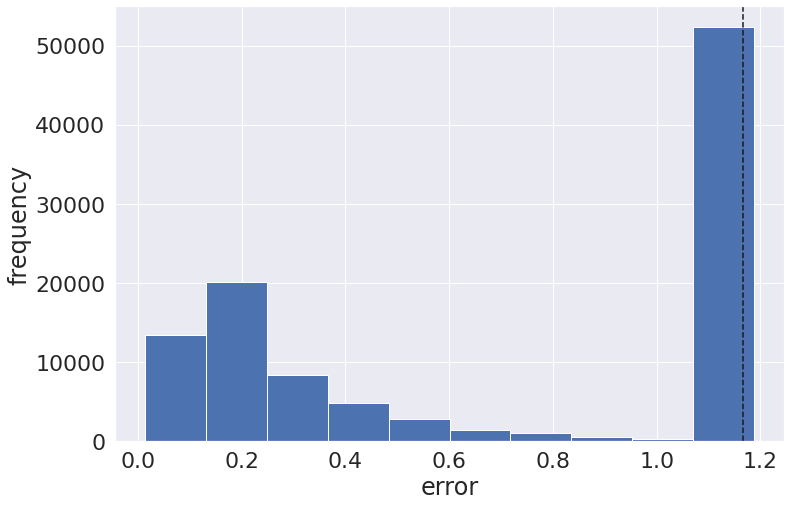

Outliers visualization


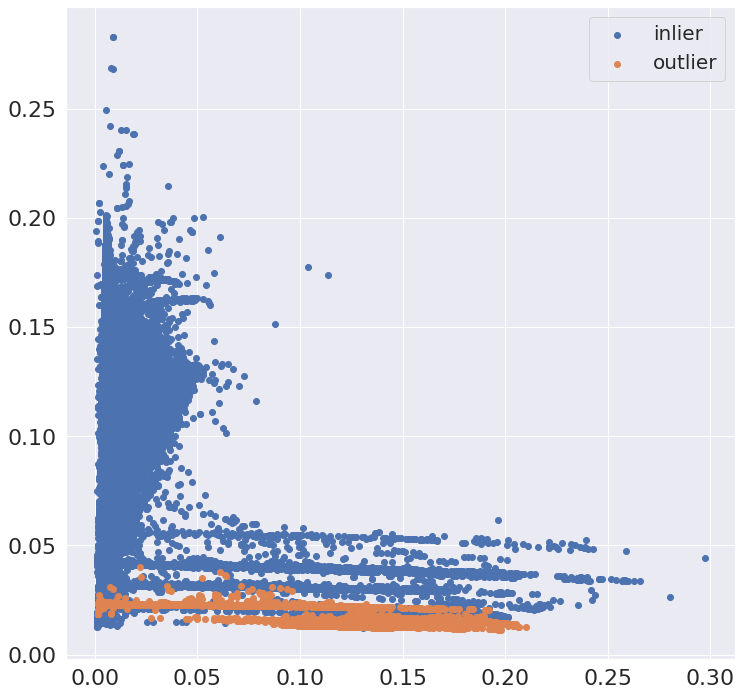

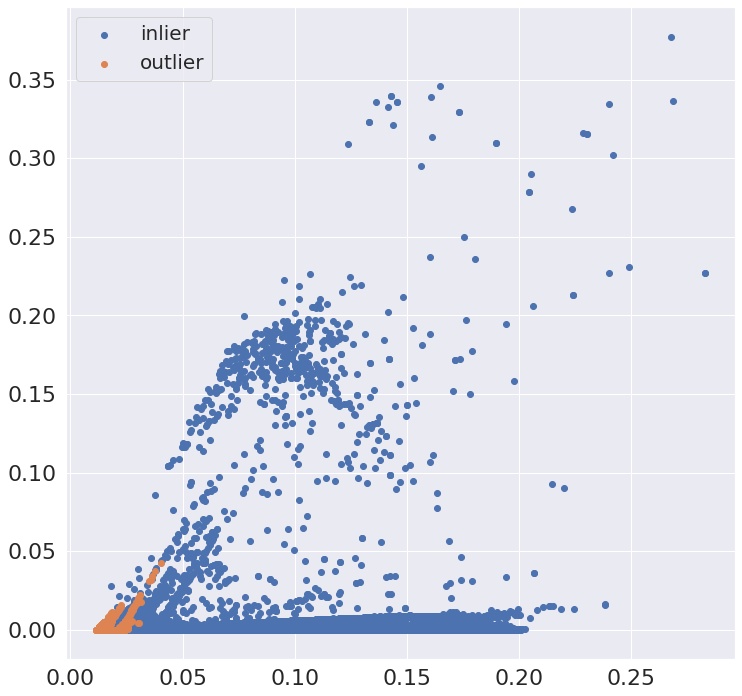

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.993     0.997     0.995     52572
           2      0.997     0.993     0.995     52572

    accuracy                          0.995    105144
   macro avg      0.995     0.995     0.995    105144
weighted avg      0.995     0.995     0.995    105144



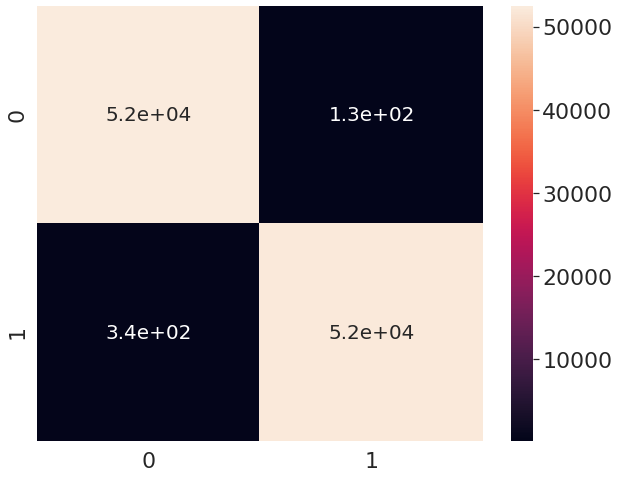

AUC score:  0.9954443429962718


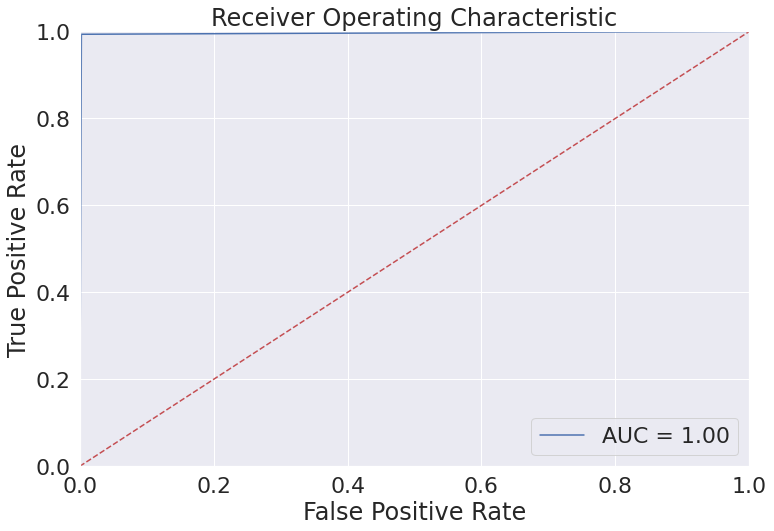

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [84]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (105144, 115) (105144,)
----------------------Test is starting----------------------
Scale data
Shape:  (105144, 115) (105144,)
Shape:  (105144, 115) (105144,)
Normalize data
Shape:  (105144, 115) (105144,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08168891 0.15138009 0.18807478 ... 0.88088435 1.18546395 1.11975975]
Visualize quantization error


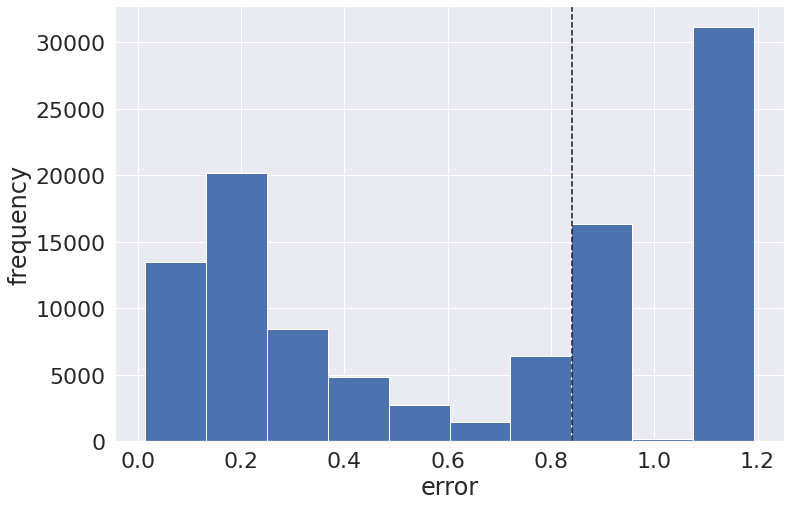

Outliers visualization


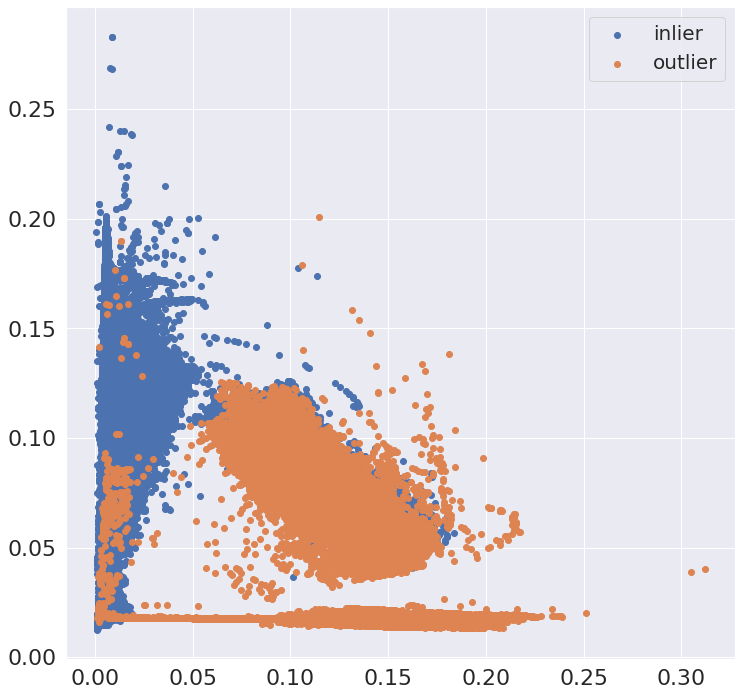

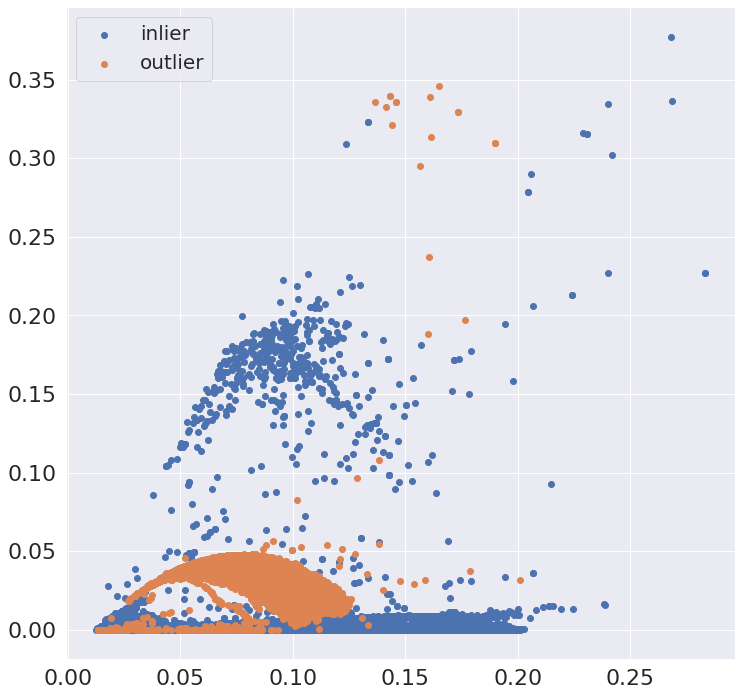

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     52572
           2      0.997     0.998     0.998     52572

    accuracy                          0.998    105144
   macro avg      0.998     0.998     0.998    105144
weighted avg      0.998     0.998     0.998    105144



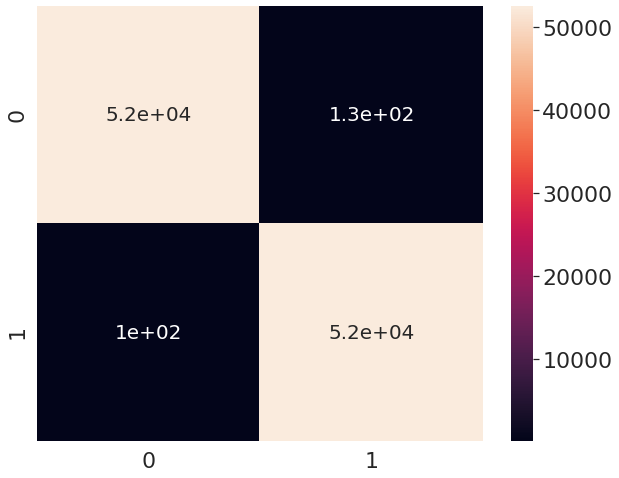

AUC score:  0.9977364376474169


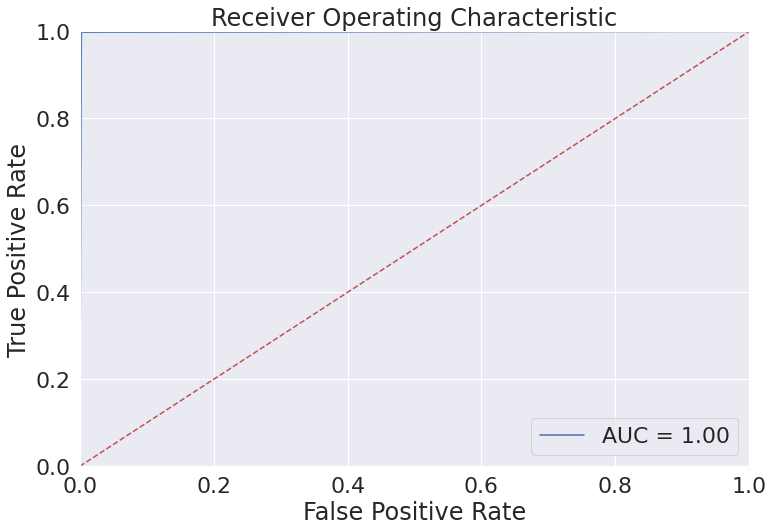

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

